In [1]:
import pandas as pd # Importamos las librerías que vamos a necesitar o podemos necesitar
pd.set_option('display.max_columns', None)  # me muestre todas las columnas
import numpy as np
import warnings
warnings.filterwarnings('ignore')   # Para quitar los warnings
import matplotlib.pyplot as plt
import pylab as plt # para "pintar"
import seaborn as sns

In [2]:
from scipy.stats import f_oneway
from scipy.stats import kruskal
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency

In [3]:
from scipy.stats import shapiro
from scipy.stats import levene

In [4]:
from sklearn.preprocessing import StandardScaler

In [91]:
import statsmodels.api as sm
import scipy.stats as stats

In [6]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [7]:
# from scipy.stats import f_two_way --> No chuta, ya no está disponible.

In [8]:
pokenova = pd.read_csv('../data/pokefinal.csv', encoding = 'ISO-8859-1')

In [9]:
pokenova.tail() # Al cargar el archivo, nos crea una columna "Unnamed: 0" que dropearemos a continuación, y la columna
# number pierde el formado (la dejaremos así, porque no nos afecta).

,Unnamed: 0,number,name,type1,type2,type_combo,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,phy_sweeper,sp_sweeper,wall,phy_tank,sp_tank,compet_rol,category,height,weight,color,gender,hatch,steps,capt_rate,base_happ,base_exp,growth_rate,exp_lvl100,egg_gr1,egg_gr2
1005,1005,1006,Iron Valiant,5,6,Fairy-Fighting,590,74,130,90,120,60,116,9,246,236,224,220,180,phy_sweeper,normal,14,350,white,genderless,50,12800,10,0,295,slow,1250000,No-Eggs,No eggs
1006,1006,1007,Koraidon,6,3,Fighting-Dragon,670,100,135,115,85,100,135,9,270,220,315,250,185,wall,legendary,25,3030,red,genderless,50,12800,3,0,335,slow,1250000,No-Eggs,No eggs
1007,1007,1008,Miraidon,4,3,Electric-Dragon,670,100,85,100,135,115,135,9,220,270,315,185,250,wall,legendary,35,2400,blue,genderless,50,12800,3,0,335,slow,1250000,No-Eggs,No eggs
1008,1008,1009,Walking Wake,18,3,Water-Dragon,590,99,83,91,125,83,109,9,192,234,273,174,208,wall,normal,35,2800,blue,genderless,50,12800,5,0,295,slow,1250000,No-Eggs,No eggs
1009,1009,1010,Iron Leaves,10,15,Grass-Psychic,590,90,130,88,70,108,104,9,234,174,286,218,178,wall,normal,15,1250,green,genderless,50,12800,5,0,295,slow,1250000,No-Eggs,No eggs


In [10]:
# Dropeamos "Unnamed: 0"
pokenova = pokenova.drop(["Unnamed: 0"], axis=1)

pokenova.head() # Arreglado.

,number,name,type1,type2,type_combo,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,phy_sweeper,sp_sweeper,wall,phy_tank,sp_tank,compet_rol,category,height,weight,color,gender,hatch,steps,capt_rate,base_happ,base_exp,growth_rate,exp_lvl100,egg_gr1,egg_gr2
0,1,Bulbasaur,10,14,Grass-Poison,318,45,49,49,65,65,45,1,94,110,159,98,130,wall,starter,7,69,green,both,20,5120,45,50,64,medium-slow,1059860,Monster,Grass
1,2,Ivysaur,10,14,Grass-Poison,405,60,62,63,80,80,60,1,122,140,203,125,160,wall,starter,10,130,green,both,20,5120,45,50,142,medium-slow,1059860,Monster,Grass
2,3,Venusaur,10,14,Grass-Poison,525,80,82,83,100,100,80,1,162,180,263,165,200,wall,starter,20,1000,green,both,20,5120,45,50,263,medium-slow,1059860,Monster,Grass
3,4,Charmander,7,19,Fire,309,39,52,43,60,50,65,1,117,125,132,95,110,wall,starter,6,85,red,both,20,5120,45,50,62,medium-slow,1059860,Monster,Dragon
4,5,Charmeleon,7,19,Fire,405,58,64,58,80,65,80,1,144,160,181,122,145,wall,starter,11,190,red,both,20,5120,45,50,142,medium-slow,1059860,Monster,Dragon


In [11]:
pokenova.shape # Tenemos 1010 registros (Pokémon) y 33 columnas.

(1010, 33)

In [12]:
# Vamos a comenzar con el estudio de ANOVAS; esto es, vamos a testear tres o más muestras. Nuestras muestras van a venir
# determinadas por las distintas generaciones Pokémon.

# Agrupamos los datos por generación:
gr_by_gen = pokenova.groupby('generation')

In [13]:
# Extraemos los datos de velocidad de cada grupo y los pasarmos como argumentos a f_oneway()
f_value, p_value = f_oneway(gr_by_gen.get_group(1)["speed"],
                            gr_by_gen.get_group(2)["speed"],
                            gr_by_gen.get_group(3)["speed"],
                            gr_by_gen.get_group(4)["speed"],
                            gr_by_gen.get_group(5)["speed"],
                            gr_by_gen.get_group(6)["speed"],
                            gr_by_gen.get_group(7)["speed"],
                            gr_by_gen.get_group(8)["speed"],
                            gr_by_gen.get_group(9)["speed"])

 # Cuando se agrupan los datos por generación, la función f_oneway() calcula la media de los datos para cada grupo y 
# utiliza esas medias para realizar la ANOVA.

In [14]:
f_value, p_value

(2.361203542491456, 0.01614182944448283)

In [15]:
# Imprimimos el resultado
if p_value < 0.05:
    print("Hay diferencias significativas en la velocidad entre al menos dos generaciones.")
else:
    print("No hay diferencias significativas en la velocidad entre las generaciones.")

Hay diferencias significativas en la velocidad entre al menos dos generaciones.


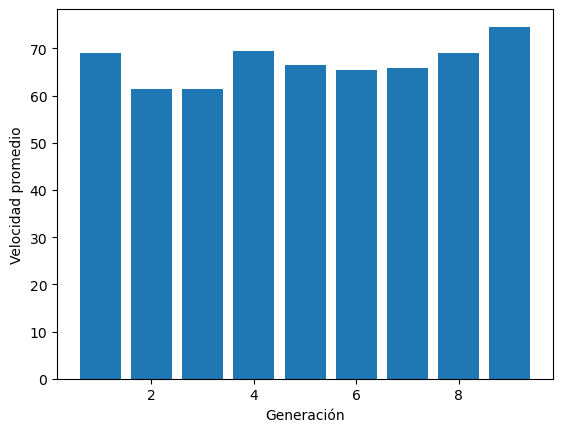

In [16]:
# calcular la velocidad promedio de cada generación
mean_speed = pokenova.groupby("generation")["speed"].mean()

# graficar la velocidad promedio de cada generación
plt.bar(mean_speed.index, mean_speed.values)
plt.xlabel("Generación")
plt.ylabel("Velocidad promedio")
plt.show()

In [17]:
# Vamos a ver qué sucede con Kruskal-Wallis

# Extraemos los datos de velocidad de cada generación:
gen1_speed = pokenova[pokenova["generation"] == 1]["speed"]
gen2_speed = pokenova[pokenova["generation"] == 2]["speed"]
gen3_speed = pokenova[pokenova["generation"] == 3]["speed"]
gen4_speed = pokenova[pokenova["generation"] == 4]["speed"]
gen5_speed = pokenova[pokenova["generation"] == 5]["speed"]
gen6_speed = pokenova[pokenova["generation"] == 6]["speed"]
gen7_speed = pokenova[pokenova["generation"] == 7]["speed"]
gen8_speed = pokenova[pokenova["generation"] == 8]["speed"]
gen9_speed = pokenova[pokenova["generation"] == 9]["speed"]

# Realizamos la prueba de Kruskal-Wallis:
h_value, p_value = kruskal(gen1_speed, gen2_speed, gen3_speed, gen4_speed, gen5_speed, gen6_speed, gen7_speed, gen8_speed,
                          gen9_speed)

# Imprimimos el resultado
if p_value < 0.05:
    print("Hay diferencias significativas en la velocidad entre al menos dos generaciones.")
else:
    print("No hay diferencias significativas en la velocidad entre las generaciones.")

Hay diferencias significativas en la velocidad entre al menos dos generaciones.


¿Cómo saber si usar ANOVA o Kruskal-Wallis? --> Veamos los supuestos para hacer ANOVA:

- NORMALIDAD.
- HOMOGENEIDAD DE VARIANZAS.
- INDEPENDENCIA.

Vamos a ver cada supuesto para las nueve muestras que tenemos (generaciones).

In [18]:
# Normalidad:

# Realizamos el test de Shapiro-Wilk para cada muestra:
shapiro_gen1 = shapiro(gen1_speed)
shapiro_gen2 = shapiro(gen2_speed)
shapiro_gen3 = shapiro(gen3_speed)
shapiro_gen4 = shapiro(gen4_speed)
shapiro_gen5 = shapiro(gen5_speed)
shapiro_gen6 = shapiro(gen6_speed)
shapiro_gen7 = shapiro(gen7_speed)
shapiro_gen8 = shapiro(gen8_speed)
shapiro_gen9 = shapiro(gen9_speed)

# Imprimimos los resultados:
print("Test de Shapiro-Wilk para cada muestra:")
print(f"Generación 1: statistic={shapiro_gen1.statistic:.3f}, p-value={shapiro_gen1.pvalue:.3f}")
print(f"Generación 2: statistic={shapiro_gen2.statistic:.3f}, p-value={shapiro_gen2.pvalue:.3f}")
print(f"Generación 3: statistic={shapiro_gen3.statistic:.3f}, p-value={shapiro_gen3.pvalue:.3f}")
print(f"Generación 4: statistic={shapiro_gen4.statistic:.3f}, p-value={shapiro_gen4.pvalue:.3f}")
print(f"Generación 5: statistic={shapiro_gen5.statistic:.3f}, p-value={shapiro_gen5.pvalue:.3f}")
print(f"Generación 6: statistic={shapiro_gen6.statistic:.3f}, p-value={shapiro_gen6.pvalue:.3f}")
print(f"Generación 7: statistic={shapiro_gen7.statistic:.3f}, p-value={shapiro_gen7.pvalue:.3f}")
print(f"Generación 8: statistic={shapiro_gen8.statistic:.3f}, p-value={shapiro_gen8.pvalue:.3f}")
print(f"Generación 9: statistic={shapiro_gen9.statistic:.3f}, p-value={shapiro_gen9.pvalue:.3f}")

# Si el p-valor es menor que el nivel de significatividad (por ejemplo, 0.05), entonces se puede rechazar la hipótesis nula
# de que los datos siguen una distribución normal.

Test de Shapiro-Wilk para cada muestra:
Generación 1: statistic=0.982, p-value=0.049
Generación 2: statistic=0.982, p-value=0.183
Generación 3: statistic=0.965, p-value=0.002
Generación 4: statistic=0.976, p-value=0.052
Generación 5: statistic=0.973, p-value=0.004
Generación 6: statistic=0.957, p-value=0.016
Generación 7: statistic=0.964, p-value=0.014
Generación 8: statistic=0.952, p-value=0.001
Generación 9: statistic=0.982, p-value=0.162


In [19]:
# No todas las muestras siguen una distribución normal; vamos a ver qué pasa con las otras dos pruebas y tomamos decisiones

# Realizamos el test de Levene para verificar la homogeneidad de varianzas:

levene_test = levene(gen1_speed, gen2_speed, gen3_speed, gen4_speed, gen5_speed, gen6_speed, gen7_speed, gen8_speed,
                    gen9_speed)
print("Test de Levene para verificar la homogeneidad de varianzas:")
print(f"Statistic={levene_test.statistic:.3f}, p-value={levene_test.pvalue:.3f}")

# Si el p-valor es menor que el nivel de significación, se puede rechazar la hipótesis nula de que las varianzas son
# iguales.

Test de Levene para verificar la homogeneidad de varianzas:
Statistic=1.346, p-value=0.217


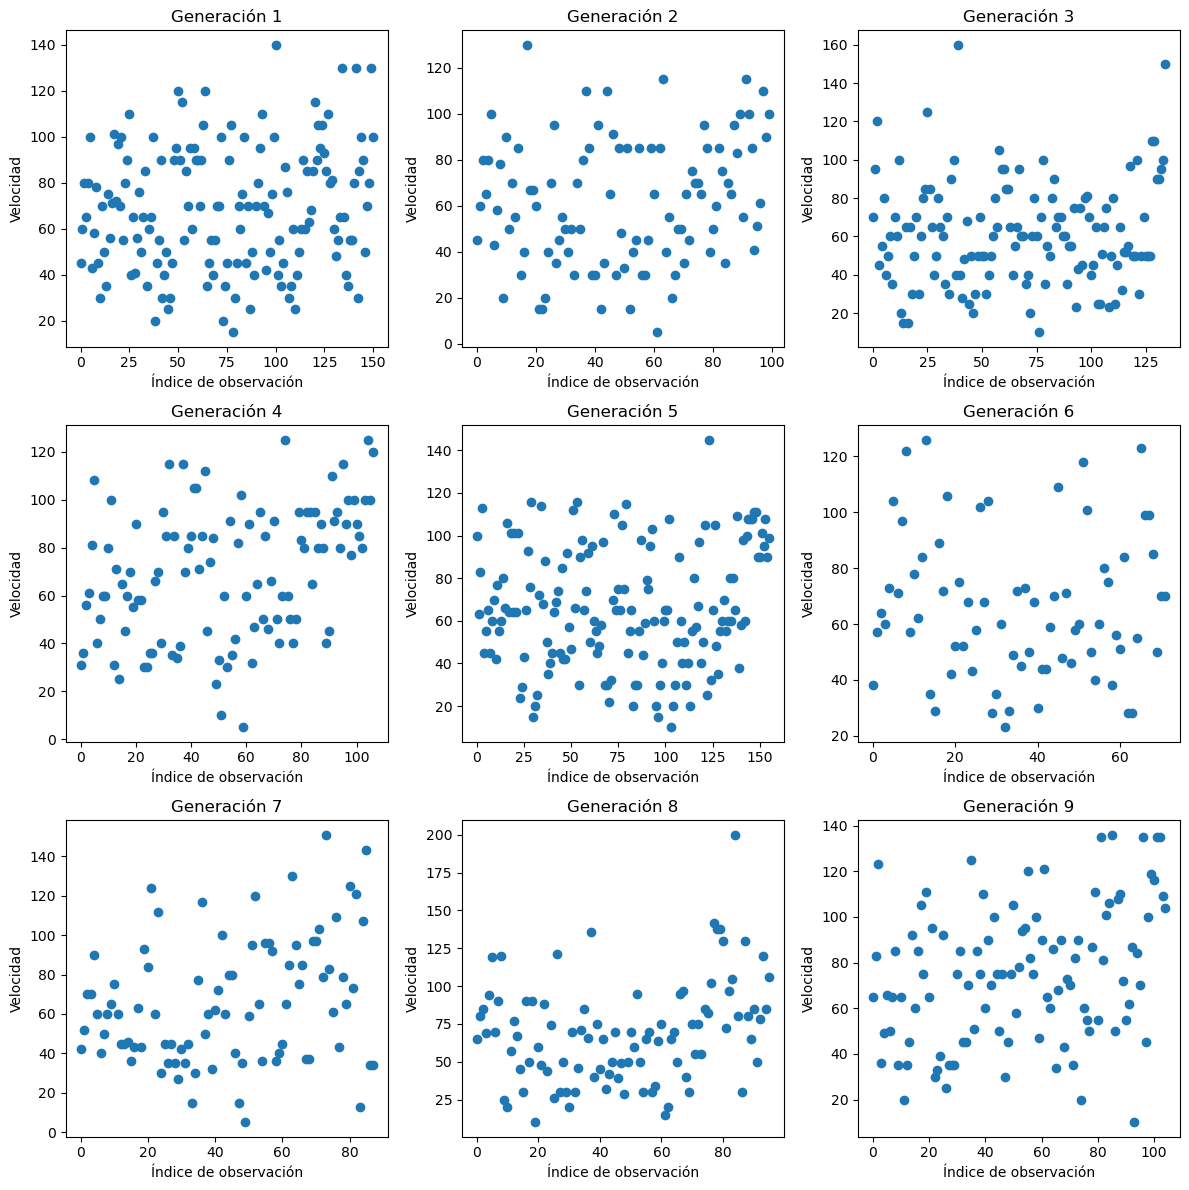

In [20]:
# No podemos rechazar Ho, por lo que podemos asumir que las varianzas son homogéneas. Veamos el tercer paso:

# Creamos un gráfico de dispersión para verificar la independencia de las muestras:
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
axs = axs.ravel()
for i, gen_speed in enumerate([gen1_speed, gen2_speed, gen3_speed, gen4_speed, gen5_speed, gen6_speed, gen7_speed,
                              gen8_speed, gen9_speed]):
    axs[i].scatter(range(len(gen_speed)), gen_speed)
    axs[i].set_title(f"Generación {i+1}")
    axs[i].set_xlabel("Índice de observación")
    axs[i].set_ylabel("Velocidad")
fig.tight_layout()
plt.show()

**CHAT GPT says**:

"En general, para verificar la independencia de las observaciones en cada grupo, se espera ver una nube de puntos dispersos sin patrones o tendencias claras en el gráfico de dispersión. Si los puntos están distribuidos aleatoriamente, sin seguir ninguna tendencia en particular, se puede suponer que las observaciones son independientes."

Esto es lo que observo, por lo que podemos decir que las muestras son independientes.

Tomamos, pues, la decisión de normalizar los datos para emplear ANOVA en lugar de Kruskal-Wallis, ya que si se cumplen los supuestos, la prueba de ANOVA es más potente y precisa que la prueba de Kruskal-Wallis y se pueden realizar pruebas post hoc para identificar las diferencias significativas entre parejas de muestras (en caso de que el mensaje que hayamos recibido al pasar la f_oneway nos indique precisamente eso, que existen diferencias significativas). Haremos esto, aunque sabemos que la normalización puede no ser adecuada o incluso contraproducente en algunas ocasiones.

In [21]:
# Vamos a normalizar:

gen1_speed_norm = StandardScaler().fit_transform(gen1_speed.values.reshape(-1, 1))
gen2_speed_norm = StandardScaler().fit_transform(gen2_speed.values.reshape(-1, 1))
gen3_speed_norm = StandardScaler().fit_transform(gen3_speed.values.reshape(-1, 1))
gen4_speed_norm = StandardScaler().fit_transform(gen4_speed.values.reshape(-1, 1))
gen5_speed_norm = StandardScaler().fit_transform(gen5_speed.values.reshape(-1, 1))
gen6_speed_norm = StandardScaler().fit_transform(gen6_speed.values.reshape(-1, 1))
gen7_speed_norm = StandardScaler().fit_transform(gen7_speed.values.reshape(-1, 1))
gen8_speed_norm = StandardScaler().fit_transform(gen8_speed.values.reshape(-1, 1))
gen9_speed_norm = StandardScaler().fit_transform(gen9_speed.values.reshape(-1, 1))

In [22]:
# Una vez normalizados los datos de velocidad, pasamos

f_value, p_value = f_oneway(gen1_speed_norm, gen2_speed_norm, gen3_speed_norm, gen4_speed_norm, gen5_speed_norm, gen6_speed_norm, gen7_speed_norm, gen8_speed_norm, gen9_speed_norm)

if p_value < 0.05:
    print("Hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional")
else:
    print("No hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional")

# Con los datos normalizados, el asunto cambia.

No hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional


Vamos a ir haciendo ANOVA's por diferentes bloques para ver si hay diferencias significativas o no entre generaciones; como hemos empezando probando con velocidad, vamos a seguir ahora con el resto de estadísticas: HP, ATTACK, DEFENSE, SP_ATTACK y SP_DEFENSE. A este bloque lo llamaremos **BLOQUE STATS**. No vamos a normalizar de primeras, sino que vamos a ver si se cumplen primero los supuestos y, en función de los que se cumplan, hacemos la prueba de f_oneway o la de kruskal.

In [23]:
# Seguimos con hp:

# Normalidad:

# Extraemos los datos de hp de cada generación:
gen1_hp = pokenova[pokenova["generation"] == 1]["hp"]
gen2_hp = pokenova[pokenova["generation"] == 2]["hp"]
gen3_hp = pokenova[pokenova["generation"] == 3]["hp"]
gen4_hp = pokenova[pokenova["generation"] == 4]["hp"]
gen5_hp = pokenova[pokenova["generation"] == 5]["hp"]
gen6_hp = pokenova[pokenova["generation"] == 6]["hp"]
gen7_hp = pokenova[pokenova["generation"] == 7]["hp"]
gen8_hp = pokenova[pokenova["generation"] == 8]["hp"]
gen9_hp = pokenova[pokenova["generation"] == 9]["hp"]

# Realizamos el test de Shapiro-Wilk para cada muestra:
shapiro_gen1 = shapiro(gen1_hp)
shapiro_gen2 = shapiro(gen2_hp)
shapiro_gen3 = shapiro(gen3_hp)
shapiro_gen4 = shapiro(gen4_hp)
shapiro_gen5 = shapiro(gen5_hp)
shapiro_gen6 = shapiro(gen6_hp)
shapiro_gen7 = shapiro(gen7_hp)
shapiro_gen8 = shapiro(gen8_hp)
shapiro_gen9 = shapiro(gen9_hp)

# Imprimimos los resultados:
print("Test de Shapiro-Wilk para cada muestra:")
print(f"Generación 1: statistic={shapiro_gen1.statistic:.3f}, p-value={shapiro_gen1.pvalue:.3f}")
print(f"Generación 2: statistic={shapiro_gen2.statistic:.3f}, p-value={shapiro_gen2.pvalue:.3f}")
print(f"Generación 3: statistic={shapiro_gen3.statistic:.3f}, p-value={shapiro_gen3.pvalue:.3f}")
print(f"Generación 4: statistic={shapiro_gen4.statistic:.3f}, p-value={shapiro_gen4.pvalue:.3f}")
print(f"Generación 5: statistic={shapiro_gen5.statistic:.3f}, p-value={shapiro_gen5.pvalue:.3f}")
print(f"Generación 6: statistic={shapiro_gen6.statistic:.3f}, p-value={shapiro_gen6.pvalue:.3f}")
print(f"Generación 7: statistic={shapiro_gen7.statistic:.3f}, p-value={shapiro_gen7.pvalue:.3f}")
print(f"Generación 8: statistic={shapiro_gen8.statistic:.3f}, p-value={shapiro_gen8.pvalue:.3f}")
print(f"Generación 9: statistic={shapiro_gen9.statistic:.3f}, p-value={shapiro_gen9.pvalue:.3f}")

# Si el p-valor es menor que el nivel de significatividad (por ejemplo, 0.05), entonces se puede rechazar la hipótesis nula
# de que los datos siguen una distribución normal.

Test de Shapiro-Wilk para cada muestra:
Generación 1: statistic=0.850, p-value=0.000
Generación 2: statistic=0.809, p-value=0.000
Generación 3: statistic=0.934, p-value=0.000
Generación 4: statistic=0.966, p-value=0.008
Generación 5: statistic=0.949, p-value=0.000
Generación 6: statistic=0.810, p-value=0.000
Generación 7: statistic=0.843, p-value=0.000
Generación 8: statistic=0.929, p-value=0.000
Generación 9: statistic=0.965, p-value=0.007


In [24]:
# En caso de que el supuesto 2 y 3 se cumplan, nos tocará de nuevo normalizar. Vamos con Levene ahora:

levene_test = levene(gen1_hp, gen2_hp, gen3_hp, gen4_hp, gen5_hp, gen6_hp, gen7_hp, gen8_hp,
                    gen9_hp)
print("Test de Levene para verificar la homogeneidad de varianzas:")
print(f"Statistic={levene_test.statistic:.3f}, p-value={levene_test.pvalue:.3f}")

# Si el p-valor es menor que el nivel de significación, se puede rechazar la hipótesis nula de que las varianzas son
# iguales.

Test de Levene para verificar la homogeneidad de varianzas:
Statistic=0.926, p-value=0.494


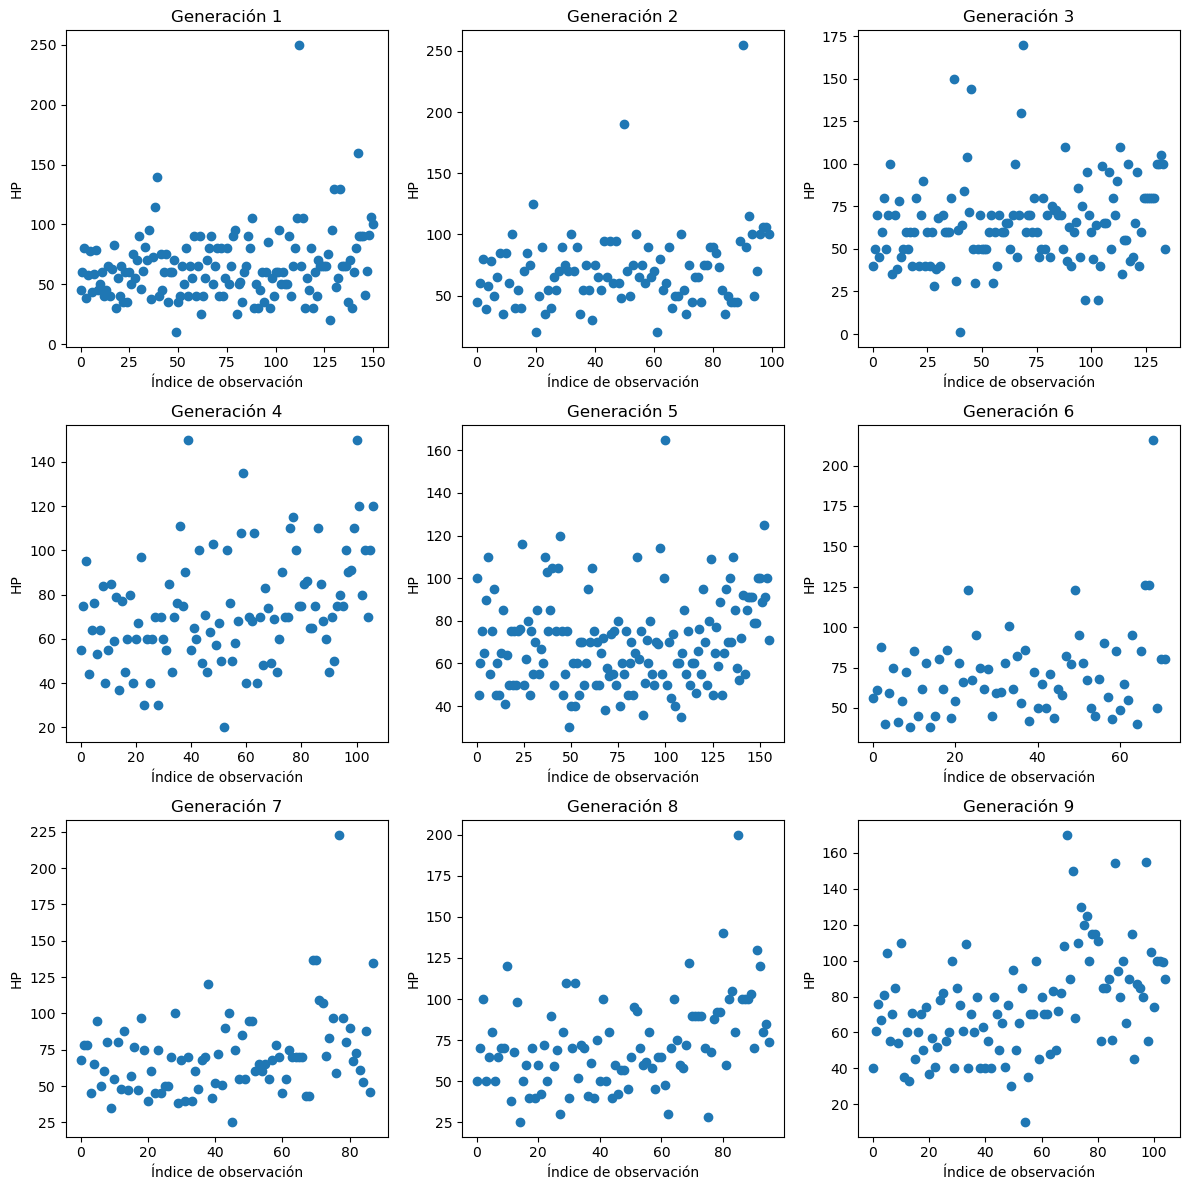

In [25]:
# No podemos rechazar Ho, por lo que podemos asumir que las varianzas son homogéneas. Veamos el tercer paso:

# Creamos un gráfico de dispersión para verificar la independencia de las muestras:
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
axs = axs.ravel()
for i, gen_hp in enumerate([gen1_hp, gen2_hp, gen3_hp, gen4_hp, gen5_hp, gen6_hp, gen7_hp,
                              gen8_hp, gen9_hp]):
    axs[i].scatter(range(len(gen_hp)), gen_hp)
    axs[i].set_title(f"Generación {i+1}")
    axs[i].set_xlabel("Índice de observación")
    axs[i].set_ylabel("HP")
fig.tight_layout()
plt.show()

In [26]:
# No vemos patrones en esta variable tampoco, vamos a normalizar y a pasar la f_oneway posteriormente:

gen1_hp_norm = StandardScaler().fit_transform(gen1_hp.values.reshape(-1, 1))
gen2_hp_norm = StandardScaler().fit_transform(gen2_hp.values.reshape(-1, 1))
gen3_hp_norm = StandardScaler().fit_transform(gen3_hp.values.reshape(-1, 1))
gen4_hp_norm = StandardScaler().fit_transform(gen4_hp.values.reshape(-1, 1))
gen5_hp_norm = StandardScaler().fit_transform(gen5_hp.values.reshape(-1, 1))
gen6_hp_norm = StandardScaler().fit_transform(gen6_hp.values.reshape(-1, 1))
gen7_hp_norm = StandardScaler().fit_transform(gen7_hp.values.reshape(-1, 1))
gen8_hp_norm = StandardScaler().fit_transform(gen8_hp.values.reshape(-1, 1))
gen9_hp_norm = StandardScaler().fit_transform(gen9_hp.values.reshape(-1, 1))

In [27]:
f_value, p_value = f_oneway(gen1_hp_norm, gen2_hp_norm, gen3_hp_norm, gen4_hp_norm, gen5_hp_norm, gen6_hp_norm, gen7_hp_norm, gen8_hp_norm, gen9_hp_norm)

if p_value < 0.05:
    print("Hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional")
else:
    print("No hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional")


No hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional


In [28]:
# Seguimos con attack:

# Normalidad:

# Extraemos los datos de attack de cada generación:
gen1_attack = pokenova[pokenova["generation"] == 1]["attack"]
gen2_attack = pokenova[pokenova["generation"] == 2]["attack"]
gen3_attack = pokenova[pokenova["generation"] == 3]["attack"]
gen4_attack = pokenova[pokenova["generation"] == 4]["attack"]
gen5_attack = pokenova[pokenova["generation"] == 5]["attack"]
gen6_attack = pokenova[pokenova["generation"] == 6]["attack"]
gen7_attack = pokenova[pokenova["generation"] == 7]["attack"]
gen8_attack = pokenova[pokenova["generation"] == 8]["attack"]
gen9_attack = pokenova[pokenova["generation"] == 9]["attack"]

# Realizamos el test de Shapiro-Wilk para cada muestra:
shapiro_gen1 = shapiro(gen1_attack)
shapiro_gen2 = shapiro(gen2_attack)
shapiro_gen3 = shapiro(gen3_attack)
shapiro_gen4 = shapiro(gen4_attack)
shapiro_gen5 = shapiro(gen5_attack)
shapiro_gen6 = shapiro(gen6_attack)
shapiro_gen7 = shapiro(gen7_attack)
shapiro_gen8 = shapiro(gen8_attack)
shapiro_gen9 = shapiro(gen9_attack)

# Imprimimos los resultados:
print("Test de Shapiro-Wilk para cada muestra:")
print(f"Generación 1: statistic={shapiro_gen1.statistic:.3f}, p-value={shapiro_gen1.pvalue:.3f}")
print(f"Generación 2: statistic={shapiro_gen2.statistic:.3f}, p-value={shapiro_gen2.pvalue:.3f}")
print(f"Generación 3: statistic={shapiro_gen3.statistic:.3f}, p-value={shapiro_gen3.pvalue:.3f}")
print(f"Generación 4: statistic={shapiro_gen4.statistic:.3f}, p-value={shapiro_gen4.pvalue:.3f}")
print(f"Generación 5: statistic={shapiro_gen5.statistic:.3f}, p-value={shapiro_gen5.pvalue:.3f}")
print(f"Generación 6: statistic={shapiro_gen6.statistic:.3f}, p-value={shapiro_gen6.pvalue:.3f}")
print(f"Generación 7: statistic={shapiro_gen7.statistic:.3f}, p-value={shapiro_gen7.pvalue:.3f}")
print(f"Generación 8: statistic={shapiro_gen8.statistic:.3f}, p-value={shapiro_gen8.pvalue:.3f}")
print(f"Generación 9: statistic={shapiro_gen9.statistic:.3f}, p-value={shapiro_gen9.pvalue:.3f}")

# Si el p-valor es menor que el nivel de significatividad (por ejemplo, 0.05), entonces se puede rechazar la hipótesis nula
# de que los datos siguen una distribución normal.

Test de Shapiro-Wilk para cada muestra:
Generación 1: statistic=0.989, p-value=0.271
Generación 2: statistic=0.984, p-value=0.260
Generación 3: statistic=0.972, p-value=0.006
Generación 4: statistic=0.992, p-value=0.825
Generación 5: statistic=0.975, p-value=0.007
Generación 6: statistic=0.966, p-value=0.050
Generación 7: statistic=0.972, p-value=0.051
Generación 8: statistic=0.972, p-value=0.041
Generación 9: statistic=0.961, p-value=0.004


In [29]:
# En caso de que el supuesto 2 y 3 se cumplan, nos tocará de nuevo normalizar. Vamos con Levene ahora:

levene_test = levene(gen1_attack, gen2_attack, gen3_attack, gen4_attack, gen5_attack, gen6_attack, gen7_attack, gen8_attack,
                    gen9_attack)
print("Test de Levene para verificar la homogeneidad de varianzas:")
print(f"Statistic={levene_test.statistic:.3f}, p-value={levene_test.pvalue:.3f}")

# Si el p-valor es menor que el nivel de significación, se puede rechazar la hipótesis nula de que las varianzas son
# iguales.

Test de Levene para verificar la homogeneidad de varianzas:
Statistic=1.235, p-value=0.275


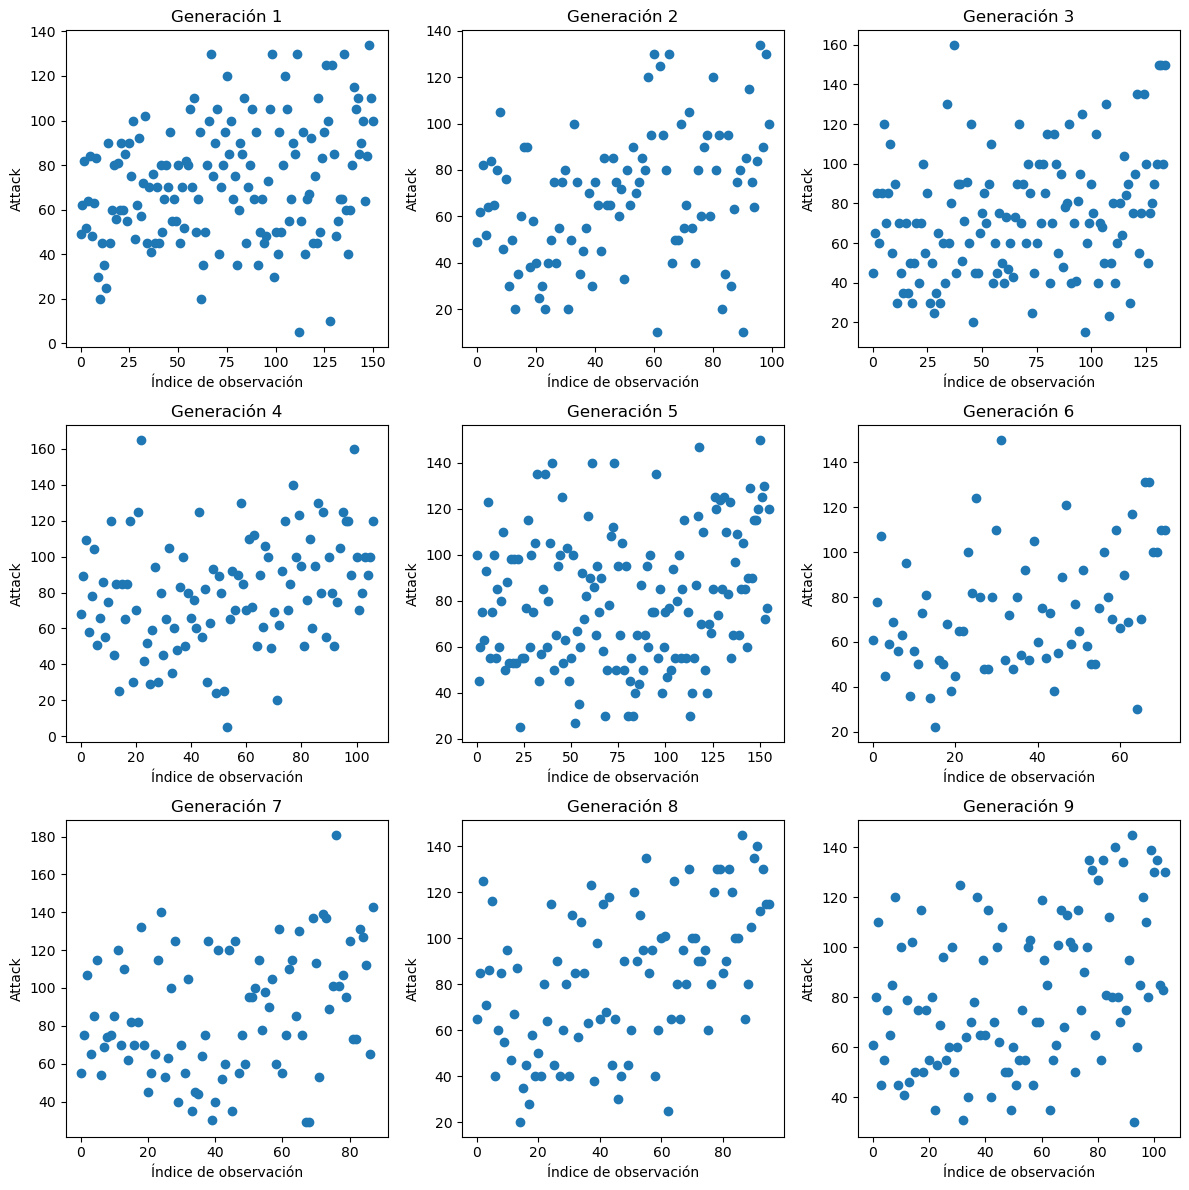

In [30]:
# No podemos rechazar Ho, por lo que podemos asumir que las varianzas son homogéneas. Veamos el tercer paso:

# Creamos un gráfico de dispersión para verificar la independencia de las muestras:
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
axs = axs.ravel()
for i, gen_attack in enumerate([gen1_attack, gen2_attack, gen3_attack, gen4_attack, gen5_attack, gen6_attack, gen7_attack,
                              gen8_attack, gen9_attack]):
    axs[i].scatter(range(len(gen_attack)), gen_attack)
    axs[i].set_title(f"Generación {i+1}")
    axs[i].set_xlabel("Índice de observación")
    axs[i].set_ylabel("Attack")
fig.tight_layout()
plt.show()

In [31]:
# No vemos patrones en esta variable tampoco, vamos a normalizar y a pasar la f_oneway posteriormente:

gen1_attack_norm = StandardScaler().fit_transform(gen1_attack.values.reshape(-1, 1))
gen2_attack_norm = StandardScaler().fit_transform(gen2_attack.values.reshape(-1, 1))
gen3_attack_norm = StandardScaler().fit_transform(gen3_attack.values.reshape(-1, 1))
gen4_attack_norm = StandardScaler().fit_transform(gen4_attack.values.reshape(-1, 1))
gen5_attack_norm = StandardScaler().fit_transform(gen5_attack.values.reshape(-1, 1))
gen6_attack_norm = StandardScaler().fit_transform(gen6_attack.values.reshape(-1, 1))
gen7_attack_norm = StandardScaler().fit_transform(gen7_attack.values.reshape(-1, 1))
gen8_attack_norm = StandardScaler().fit_transform(gen8_attack.values.reshape(-1, 1))
gen9_attack_norm = StandardScaler().fit_transform(gen9_attack.values.reshape(-1, 1))

f_value, p_value = f_oneway(gen1_attack_norm, gen2_attack_norm, gen3_attack_norm, gen4_attack_norm, gen5_attack_norm, gen6_attack_norm, gen7_attack_norm, gen8_attack_norm, gen9_attack_norm)

if p_value < 0.05:
    print("Hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional")
else:
    print("No hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional")


No hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional


In [32]:
# Seguimos con attack:

# Normalidad:

# Extraemos los datos de defense de cada generación:
gen1_defense = pokenova[pokenova["generation"] == 1]["defense"]
gen2_defense = pokenova[pokenova["generation"] == 2]["defense"]
gen3_defense = pokenova[pokenova["generation"] == 3]["defense"]
gen4_defense = pokenova[pokenova["generation"] == 4]["defense"]
gen5_defense = pokenova[pokenova["generation"] == 5]["defense"]
gen6_defense = pokenova[pokenova["generation"] == 6]["defense"]
gen7_defense = pokenova[pokenova["generation"] == 7]["defense"]
gen8_defense = pokenova[pokenova["generation"] == 8]["defense"]
gen9_defense = pokenova[pokenova["generation"] == 9]["defense"]

# Realizamos el test de Shapiro-Wilk para cada muestra:
shapiro_gen1 = shapiro(gen1_defense)
shapiro_gen2 = shapiro(gen2_defense)
shapiro_gen3 = shapiro(gen3_defense)
shapiro_gen4 = shapiro(gen4_defense)
shapiro_gen5 = shapiro(gen5_defense)
shapiro_gen6 = shapiro(gen6_defense)
shapiro_gen7 = shapiro(gen7_defense)
shapiro_gen8 = shapiro(gen8_defense)
shapiro_gen9 = shapiro(gen9_defense)

# Imprimimos los resultados:
print("Test de Shapiro-Wilk para cada muestra:")
print(f"Generación 1: statistic={shapiro_gen1.statistic:.3f}, p-value={shapiro_gen1.pvalue:.3f}")
print(f"Generación 2: statistic={shapiro_gen2.statistic:.3f}, p-value={shapiro_gen2.pvalue:.3f}")
print(f"Generación 3: statistic={shapiro_gen3.statistic:.3f}, p-value={shapiro_gen3.pvalue:.3f}")
print(f"Generación 4: statistic={shapiro_gen4.statistic:.3f}, p-value={shapiro_gen4.pvalue:.3f}")
print(f"Generación 5: statistic={shapiro_gen5.statistic:.3f}, p-value={shapiro_gen5.pvalue:.3f}")
print(f"Generación 6: statistic={shapiro_gen6.statistic:.3f}, p-value={shapiro_gen6.pvalue:.3f}")
print(f"Generación 7: statistic={shapiro_gen7.statistic:.3f}, p-value={shapiro_gen7.pvalue:.3f}")
print(f"Generación 8: statistic={shapiro_gen8.statistic:.3f}, p-value={shapiro_gen8.pvalue:.3f}")
print(f"Generación 9: statistic={shapiro_gen9.statistic:.3f}, p-value={shapiro_gen9.pvalue:.3f}")

# Si el p-valor es menor que el nivel de significatividad (por ejemplo, 0.05), entonces se puede rechazar la hipótesis nula
# de que los datos siguen una distribución normal.

Test de Shapiro-Wilk para cada muestra:
Generación 1: statistic=0.962, p-value=0.000
Generación 2: statistic=0.900, p-value=0.000
Generación 3: statistic=0.908, p-value=0.000
Generación 4: statistic=0.960, p-value=0.003
Generación 5: statistic=0.960, p-value=0.000
Generación 6: statistic=0.886, p-value=0.000
Generación 7: statistic=0.938, p-value=0.000
Generación 8: statistic=0.974, p-value=0.050
Generación 9: statistic=0.983, p-value=0.200


In [33]:
# En caso de que el supuesto 2 y 3 se cumplan, nos tocará de nuevo normalizar. Vamos con Levene ahora:

levene_test = levene(gen1_defense, gen2_defense, gen3_defense, gen4_defense, gen5_defense, gen6_defense, gen7_defense,
                     gen8_defense, gen9_defense)
print("Test de Levene para verificar la homogeneidad de varianzas:")
print(f"Statistic={levene_test.statistic:.3f}, p-value={levene_test.pvalue:.3f}")

# Si el p-valor es menor que el nivel de significación, se puede rechazar la hipótesis nula de que las varianzas son
# iguales.

Test de Levene para verificar la homogeneidad de varianzas:
Statistic=1.730, p-value=0.088


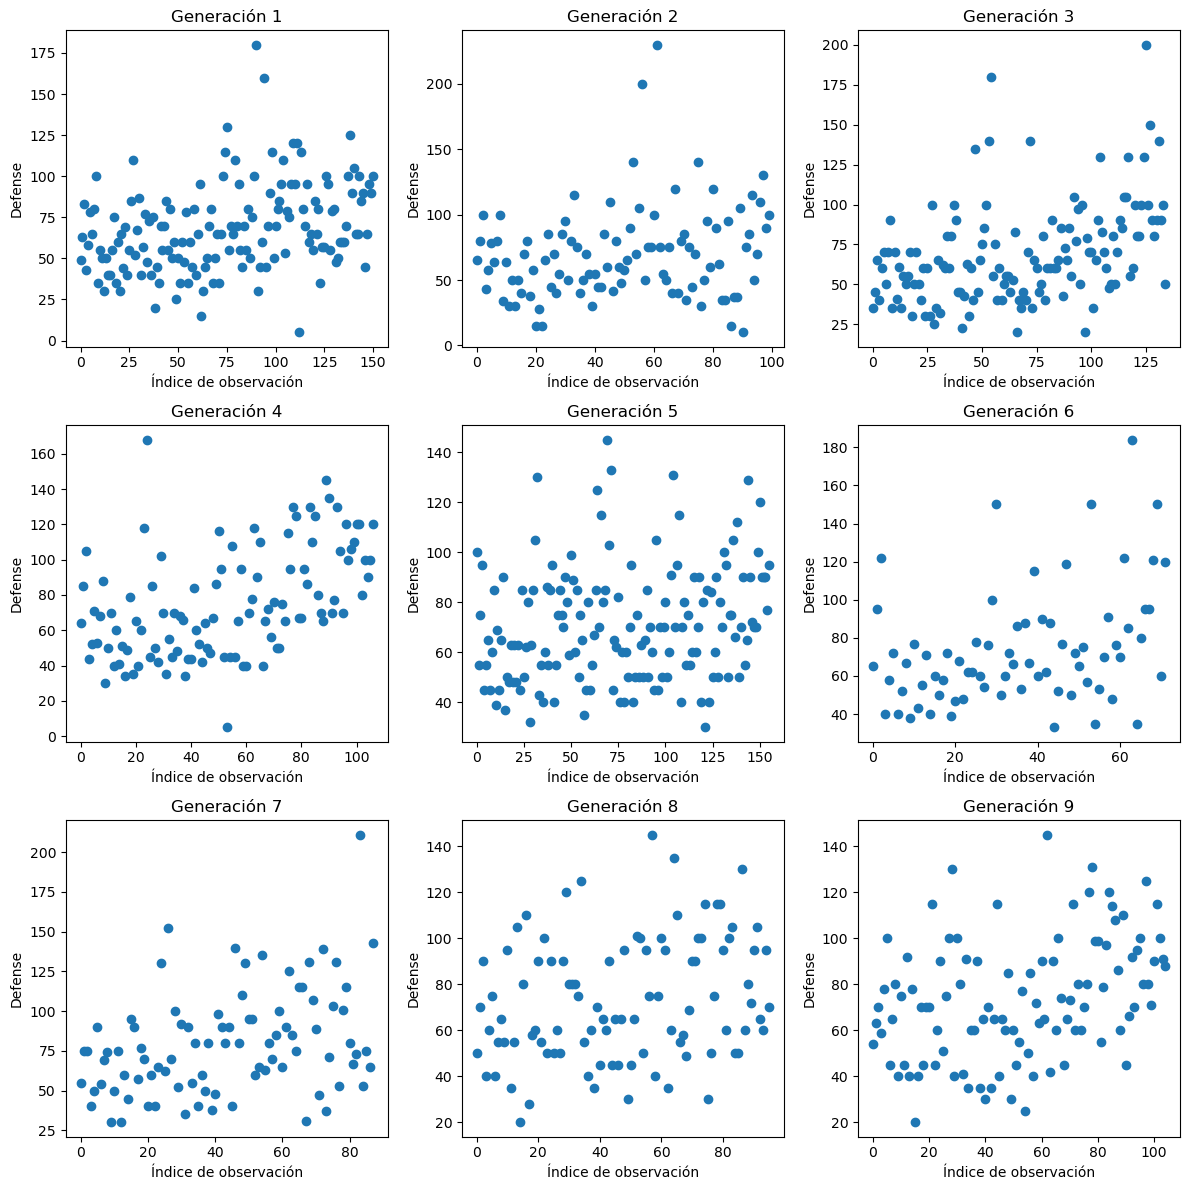

In [34]:
# No podemos rechazar Ho, por lo que podemos asumir que las varianzas son homogéneas. Veamos el tercer paso:

# Creamos un gráfico de dispersión para verificar la independencia de las muestras:
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
axs = axs.ravel()
for i, gen_defense in enumerate([gen1_defense, gen2_defense, gen3_defense, gen4_defense, gen5_defense, gen6_defense, 
                                 gen7_defense, gen8_defense, gen9_defense]):
    axs[i].scatter(range(len(gen_defense)), gen_defense)
    axs[i].set_title(f"Generación {i+1}")
    axs[i].set_xlabel("Índice de observación")
    axs[i].set_ylabel("Defense")
fig.tight_layout()
plt.show()

In [35]:
# No vemos patrones en esta variable tampoco, vamos a normalizar y a pasar la f_oneway posteriormente:

gen1_defense_norm = StandardScaler().fit_transform(gen1_defense.values.reshape(-1, 1))
gen2_defense_norm = StandardScaler().fit_transform(gen2_defense.values.reshape(-1, 1))
gen3_defense_norm = StandardScaler().fit_transform(gen3_defense.values.reshape(-1, 1))
gen4_defense_norm = StandardScaler().fit_transform(gen4_defense.values.reshape(-1, 1))
gen5_defense_norm = StandardScaler().fit_transform(gen5_defense.values.reshape(-1, 1))
gen6_defense_norm = StandardScaler().fit_transform(gen6_defense.values.reshape(-1, 1))
gen7_defense_norm = StandardScaler().fit_transform(gen7_defense.values.reshape(-1, 1))
gen8_defense_norm = StandardScaler().fit_transform(gen8_defense.values.reshape(-1, 1))
gen9_defense_norm = StandardScaler().fit_transform(gen9_defense.values.reshape(-1, 1))

f_value, p_value = f_oneway(gen1_defense_norm, gen2_defense_norm, gen3_defense_norm, gen4_defense_norm, gen5_defense_norm, gen6_defense_norm, gen7_defense_norm, gen8_defense_norm, gen9_defense_norm)

if p_value < 0.05:
    print("Hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional")
else:
    print("No hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional")


No hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional


In [36]:
# Seguimos con sp_attack:

# Normalidad:

# Extraemos los datos de sp_attack de cada generación:
gen1_sp_attack = pokenova[pokenova["generation"] == 1]["sp_attack"]
gen2_sp_attack = pokenova[pokenova["generation"] == 2]["sp_attack"]
gen3_sp_attack = pokenova[pokenova["generation"] == 3]["sp_attack"]
gen4_sp_attack = pokenova[pokenova["generation"] == 4]["sp_attack"]
gen5_sp_attack = pokenova[pokenova["generation"] == 5]["sp_attack"]
gen6_sp_attack = pokenova[pokenova["generation"] == 6]["sp_attack"]
gen7_sp_attack = pokenova[pokenova["generation"] == 7]["sp_attack"]
gen8_sp_attack = pokenova[pokenova["generation"] == 8]["sp_attack"]
gen9_sp_attack = pokenova[pokenova["generation"] == 9]["sp_attack"]

# Realizamos el test de Shapiro-Wilk para cada muestra:
shapiro_gen1 = shapiro(gen1_sp_attack)
shapiro_gen2 = shapiro(gen2_sp_attack)
shapiro_gen3 = shapiro(gen3_sp_attack)
shapiro_gen4 = shapiro(gen4_sp_attack)
shapiro_gen5 = shapiro(gen5_sp_attack)
shapiro_gen6 = shapiro(gen6_sp_attack)
shapiro_gen7 = shapiro(gen7_sp_attack)
shapiro_gen8 = shapiro(gen8_sp_attack)
shapiro_gen9 = shapiro(gen9_sp_attack)

# Imprimimos los resultados:
print("Test de Shapiro-Wilk para cada muestra:")
print(f"Generación 1: statistic={shapiro_gen1.statistic:.3f}, p-value={shapiro_gen1.pvalue:.3f}")
print(f"Generación 2: statistic={shapiro_gen2.statistic:.3f}, p-value={shapiro_gen2.pvalue:.3f}")
print(f"Generación 3: statistic={shapiro_gen3.statistic:.3f}, p-value={shapiro_gen3.pvalue:.3f}")
print(f"Generación 4: statistic={shapiro_gen4.statistic:.3f}, p-value={shapiro_gen4.pvalue:.3f}")
print(f"Generación 5: statistic={shapiro_gen5.statistic:.3f}, p-value={shapiro_gen5.pvalue:.3f}")
print(f"Generación 6: statistic={shapiro_gen6.statistic:.3f}, p-value={shapiro_gen6.pvalue:.3f}")
print(f"Generación 7: statistic={shapiro_gen7.statistic:.3f}, p-value={shapiro_gen7.pvalue:.3f}")
print(f"Generación 8: statistic={shapiro_gen8.statistic:.3f}, p-value={shapiro_gen8.pvalue:.3f}")
print(f"Generación 9: statistic={shapiro_gen9.statistic:.3f}, p-value={shapiro_gen9.pvalue:.3f}")

# Si el p-valor es menor que el nivel de significatividad (por ejemplo, 0.05), entonces se puede rechazar la hipótesis nula
# de que los datos siguen una distribución normal.

Test de Shapiro-Wilk para cada muestra:
Generación 1: statistic=0.967, p-value=0.001
Generación 2: statistic=0.978, p-value=0.091
Generación 3: statistic=0.973, p-value=0.008
Generación 4: statistic=0.976, p-value=0.052
Generación 5: statistic=0.951, p-value=0.000
Generación 6: statistic=0.957, p-value=0.015
Generación 7: statistic=0.954, p-value=0.004
Generación 8: statistic=0.941, p-value=0.000
Generación 9: statistic=0.921, p-value=0.000


In [37]:
# En caso de que el supuesto 2 y 3 se cumplan, nos tocará de nuevo normalizar. Vamos con Levene ahora:

levene_test = levene(gen1_sp_attack, gen2_sp_attack, gen3_sp_attack, gen4_sp_attack, gen5_sp_attack, gen6_sp_attack, 
                     gen7_sp_attack, gen8_sp_attack, gen9_sp_attack)
print("Test de Levene para verificar la homogeneidad de varianzas:")
print(f"Statistic={levene_test.statistic:.3f}, p-value={levene_test.pvalue:.3f}")

# Si el p-valor es menor que el nivel de significación, se puede rechazar la hipótesis nula de que las varianzas son
# iguales.

Test de Levene para verificar la homogeneidad de varianzas:
Statistic=1.113, p-value=0.352


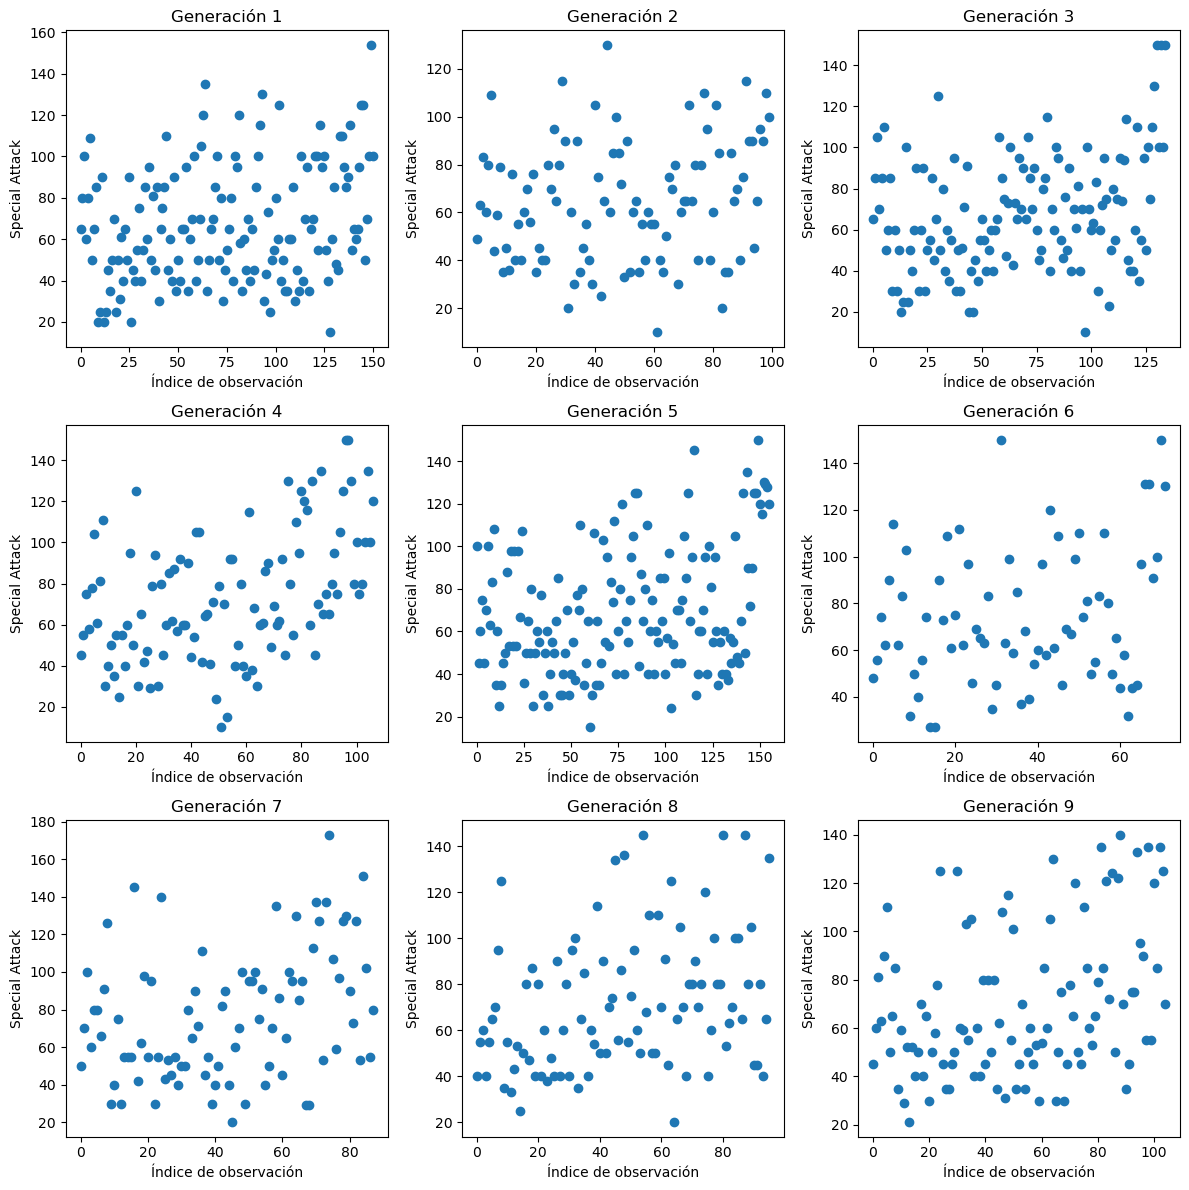

In [38]:
# No podemos rechazar Ho, por lo que podemos asumir que las varianzas son homogéneas. Veamos el tercer paso:

# Creamos un gráfico de dispersión para verificar la independencia de las muestras:
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
axs = axs.ravel()
for i, gen_sp_attack in enumerate([gen1_sp_attack, gen2_sp_attack, gen3_sp_attack, gen4_sp_attack, gen5_sp_attack, 
                                   gen6_sp_attack, gen7_sp_attack, gen8_sp_attack, gen9_sp_attack]):
    axs[i].scatter(range(len(gen_sp_attack)), gen_sp_attack)
    axs[i].set_title(f"Generación {i+1}")
    axs[i].set_xlabel("Índice de observación")
    axs[i].set_ylabel("Special Attack")
fig.tight_layout()
plt.show()

In [39]:
# No vemos patrones en esta variable tampoco, vamos a normalizar y a pasar la f_oneway posteriormente:

gen1_sp_attack_norm = StandardScaler().fit_transform(gen1_sp_attack.values.reshape(-1, 1))
gen2_sp_attack_norm = StandardScaler().fit_transform(gen2_sp_attack.values.reshape(-1, 1))
gen3_sp_attack_norm = StandardScaler().fit_transform(gen3_sp_attack.values.reshape(-1, 1))
gen4_sp_attack_norm = StandardScaler().fit_transform(gen4_sp_attack.values.reshape(-1, 1))
gen5_sp_attack_norm = StandardScaler().fit_transform(gen5_sp_attack.values.reshape(-1, 1))
gen6_sp_attack_norm = StandardScaler().fit_transform(gen6_sp_attack.values.reshape(-1, 1))
gen7_sp_attack_norm = StandardScaler().fit_transform(gen7_sp_attack.values.reshape(-1, 1))
gen8_sp_attack_norm = StandardScaler().fit_transform(gen8_sp_attack.values.reshape(-1, 1))
gen9_sp_attack_norm = StandardScaler().fit_transform(gen9_sp_attack.values.reshape(-1, 1))

f_value, p_value = f_oneway(gen1_sp_attack_norm, gen2_sp_attack_norm, gen3_sp_attack_norm, gen4_sp_attack_norm, gen5_sp_attack_norm, gen6_sp_attack_norm, gen7_sp_attack_norm, gen8_sp_attack_norm, gen9_sp_attack_norm)

if p_value < 0.05:
    print("Hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional")
else:
    print("No hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional")

No hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional


In [40]:
# Seguimos con sp_defense:

# Normalidad:

# Extraemos los datos de sp_defense de cada generación:
gen1_sp_defense = pokenova[pokenova["generation"] == 1]["sp_defense"]
gen2_sp_defense = pokenova[pokenova["generation"] == 2]["sp_defense"]
gen3_sp_defense = pokenova[pokenova["generation"] == 3]["sp_defense"]
gen4_sp_defense = pokenova[pokenova["generation"] == 4]["sp_defense"]
gen5_sp_defense = pokenova[pokenova["generation"] == 5]["sp_defense"]
gen6_sp_defense = pokenova[pokenova["generation"] == 6]["sp_defense"]
gen7_sp_defense = pokenova[pokenova["generation"] == 7]["sp_defense"]
gen8_sp_defense = pokenova[pokenova["generation"] == 8]["sp_defense"]
gen9_sp_defense = pokenova[pokenova["generation"] == 9]["sp_defense"]

# Realizamos el test de Shapiro-Wilk para cada muestra:
shapiro_gen1 = shapiro(gen1_sp_defense)
shapiro_gen2 = shapiro(gen2_sp_defense)
shapiro_gen3 = shapiro(gen3_sp_defense)
shapiro_gen4 = shapiro(gen4_sp_defense)
shapiro_gen5 = shapiro(gen5_sp_defense)
shapiro_gen6 = shapiro(gen6_sp_defense)
shapiro_gen7 = shapiro(gen7_sp_defense)
shapiro_gen8 = shapiro(gen8_sp_defense)
shapiro_gen9 = shapiro(gen9_sp_defense)

# Imprimimos los resultados:
print("Test de Shapiro-Wilk para cada muestra:")
print(f"Generación 1: statistic={shapiro_gen1.statistic:.3f}, p-value={shapiro_gen1.pvalue:.3f}")
print(f"Generación 2: statistic={shapiro_gen2.statistic:.3f}, p-value={shapiro_gen2.pvalue:.3f}")
print(f"Generación 3: statistic={shapiro_gen3.statistic:.3f}, p-value={shapiro_gen3.pvalue:.3f}")
print(f"Generación 4: statistic={shapiro_gen4.statistic:.3f}, p-value={shapiro_gen4.pvalue:.3f}")
print(f"Generación 5: statistic={shapiro_gen5.statistic:.3f}, p-value={shapiro_gen5.pvalue:.3f}")
print(f"Generación 6: statistic={shapiro_gen6.statistic:.3f}, p-value={shapiro_gen6.pvalue:.3f}")
print(f"Generación 7: statistic={shapiro_gen7.statistic:.3f}, p-value={shapiro_gen7.pvalue:.3f}")
print(f"Generación 8: statistic={shapiro_gen8.statistic:.3f}, p-value={shapiro_gen8.pvalue:.3f}")
print(f"Generación 9: statistic={shapiro_gen9.statistic:.3f}, p-value={shapiro_gen9.pvalue:.3f}")

# Si el p-valor es menor que el nivel de significatividad (por ejemplo, 0.05), entonces se puede rechazar la hipótesis nula
# de que los datos siguen una distribución normal.

Test de Shapiro-Wilk para cada muestra:
Generación 1: statistic=0.983, p-value=0.055
Generación 2: statistic=0.886, p-value=0.000
Generación 3: statistic=0.923, p-value=0.000
Generación 4: statistic=0.961, p-value=0.003
Generación 5: statistic=0.965, p-value=0.001
Generación 6: statistic=0.920, p-value=0.000
Generación 7: statistic=0.967, p-value=0.023
Generación 8: statistic=0.977, p-value=0.091
Generación 9: statistic=0.978, p-value=0.079


In [41]:
# En caso de que el supuesto 2 y 3 se cumplan, nos tocará de nuevo normalizar. Vamos con Levene ahora:

levene_test = levene(gen1_sp_defense, gen2_sp_defense, gen3_sp_defense, gen4_sp_defense, gen5_sp_defense, gen6_sp_defense, 
                     gen7_sp_defense, gen8_sp_defense, gen9_sp_defense)
print("Test de Levene para verificar la homogeneidad de varianzas:")
print(f"Statistic={levene_test.statistic:.3f}, p-value={levene_test.pvalue:.3f}")

# Si el p-valor es menor que el nivel de significación, se puede rechazar la hipótesis nula de que las varianzas son
# iguales.

Test de Levene para verificar la homogeneidad de varianzas:
Statistic=1.561, p-value=0.132


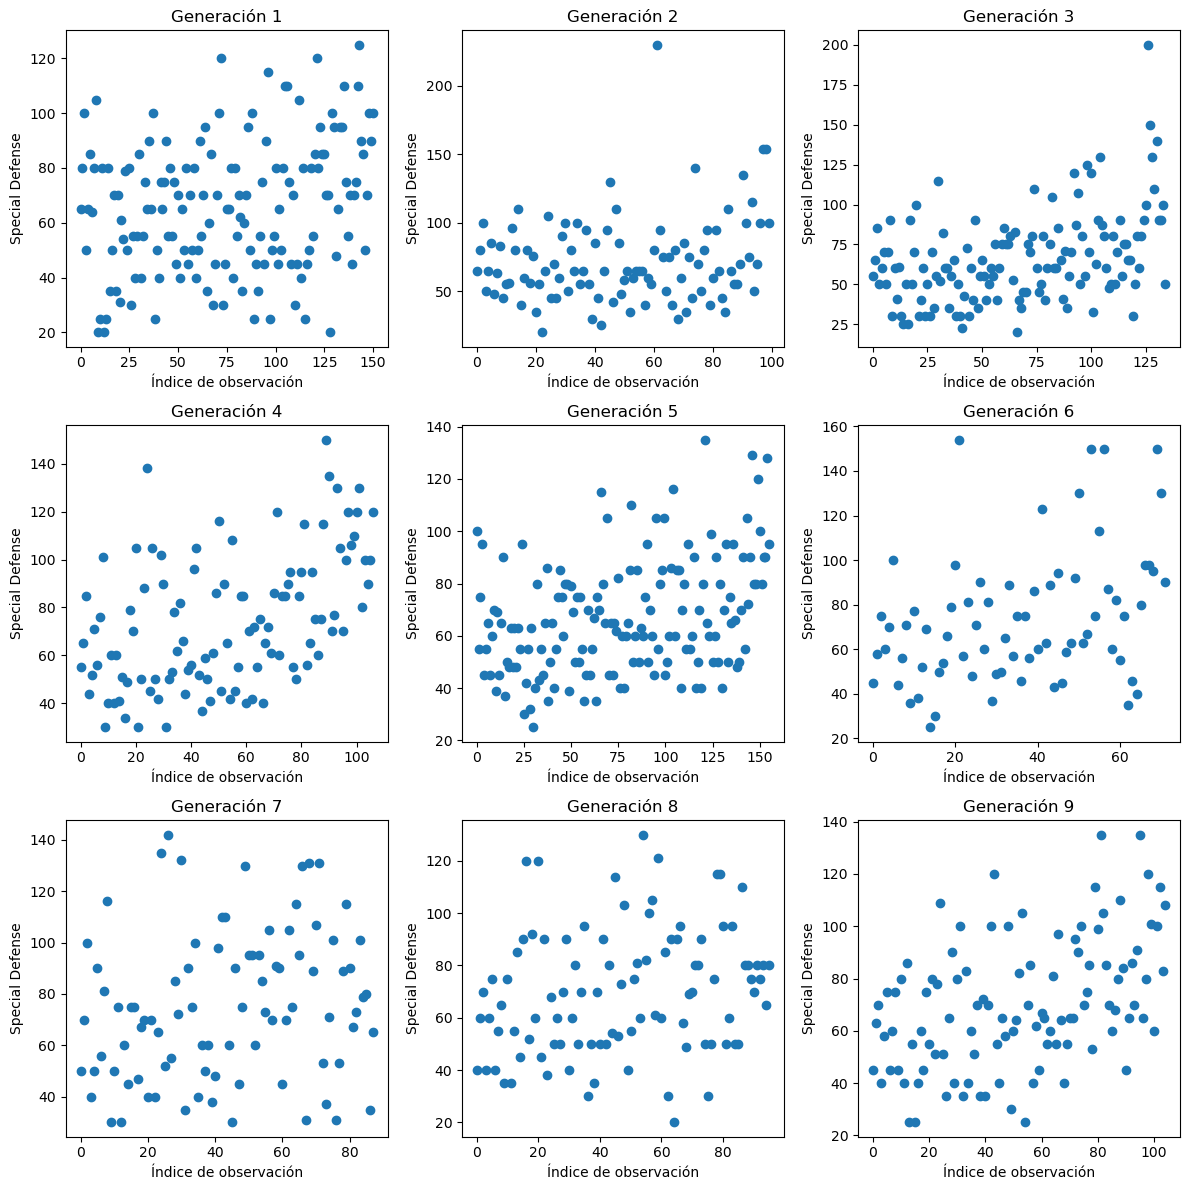

In [42]:
# No podemos rechazar Ho, por lo que podemos asumir que las varianzas son homogéneas. Veamos el tercer paso:

# Creamos un gráfico de dispersión para verificar la independencia de las muestras:
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
axs = axs.ravel()
for i, gen_sp_defense in enumerate([gen1_sp_defense, gen2_sp_defense, gen3_sp_defense, gen4_sp_defense, gen5_sp_defense, 
                                   gen6_sp_defense, gen7_sp_defense, gen8_sp_defense, gen9_sp_defense]):
    axs[i].scatter(range(len(gen_sp_defense)), gen_sp_defense)
    axs[i].set_title(f"Generación {i+1}")
    axs[i].set_xlabel("Índice de observación")
    axs[i].set_ylabel("Special Defense")
fig.tight_layout()
plt.show()

In [43]:
# No vemos patrones en esta variable tampoco, vamos a normalizar y a pasar la f_oneway posteriormente:

gen1_sp_defense_norm = StandardScaler().fit_transform(gen1_sp_defense.values.reshape(-1, 1))
gen2_sp_defense_norm = StandardScaler().fit_transform(gen2_sp_defense.values.reshape(-1, 1))
gen3_sp_defense_norm = StandardScaler().fit_transform(gen3_sp_defense.values.reshape(-1, 1))
gen4_sp_defense_norm = StandardScaler().fit_transform(gen4_sp_defense.values.reshape(-1, 1))
gen5_sp_defense_norm = StandardScaler().fit_transform(gen5_sp_defense.values.reshape(-1, 1))
gen6_sp_defense_norm = StandardScaler().fit_transform(gen6_sp_defense.values.reshape(-1, 1))
gen7_sp_defense_norm = StandardScaler().fit_transform(gen7_sp_defense.values.reshape(-1, 1))
gen8_sp_defense_norm = StandardScaler().fit_transform(gen8_sp_defense.values.reshape(-1, 1))
gen9_sp_defense_norm = StandardScaler().fit_transform(gen9_sp_defense.values.reshape(-1, 1))

f_value, p_value = f_oneway(gen1_sp_defense_norm, gen2_sp_defense_norm, gen3_sp_defense_norm, gen4_sp_defense_norm, gen5_sp_defense_norm, gen6_sp_defense_norm, gen7_sp_defense_norm, gen8_sp_defense_norm, gen9_sp_defense_norm)

if p_value < 0.05:
    print("Hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional")
else:
    print("No hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional")

No hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional


Vamos ahora con el **BLOQUE COMPETITIVO**. Hay que tener en cuenta que estas cinco variables son diferentes combinaciones lineales de las stats, por lo que igual no tiene sentido hacer ANOVA's.

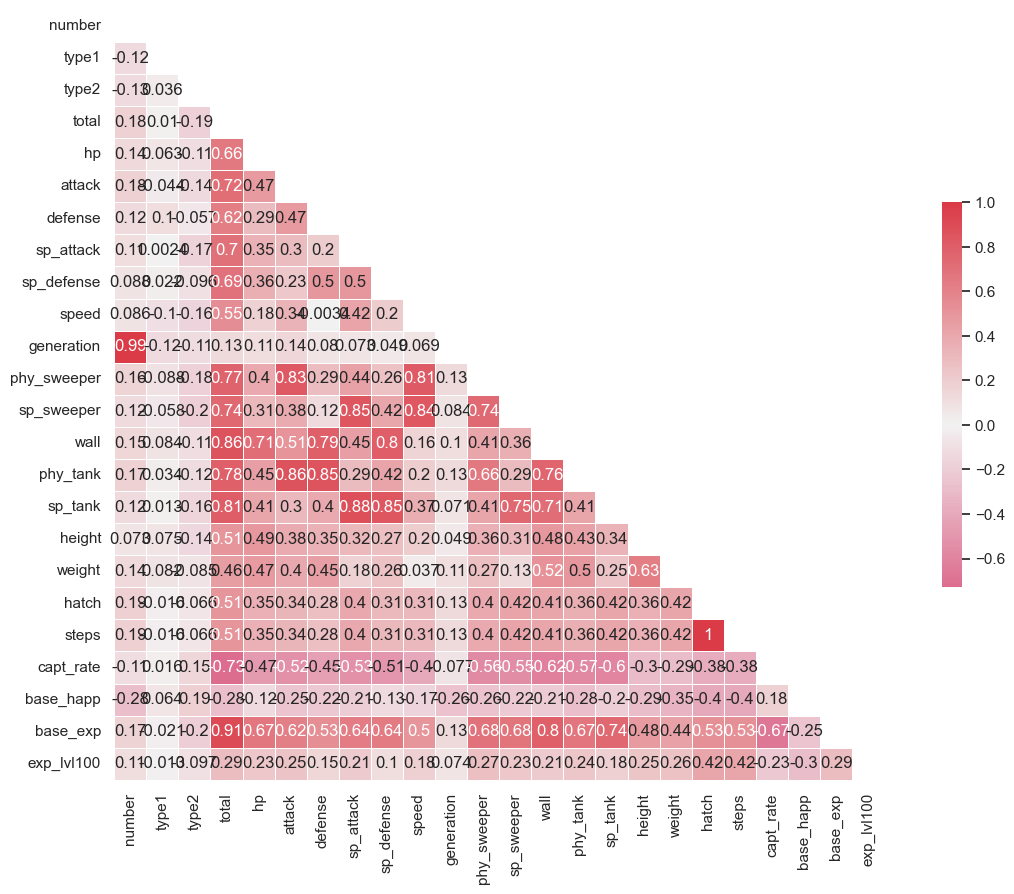

In [44]:
# Vamos a ver si hay correlación entre las variables que son combinación lineal (phy_sweeper, sp_sweeper, wall, phy_tank y
# sp_tank) con las stats originales y si hay colinealidad entre ellas. De darse esto, lo más probable es que no valga la
# pena hacer ANOVA'S puesto que los resultados presumiblemente van a ser muy parecidos a los obtenidos con las stats.

plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(pokenova.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(pokenova.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

Vamos que, efectivamente, existen tanto correlación como colinealidad, por lo que no tendría sentido hacer ANOVA's. No obstante, vamos a hacerlas para asegurarnos. Seguiremos el mismo proceso que antes.

In [45]:
# phy_sweeper:

# Normalidad:

# Extraemos los datos de phy_sweeper de cada generación:
gen1_phy_sweeper = pokenova[pokenova["generation"] == 1]["phy_sweeper"]
gen2_phy_sweeper = pokenova[pokenova["generation"] == 2]["phy_sweeper"]
gen3_phy_sweeper = pokenova[pokenova["generation"] == 3]["phy_sweeper"]
gen4_phy_sweeper = pokenova[pokenova["generation"] == 4]["phy_sweeper"]
gen5_phy_sweeper = pokenova[pokenova["generation"] == 5]["phy_sweeper"]
gen6_phy_sweeper = pokenova[pokenova["generation"] == 6]["phy_sweeper"]
gen7_phy_sweeper = pokenova[pokenova["generation"] == 7]["phy_sweeper"]
gen8_phy_sweeper = pokenova[pokenova["generation"] == 8]["phy_sweeper"]
gen9_phy_sweeper = pokenova[pokenova["generation"] == 9]["phy_sweeper"]

# Realizamos el test de Shapiro-Wilk para cada muestra:
shapiro_gen1 = shapiro(gen1_phy_sweeper)
shapiro_gen2 = shapiro(gen2_phy_sweeper)
shapiro_gen3 = shapiro(gen3_phy_sweeper)
shapiro_gen4 = shapiro(gen4_phy_sweeper)
shapiro_gen5 = shapiro(gen5_phy_sweeper)
shapiro_gen6 = shapiro(gen6_phy_sweeper)
shapiro_gen7 = shapiro(gen7_phy_sweeper)
shapiro_gen8 = shapiro(gen8_phy_sweeper)
shapiro_gen9 = shapiro(gen9_phy_sweeper)

# Imprimimos los resultados:
print("Test de Shapiro-Wilk para cada muestra:")
print(f"Generación 1: statistic={shapiro_gen1.statistic:.3f}, p-value={shapiro_gen1.pvalue:.3f}")
print(f"Generación 2: statistic={shapiro_gen2.statistic:.3f}, p-value={shapiro_gen2.pvalue:.3f}")
print(f"Generación 3: statistic={shapiro_gen3.statistic:.3f}, p-value={shapiro_gen3.pvalue:.3f}")
print(f"Generación 4: statistic={shapiro_gen4.statistic:.3f}, p-value={shapiro_gen4.pvalue:.3f}")
print(f"Generación 5: statistic={shapiro_gen5.statistic:.3f}, p-value={shapiro_gen5.pvalue:.3f}")
print(f"Generación 6: statistic={shapiro_gen6.statistic:.3f}, p-value={shapiro_gen6.pvalue:.3f}")
print(f"Generación 7: statistic={shapiro_gen7.statistic:.3f}, p-value={shapiro_gen7.pvalue:.3f}")
print(f"Generación 8: statistic={shapiro_gen8.statistic:.3f}, p-value={shapiro_gen8.pvalue:.3f}")
print(f"Generación 9: statistic={shapiro_gen9.statistic:.3f}, p-value={shapiro_gen9.pvalue:.3f}")

# Si el p-valor es menor que el nivel de significatividad (por ejemplo, 0.05), entonces se puede rechazar la hipótesis nula
# de que los datos siguen una distribución normal.

Test de Shapiro-Wilk para cada muestra:
Generación 1: statistic=0.984, p-value=0.088
Generación 2: statistic=0.987, p-value=0.437
Generación 3: statistic=0.973, p-value=0.009
Generación 4: statistic=0.991, p-value=0.675
Generación 5: statistic=0.981, p-value=0.030
Generación 6: statistic=0.980, p-value=0.294
Generación 7: statistic=0.984, p-value=0.348
Generación 8: statistic=0.986, p-value=0.417
Generación 9: statistic=0.984, p-value=0.255


In [46]:
# En caso de que el supuesto 2 y 3 se cumplan, nos tocará de nuevo normalizar. Vamos con Levene ahora:

levene_test = levene(gen1_phy_sweeper, gen2_phy_sweeper, gen3_phy_sweeper, gen4_phy_sweeper, gen5_phy_sweeper,
                     gen6_phy_sweeper, gen7_phy_sweeper, gen8_phy_sweeper, gen9_phy_sweeper)
print("Test de Levene para verificar la homogeneidad de varianzas:")
print(f"Statistic={levene_test.statistic:.3f}, p-value={levene_test.pvalue:.3f}")

# Si el p-valor es menor que el nivel de significación, se puede rechazar la hipótesis nula de que las varianzas son
# iguales.

Test de Levene para verificar la homogeneidad de varianzas:
Statistic=1.698, p-value=0.095


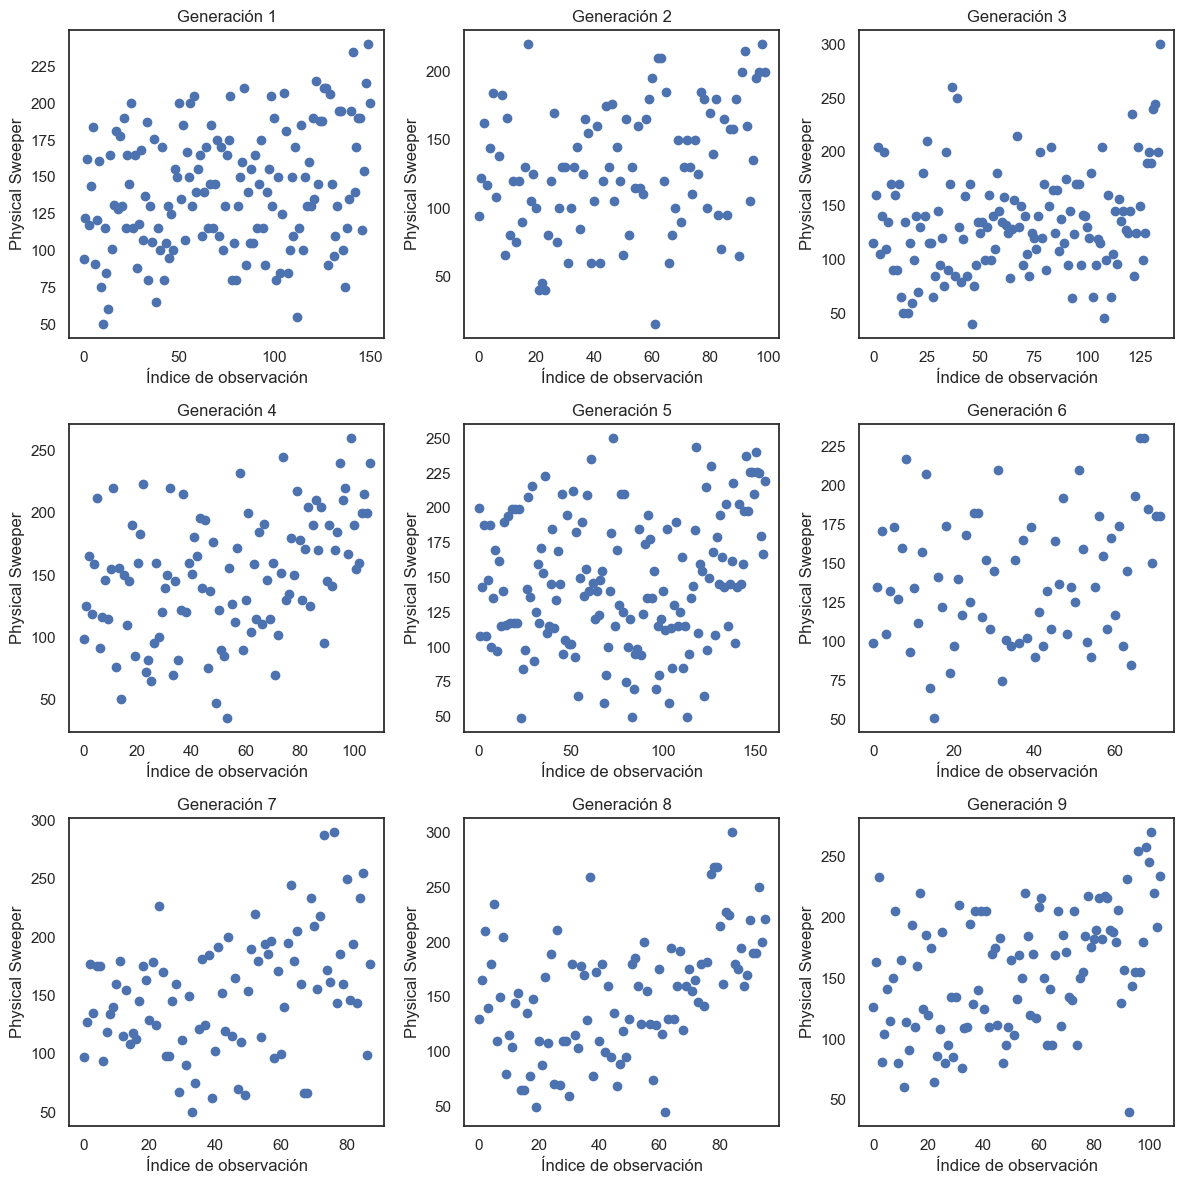

In [47]:
# No podemos rechazar Ho, por lo que podemos asumir que las varianzas son homogéneas. Veamos el tercer paso:

# Creamos un gráfico de dispersión para verificar la independencia de las muestras:
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
axs = axs.ravel()
for i, gen_phy_sweeper in enumerate([gen1_phy_sweeper, gen2_phy_sweeper, gen3_phy_sweeper, gen4_phy_sweeper,
                                     gen5_phy_sweeper, gen6_phy_sweeper, gen7_phy_sweeper, gen8_phy_sweeper, gen9_phy_sweeper]):
    axs[i].scatter(range(len(gen_phy_sweeper)), gen_phy_sweeper)
    axs[i].set_title(f"Generación {i+1}")
    axs[i].set_xlabel("Índice de observación")
    axs[i].set_ylabel("Physical Sweeper")
fig.tight_layout()
plt.show()

In [48]:
# No vemos patrones en esta variable tampoco, vamos a normalizar y a pasar la f_oneway posteriormente:

gen1_phy_sweeper_norm = StandardScaler().fit_transform(gen1_phy_sweeper.values.reshape(-1, 1))
gen2_phy_sweeper_norm = StandardScaler().fit_transform(gen2_phy_sweeper.values.reshape(-1, 1))
gen3_phy_sweeper_norm = StandardScaler().fit_transform(gen3_phy_sweeper.values.reshape(-1, 1))
gen4_phy_sweeper_norm = StandardScaler().fit_transform(gen4_phy_sweeper.values.reshape(-1, 1))
gen5_phy_sweeper_norm = StandardScaler().fit_transform(gen5_phy_sweeper.values.reshape(-1, 1))
gen6_phy_sweeper_norm = StandardScaler().fit_transform(gen6_phy_sweeper.values.reshape(-1, 1))
gen7_phy_sweeper_norm = StandardScaler().fit_transform(gen7_phy_sweeper.values.reshape(-1, 1))
gen8_phy_sweeper_norm = StandardScaler().fit_transform(gen8_phy_sweeper.values.reshape(-1, 1))
gen9_phy_sweeper_norm = StandardScaler().fit_transform(gen9_phy_sweeper.values.reshape(-1, 1))

f_value, p_value = f_oneway(gen1_phy_sweeper_norm, gen2_phy_sweeper_norm, gen3_phy_sweeper_norm, gen4_phy_sweeper_norm, gen5_phy_sweeper_norm, gen6_phy_sweeper_norm, gen7_phy_sweeper_norm, gen8_phy_sweeper_norm, gen9_phy_sweeper_norm)

if p_value < 0.05:
    print("Hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional")
else:
    print("No hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional")

No hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional


In [49]:
# sp_sweeper:

# Normalidad:

# Extraemos los datos de sp_sweeper de cada generación:
gen1_sp_sweeper = pokenova[pokenova["generation"] == 1]["sp_sweeper"]
gen2_sp_sweeper = pokenova[pokenova["generation"] == 2]["sp_sweeper"]
gen3_sp_sweeper = pokenova[pokenova["generation"] == 3]["sp_sweeper"]
gen4_sp_sweeper = pokenova[pokenova["generation"] == 4]["sp_sweeper"]
gen5_sp_sweeper = pokenova[pokenova["generation"] == 5]["sp_sweeper"]
gen6_sp_sweeper = pokenova[pokenova["generation"] == 6]["sp_sweeper"]
gen7_sp_sweeper = pokenova[pokenova["generation"] == 7]["sp_sweeper"]
gen8_sp_sweeper = pokenova[pokenova["generation"] == 8]["sp_sweeper"]
gen9_sp_sweeper = pokenova[pokenova["generation"] == 9]["sp_sweeper"]

# Realizamos el test de Shapiro-Wilk para cada muestra:
shapiro_gen1 = shapiro(gen1_sp_sweeper)
shapiro_gen2 = shapiro(gen2_sp_sweeper)
shapiro_gen3 = shapiro(gen3_sp_sweeper)
shapiro_gen4 = shapiro(gen4_sp_sweeper)
shapiro_gen5 = shapiro(gen5_sp_sweeper)
shapiro_gen6 = shapiro(gen6_sp_sweeper)
shapiro_gen7 = shapiro(gen7_sp_sweeper)
shapiro_gen8 = shapiro(gen8_sp_sweeper)
shapiro_gen9 = shapiro(gen9_sp_sweeper)

# Imprimimos los resultados:
print("Test de Shapiro-Wilk para cada muestra:")
print(f"Generación 1: statistic={shapiro_gen1.statistic:.3f}, p-value={shapiro_gen1.pvalue:.3f}")
print(f"Generación 2: statistic={shapiro_gen2.statistic:.3f}, p-value={shapiro_gen2.pvalue:.3f}")
print(f"Generación 3: statistic={shapiro_gen3.statistic:.3f}, p-value={shapiro_gen3.pvalue:.3f}")
print(f"Generación 4: statistic={shapiro_gen4.statistic:.3f}, p-value={shapiro_gen4.pvalue:.3f}")
print(f"Generación 5: statistic={shapiro_gen5.statistic:.3f}, p-value={shapiro_gen5.pvalue:.3f}")
print(f"Generación 6: statistic={shapiro_gen6.statistic:.3f}, p-value={shapiro_gen6.pvalue:.3f}")
print(f"Generación 7: statistic={shapiro_gen7.statistic:.3f}, p-value={shapiro_gen7.pvalue:.3f}")
print(f"Generación 8: statistic={shapiro_gen8.statistic:.3f}, p-value={shapiro_gen8.pvalue:.3f}")
print(f"Generación 9: statistic={shapiro_gen9.statistic:.3f}, p-value={shapiro_gen9.pvalue:.3f}")

# Si el p-valor es menor que el nivel de significatividad (por ejemplo, 0.05), entonces se puede rechazar la hipótesis nula
# de que los datos siguen una distribución normal.

Test de Shapiro-Wilk para cada muestra:
Generación 1: statistic=0.981, p-value=0.034
Generación 2: statistic=0.994, p-value=0.923
Generación 3: statistic=0.980, p-value=0.046
Generación 4: statistic=0.993, p-value=0.827
Generación 5: statistic=0.955, p-value=0.000
Generación 6: statistic=0.962, p-value=0.030
Generación 7: statistic=0.963, p-value=0.012
Generación 8: statistic=0.965, p-value=0.012
Generación 9: statistic=0.974, p-value=0.034


In [50]:
# En caso de que el supuesto 2 y 3 se cumplan, nos tocará de nuevo normalizar. Vamos con Levene ahora:

levene_test = levene(gen1_sp_sweeper, gen2_sp_sweeper, gen3_sp_sweeper, gen4_sp_sweeper, gen5_sp_sweeper,
                     gen6_sp_sweeper, gen7_sp_sweeper, gen8_sp_sweeper, gen9_sp_sweeper)
print("Test de Levene para verificar la homogeneidad de varianzas:")
print(f"Statistic={levene_test.statistic:.3f}, p-value={levene_test.pvalue:.3f}")

# Si el p-valor es menor que el nivel de significación, se puede rechazar la hipótesis nula de que las varianzas son
# iguales.

Test de Levene para verificar la homogeneidad de varianzas:
Statistic=0.864, p-value=0.546


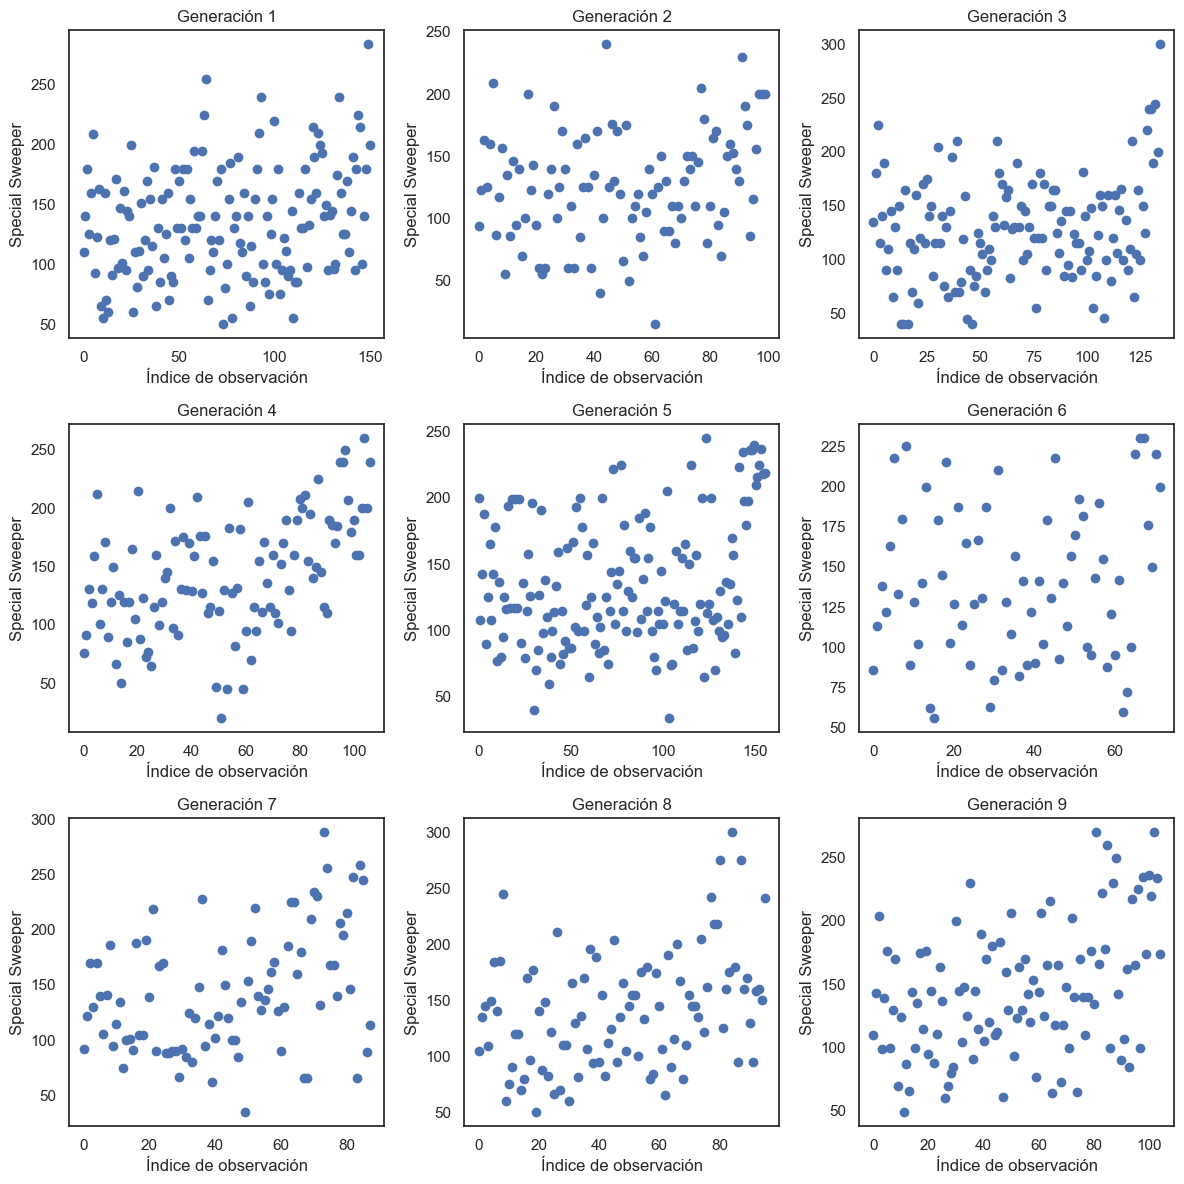

In [51]:
# No podemos rechazar Ho, por lo que podemos asumir que las varianzas son homogéneas. Veamos el tercer paso:

# Creamos un gráfico de dispersión para verificar la independencia de las muestras:
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
axs = axs.ravel()
for i, gen_sp_sweeper in enumerate([gen1_sp_sweeper, gen2_sp_sweeper, gen3_sp_sweeper, gen4_sp_sweeper, gen5_sp_sweeper,
                     gen6_sp_sweeper, gen7_sp_sweeper, gen8_sp_sweeper, gen9_sp_sweeper]):
    axs[i].scatter(range(len(gen_sp_sweeper)), gen_sp_sweeper)
    axs[i].set_title(f"Generación {i+1}")
    axs[i].set_xlabel("Índice de observación")
    axs[i].set_ylabel("Special Sweeper")
fig.tight_layout()
plt.show()

In [52]:
# No vemos patrones en esta variable tampoco, vamos a normalizar y a pasar la f_oneway posteriormente:

gen1_sp_sweeper_norm = StandardScaler().fit_transform(gen1_sp_sweeper.values.reshape(-1, 1))
gen2_sp_sweeper_norm = StandardScaler().fit_transform(gen2_sp_sweeper.values.reshape(-1, 1))
gen3_sp_sweeper_norm = StandardScaler().fit_transform(gen3_sp_sweeper.values.reshape(-1, 1))
gen4_sp_sweeper_norm = StandardScaler().fit_transform(gen4_sp_sweeper.values.reshape(-1, 1))
gen5_sp_sweeper_norm = StandardScaler().fit_transform(gen5_sp_sweeper.values.reshape(-1, 1))
gen6_sp_sweeper_norm = StandardScaler().fit_transform(gen6_sp_sweeper.values.reshape(-1, 1))
gen7_sp_sweeper_norm = StandardScaler().fit_transform(gen7_sp_sweeper.values.reshape(-1, 1))
gen8_sp_sweeper_norm = StandardScaler().fit_transform(gen8_sp_sweeper.values.reshape(-1, 1))
gen9_sp_sweeper_norm = StandardScaler().fit_transform(gen9_sp_sweeper.values.reshape(-1, 1))

f_value, p_value = f_oneway(gen1_sp_sweeper_norm, gen2_sp_sweeper_norm, gen3_sp_sweeper_norm, gen4_sp_sweeper_norm, gen5_sp_sweeper_norm, gen6_sp_sweeper_norm, gen7_sp_sweeper_norm, gen8_sp_sweeper_norm, gen9_sp_sweeper_norm)

if p_value < 0.05:
    print("Hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional")
else:
    print("No hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional")

No hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional


In [53]:
# wall:

# Normalidad:

# Extraemos los datos de wall de cada generación:
gen1_wall = pokenova[pokenova["generation"] == 1]["wall"]
gen2_wall = pokenova[pokenova["generation"] == 2]["wall"]
gen3_wall = pokenova[pokenova["generation"] == 3]["wall"]
gen4_wall = pokenova[pokenova["generation"] == 4]["wall"]
gen5_wall = pokenova[pokenova["generation"] == 5]["wall"]
gen6_wall = pokenova[pokenova["generation"] == 6]["wall"]
gen7_wall = pokenova[pokenova["generation"] == 7]["wall"]
gen8_wall = pokenova[pokenova["generation"] == 8]["wall"]
gen9_wall = pokenova[pokenova["generation"] == 9]["wall"]

# Realizamos el test de Shapiro-Wilk para cada muestra:
shapiro_gen1 = shapiro(gen1_wall)
shapiro_gen2 = shapiro(gen2_wall)
shapiro_gen3 = shapiro(gen3_wall)
shapiro_gen4 = shapiro(gen4_wall)
shapiro_gen5 = shapiro(gen5_wall)
shapiro_gen6 = shapiro(gen6_wall)
shapiro_gen7 = shapiro(gen7_wall)
shapiro_gen8 = shapiro(gen8_wall)
shapiro_gen9 = shapiro(gen9_wall)

# Imprimimos los resultados:
print("Test de Shapiro-Wilk para cada muestra:")
print(f"Generación 1: statistic={shapiro_gen1.statistic:.3f}, p-value={shapiro_gen1.pvalue:.3f}")
print(f"Generación 2: statistic={shapiro_gen2.statistic:.3f}, p-value={shapiro_gen2.pvalue:.3f}")
print(f"Generación 3: statistic={shapiro_gen3.statistic:.3f}, p-value={shapiro_gen3.pvalue:.3f}")
print(f"Generación 4: statistic={shapiro_gen4.statistic:.3f}, p-value={shapiro_gen4.pvalue:.3f}")
print(f"Generación 5: statistic={shapiro_gen5.statistic:.3f}, p-value={shapiro_gen5.pvalue:.3f}")
print(f"Generación 6: statistic={shapiro_gen6.statistic:.3f}, p-value={shapiro_gen6.pvalue:.3f}")
print(f"Generación 7: statistic={shapiro_gen7.statistic:.3f}, p-value={shapiro_gen7.pvalue:.3f}")
print(f"Generación 8: statistic={shapiro_gen8.statistic:.3f}, p-value={shapiro_gen8.pvalue:.3f}")
print(f"Generación 9: statistic={shapiro_gen9.statistic:.3f}, p-value={shapiro_gen9.pvalue:.3f}")

# Si el p-valor es menor que el nivel de significatividad (por ejemplo, 0.05), entonces se puede rechazar la hipótesis nula
# de que los datos siguen una distribución normal.

Test de Shapiro-Wilk para cada muestra:
Generación 1: statistic=0.990, p-value=0.381
Generación 2: statistic=0.961, p-value=0.004
Generación 3: statistic=0.976, p-value=0.016
Generación 4: statistic=0.982, p-value=0.146
Generación 5: statistic=0.971, p-value=0.002
Generación 6: statistic=0.969, p-value=0.070
Generación 7: statistic=0.979, p-value=0.152
Generación 8: statistic=0.973, p-value=0.045
Generación 9: statistic=0.981, p-value=0.149


In [54]:
# En caso de que el supuesto 2 y 3 se cumplan, nos tocará de nuevo normalizar. Vamos con Levene ahora:

levene_test = levene(gen1_wall, gen2_wall, gen3_wall, gen4_wall, gen5_wall,
                     gen6_wall, gen7_wall, gen8_wall, gen9_wall)
print("Test de Levene para verificar la homogeneidad de varianzas:")
print(f"Statistic={levene_test.statistic:.3f}, p-value={levene_test.pvalue:.3f}")

# Si el p-valor es menor que el nivel de significación, se puede rechazar la hipótesis nula de que las varianzas son
# iguales.

Test de Levene para verificar la homogeneidad de varianzas:
Statistic=1.851, p-value=0.064


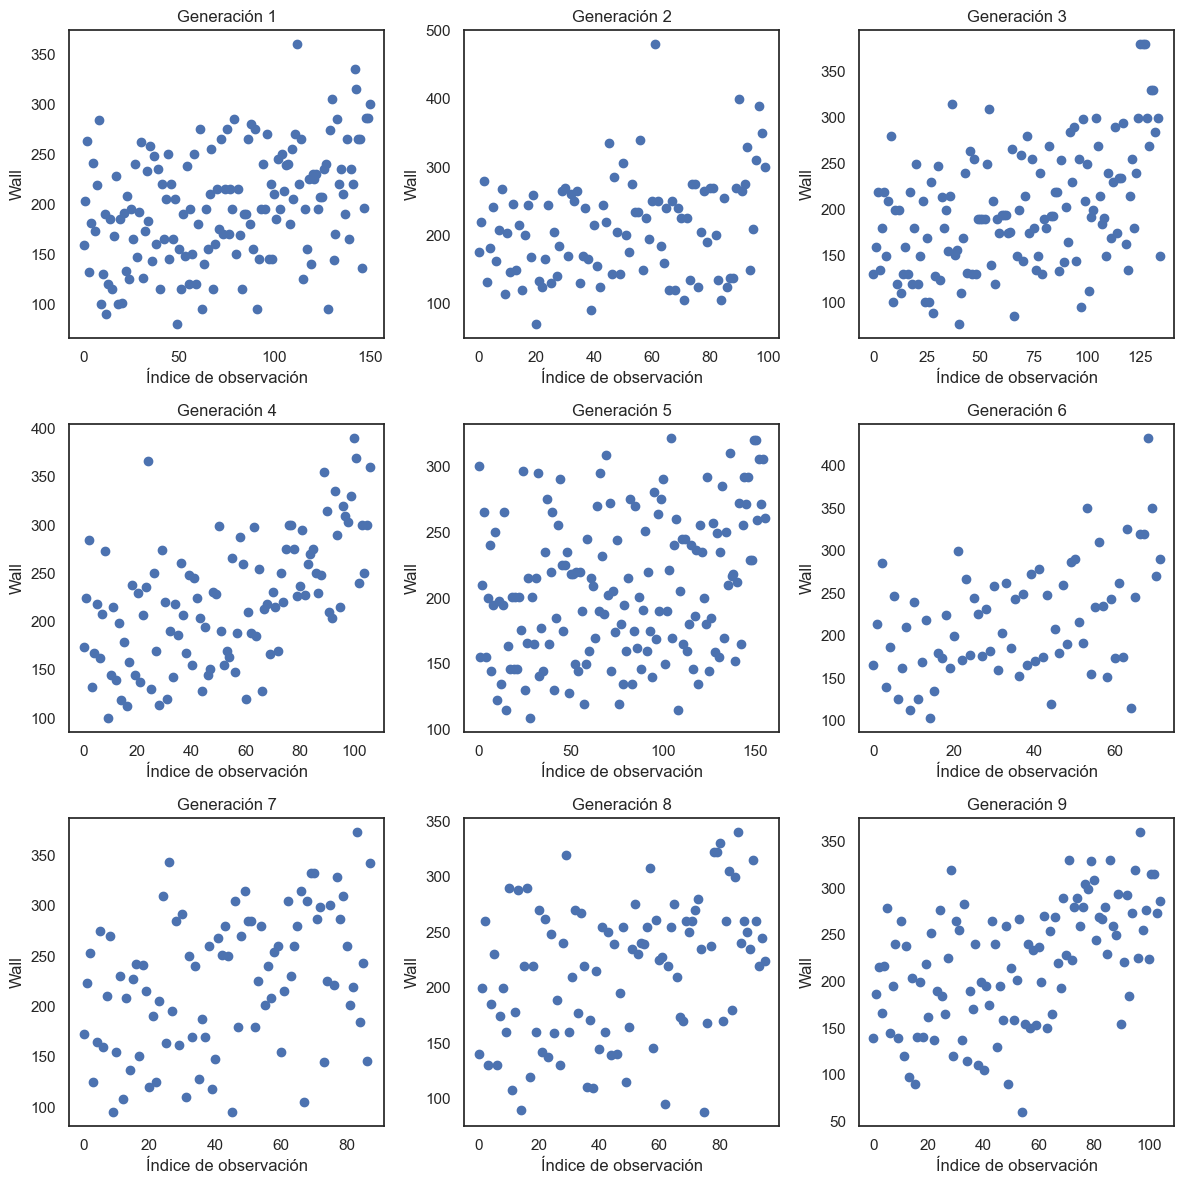

In [55]:
# No podemos rechazar Ho, por lo que podemos asumir que las varianzas son homogéneas. Veamos el tercer paso:

# Creamos un gráfico de dispersión para verificar la independencia de las muestras:
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
axs = axs.ravel()
for i, gen_wall in enumerate([gen1_wall, gen2_wall, gen3_wall, gen4_wall, gen5_wall,
                     gen6_wall, gen7_wall, gen8_wall, gen9_wall]):
    axs[i].scatter(range(len(gen_wall)), gen_wall)
    axs[i].set_title(f"Generación {i+1}")
    axs[i].set_xlabel("Índice de observación")
    axs[i].set_ylabel("Wall")
fig.tight_layout()
plt.show()

In [56]:
# No vemos patrones en esta variable tampoco, vamos a normalizar y a pasar la f_oneway posteriormente:

gen1_wall_norm = StandardScaler().fit_transform(gen1_wall.values.reshape(-1, 1))
gen2_wall_norm = StandardScaler().fit_transform(gen2_wall.values.reshape(-1, 1))
gen3_wall_norm = StandardScaler().fit_transform(gen3_wall.values.reshape(-1, 1))
gen4_wall_norm = StandardScaler().fit_transform(gen4_wall.values.reshape(-1, 1))
gen5_wall_norm = StandardScaler().fit_transform(gen5_wall.values.reshape(-1, 1))
gen6_wall_norm = StandardScaler().fit_transform(gen6_wall.values.reshape(-1, 1))
gen7_wall_norm = StandardScaler().fit_transform(gen7_wall.values.reshape(-1, 1))
gen8_wall_norm = StandardScaler().fit_transform(gen8_wall.values.reshape(-1, 1))
gen9_wall_norm = StandardScaler().fit_transform(gen9_wall.values.reshape(-1, 1))

f_value, p_value = f_oneway(gen1_wall_norm, gen2_wall_norm, gen3_wall_norm, gen4_wall_norm, gen5_wall_norm, gen6_wall_norm, gen7_wall_norm, gen8_wall_norm, gen9_wall_norm)

if p_value < 0.05:
    print("Hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional")
else:
    print("No hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional")

No hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional


In [57]:
# phy_tank:

# Normalidad:

# Extraemos los datos de phy_tank de cada generación:
gen1_phy_tank = pokenova[pokenova["generation"] == 1]["phy_tank"]
gen2_phy_tank = pokenova[pokenova["generation"] == 2]["phy_tank"]
gen3_phy_tank = pokenova[pokenova["generation"] == 3]["phy_tank"]
gen4_phy_tank = pokenova[pokenova["generation"] == 4]["phy_tank"]
gen5_phy_tank = pokenova[pokenova["generation"] == 5]["phy_tank"]
gen6_phy_tank = pokenova[pokenova["generation"] == 6]["phy_tank"]
gen7_phy_tank = pokenova[pokenova["generation"] == 7]["phy_tank"]
gen8_phy_tank = pokenova[pokenova["generation"] == 8]["phy_tank"]
gen9_phy_tank = pokenova[pokenova["generation"] == 9]["phy_tank"]

# Realizamos el test de Shapiro-Wilk para cada muestra:
shapiro_gen1 = shapiro(gen1_phy_tank)
shapiro_gen2 = shapiro(gen2_phy_tank)
shapiro_gen3 = shapiro(gen3_phy_tank)
shapiro_gen4 = shapiro(gen4_phy_tank)
shapiro_gen5 = shapiro(gen5_phy_tank)
shapiro_gen6 = shapiro(gen6_phy_tank)
shapiro_gen7 = shapiro(gen7_phy_tank)
shapiro_gen8 = shapiro(gen8_phy_tank)
shapiro_gen9 = shapiro(gen9_phy_tank)

# Imprimimos los resultados:
print("Test de Shapiro-Wilk para cada muestra:")
print(f"Generación 1: statistic={shapiro_gen1.statistic:.3f}, p-value={shapiro_gen1.pvalue:.3f}")
print(f"Generación 2: statistic={shapiro_gen2.statistic:.3f}, p-value={shapiro_gen2.pvalue:.3f}")
print(f"Generación 3: statistic={shapiro_gen3.statistic:.3f}, p-value={shapiro_gen3.pvalue:.3f}")
print(f"Generación 4: statistic={shapiro_gen4.statistic:.3f}, p-value={shapiro_gen4.pvalue:.3f}")
print(f"Generación 5: statistic={shapiro_gen5.statistic:.3f}, p-value={shapiro_gen5.pvalue:.3f}")
print(f"Generación 6: statistic={shapiro_gen6.statistic:.3f}, p-value={shapiro_gen6.pvalue:.3f}")
print(f"Generación 7: statistic={shapiro_gen7.statistic:.3f}, p-value={shapiro_gen7.pvalue:.3f}")
print(f"Generación 8: statistic={shapiro_gen8.statistic:.3f}, p-value={shapiro_gen8.pvalue:.3f}")
print(f"Generación 9: statistic={shapiro_gen9.statistic:.3f}, p-value={shapiro_gen9.pvalue:.3f}")

# Si el p-valor es menor que el nivel de significatividad (por ejemplo, 0.05), entonces se puede rechazar la hipótesis nula
# de que los datos siguen una distribución normal.

Test de Shapiro-Wilk para cada muestra:
Generación 1: statistic=0.993, p-value=0.618
Generación 2: statistic=0.990, p-value=0.667
Generación 3: statistic=0.972, p-value=0.007
Generación 4: statistic=0.990, p-value=0.639
Generación 5: statistic=0.977, p-value=0.010
Generación 6: statistic=0.958, p-value=0.017
Generación 7: statistic=0.977, p-value=0.111
Generación 8: statistic=0.984, p-value=0.308
Generación 9: statistic=0.976, p-value=0.058


In [58]:
# En caso de que el supuesto 2 y 3 se cumplan, nos tocará de nuevo normalizar. Vamos con Levene ahora:

levene_test = levene(gen1_phy_tank, gen2_phy_tank, gen3_phy_tank, gen4_phy_tank, gen5_phy_tank,
                     gen6_phy_tank, gen7_phy_tank, gen8_phy_tank, gen9_phy_tank)
print("Test de Levene para verificar la homogeneidad de varianzas:")
print(f"Statistic={levene_test.statistic:.3f}, p-value={levene_test.pvalue:.3f}")

# Si el p-valor es menor que el nivel de significación, se puede rechazar la hipótesis nula de que las varianzas son
# iguales.

Test de Levene para verificar la homogeneidad de varianzas:
Statistic=1.067, p-value=0.384


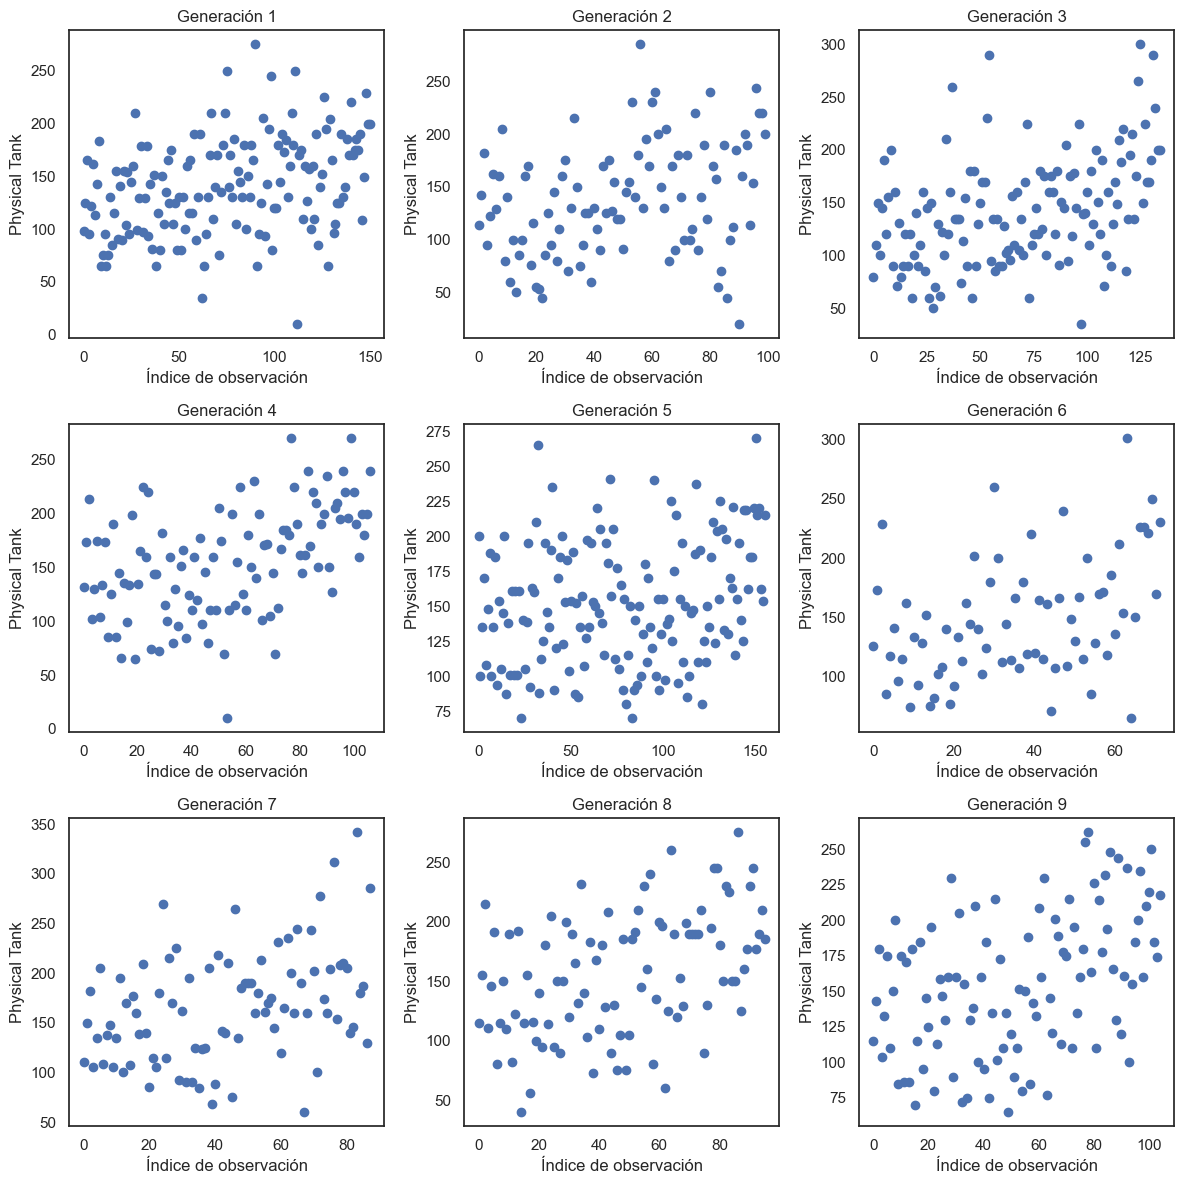

In [59]:
# No podemos rechazar Ho, por lo que podemos asumir que las varianzas son homogéneas. Veamos el tercer paso:

# Creamos un gráfico de dispersión para verificar la independencia de las muestras:
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
axs = axs.ravel()
for i, gen_phy_tank in enumerate([gen1_phy_tank, gen2_phy_tank, gen3_phy_tank, gen4_phy_tank, gen5_phy_tank,
                     gen6_phy_tank, gen7_phy_tank, gen8_phy_tank, gen9_phy_tank]):
    axs[i].scatter(range(len(gen_phy_tank)), gen_phy_tank)
    axs[i].set_title(f"Generación {i+1}")
    axs[i].set_xlabel("Índice de observación")
    axs[i].set_ylabel("Physical Tank")
fig.tight_layout()
plt.show()

In [60]:
# No vemos patrones en esta variable tampoco, vamos a normalizar y a pasar la f_oneway posteriormente:

gen1_phy_tank_norm = StandardScaler().fit_transform(gen1_phy_tank.values.reshape(-1, 1))
gen2_phy_tank_norm = StandardScaler().fit_transform(gen2_phy_tank.values.reshape(-1, 1))
gen3_phy_tank_norm = StandardScaler().fit_transform(gen3_phy_tank.values.reshape(-1, 1))
gen4_phy_tank_norm = StandardScaler().fit_transform(gen4_phy_tank.values.reshape(-1, 1))
gen5_phy_tank_norm = StandardScaler().fit_transform(gen5_phy_tank.values.reshape(-1, 1))
gen6_phy_tank_norm = StandardScaler().fit_transform(gen6_phy_tank.values.reshape(-1, 1))
gen7_phy_tank_norm = StandardScaler().fit_transform(gen7_phy_tank.values.reshape(-1, 1))
gen8_phy_tank_norm = StandardScaler().fit_transform(gen8_phy_tank.values.reshape(-1, 1))
gen9_phy_tank_norm = StandardScaler().fit_transform(gen9_phy_tank.values.reshape(-1, 1))

f_value, p_value = f_oneway(gen1_phy_tank_norm, gen2_phy_tank_norm, gen3_phy_tank_norm, gen4_phy_tank_norm, gen5_phy_tank_norm, gen6_phy_tank_norm, gen7_phy_tank_norm, gen8_phy_tank_norm, gen9_phy_tank_norm)

if p_value < 0.05:
    print("Hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional")
else:
    print("No hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional")

No hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional


In [61]:
# sp_tank:

# Normalidad:

# Extraemos los datos de sp_tank de cada generación:
gen1_sp_tank = pokenova[pokenova["generation"] == 1]["sp_tank"]
gen2_sp_tank = pokenova[pokenova["generation"] == 2]["sp_tank"]
gen3_sp_tank = pokenova[pokenova["generation"] == 3]["sp_tank"]
gen4_sp_tank = pokenova[pokenova["generation"] == 4]["sp_tank"]
gen5_sp_tank = pokenova[pokenova["generation"] == 5]["sp_tank"]
gen6_sp_tank = pokenova[pokenova["generation"] == 6]["sp_tank"]
gen7_sp_tank = pokenova[pokenova["generation"] == 7]["sp_tank"]
gen8_sp_tank = pokenova[pokenova["generation"] == 8]["sp_tank"]
gen9_sp_tank = pokenova[pokenova["generation"] == 9]["sp_tank"]

# Realizamos el test de Shapiro-Wilk para cada muestra:
shapiro_gen1 = shapiro(gen1_sp_tank)
shapiro_gen2 = shapiro(gen2_sp_tank)
shapiro_gen3 = shapiro(gen3_sp_tank)
shapiro_gen4 = shapiro(gen4_sp_tank)
shapiro_gen5 = shapiro(gen5_sp_tank)
shapiro_gen6 = shapiro(gen6_sp_tank)
shapiro_gen7 = shapiro(gen7_sp_tank)
shapiro_gen8 = shapiro(gen8_sp_tank)
shapiro_gen9 = shapiro(gen9_sp_tank)

# Imprimimos los resultados:
print("Test de Shapiro-Wilk para cada muestra:")
print(f"Generación 1: statistic={shapiro_gen1.statistic:.3f}, p-value={shapiro_gen1.pvalue:.3f}")
print(f"Generación 2: statistic={shapiro_gen2.statistic:.3f}, p-value={shapiro_gen2.pvalue:.3f}")
print(f"Generación 3: statistic={shapiro_gen3.statistic:.3f}, p-value={shapiro_gen3.pvalue:.3f}")
print(f"Generación 4: statistic={shapiro_gen4.statistic:.3f}, p-value={shapiro_gen4.pvalue:.3f}")
print(f"Generación 5: statistic={shapiro_gen5.statistic:.3f}, p-value={shapiro_gen5.pvalue:.3f}")
print(f"Generación 6: statistic={shapiro_gen6.statistic:.3f}, p-value={shapiro_gen6.pvalue:.3f}")
print(f"Generación 7: statistic={shapiro_gen7.statistic:.3f}, p-value={shapiro_gen7.pvalue:.3f}")
print(f"Generación 8: statistic={shapiro_gen8.statistic:.3f}, p-value={shapiro_gen8.pvalue:.3f}")
print(f"Generación 9: statistic={shapiro_gen9.statistic:.3f}, p-value={shapiro_gen9.pvalue:.3f}")

# Si el p-valor es menor que el nivel de significatividad (por ejemplo, 0.05), entonces se puede rechazar la hipótesis nula
# de que los datos siguen una distribución normal.

Test de Shapiro-Wilk para cada muestra:
Generación 1: statistic=0.988, p-value=0.230
Generación 2: statistic=0.971, p-value=0.025
Generación 3: statistic=0.968, p-value=0.003
Generación 4: statistic=0.976, p-value=0.054
Generación 5: statistic=0.972, p-value=0.003
Generación 6: statistic=0.972, p-value=0.111
Generación 7: statistic=0.981, p-value=0.210
Generación 8: statistic=0.982, p-value=0.224
Generación 9: statistic=0.973, p-value=0.031


In [62]:
# En caso de que el supuesto 2 y 3 se cumplan, nos tocará de nuevo normalizar. Vamos con Levene ahora:

levene_test = levene(gen1_sp_tank, gen2_sp_tank, gen3_sp_tank, gen4_sp_tank, gen5_sp_tank,
                     gen6_sp_tank, gen7_sp_tank, gen8_sp_tank, gen9_sp_tank)
print("Test de Levene para verificar la homogeneidad de varianzas:")
print(f"Statistic={levene_test.statistic:.3f}, p-value={levene_test.pvalue:.3f}")

# Si el p-valor es menor que el nivel de significación, se puede rechazar la hipótesis nula de que las varianzas son
# iguales.

Test de Levene para verificar la homogeneidad de varianzas:
Statistic=0.827, p-value=0.579


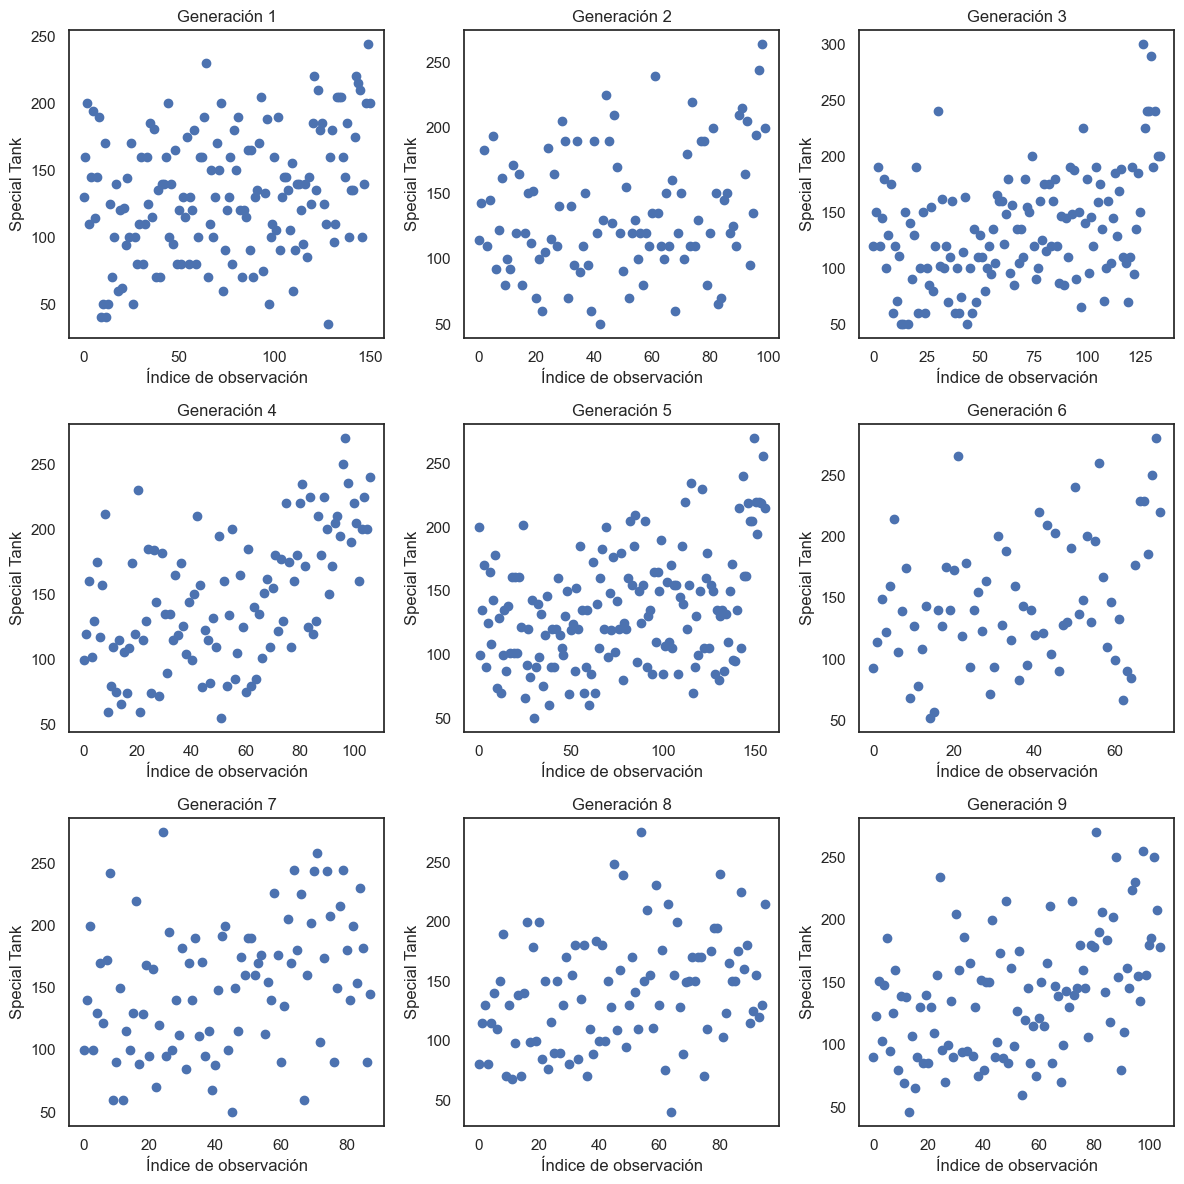

In [63]:
# No podemos rechazar Ho, por lo que podemos asumir que las varianzas son homogéneas. Veamos el tercer paso:

# Creamos un gráfico de dispersión para verificar la independencia de las muestras:
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
axs = axs.ravel()
for i, gen_sp_tank in enumerate([gen1_sp_tank, gen2_sp_tank, gen3_sp_tank, gen4_sp_tank, gen5_sp_tank,
                     gen6_sp_tank, gen7_sp_tank, gen8_sp_tank, gen9_sp_tank]):
    axs[i].scatter(range(len(gen_sp_tank)), gen_sp_tank)
    axs[i].set_title(f"Generación {i+1}")
    axs[i].set_xlabel("Índice de observación")
    axs[i].set_ylabel("Special Tank")
fig.tight_layout()
plt.show()

In [64]:
# No vemos patrones en esta variable tampoco, vamos a normalizar y a pasar la f_oneway posteriormente:

gen1_sp_tank_norm = StandardScaler().fit_transform(gen1_sp_tank.values.reshape(-1, 1))
gen2_sp_tank_norm = StandardScaler().fit_transform(gen2_sp_tank.values.reshape(-1, 1))
gen3_sp_tank_norm = StandardScaler().fit_transform(gen3_sp_tank.values.reshape(-1, 1))
gen4_sp_tank_norm = StandardScaler().fit_transform(gen4_sp_tank.values.reshape(-1, 1))
gen5_sp_tank_norm = StandardScaler().fit_transform(gen5_sp_tank.values.reshape(-1, 1))
gen6_sp_tank_norm = StandardScaler().fit_transform(gen6_sp_tank.values.reshape(-1, 1))
gen7_sp_tank_norm = StandardScaler().fit_transform(gen7_sp_tank.values.reshape(-1, 1))
gen8_sp_tank_norm = StandardScaler().fit_transform(gen8_sp_tank.values.reshape(-1, 1))
gen9_sp_tank_norm = StandardScaler().fit_transform(gen9_sp_tank.values.reshape(-1, 1))

f_value, p_value = f_oneway(gen1_sp_tank_norm, gen2_sp_tank_norm, gen3_sp_tank_norm, gen4_sp_tank_norm, gen5_sp_tank_norm, 
                            gen6_sp_tank_norm, gen7_sp_tank_norm, gen8_sp_tank_norm, gen9_sp_tank_norm)

if p_value < 0.05:
    print("Hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional")
else:
    print("No hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional")

No hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional


Vamos con el bloque **PESO Y ALTURA**

In [65]:
# weight:

# Normalidad:

# Extraemos los datos de weight de cada generación:
gen1_weight = pokenova[pokenova["generation"] == 1]["weight"]
gen2_weight = pokenova[pokenova["generation"] == 2]["weight"]
gen3_weight = pokenova[pokenova["generation"] == 3]["weight"]
gen4_weight = pokenova[pokenova["generation"] == 4]["weight"]
gen5_weight = pokenova[pokenova["generation"] == 5]["weight"]
gen6_weight = pokenova[pokenova["generation"] == 6]["weight"]
gen7_weight = pokenova[pokenova["generation"] == 7]["weight"]
gen8_weight = pokenova[pokenova["generation"] == 8]["weight"]
gen9_weight = pokenova[pokenova["generation"] == 9]["weight"]

# Realizamos el test de Shapiro-Wilk para cada muestra:
shapiro_gen1 = shapiro(gen1_weight)
shapiro_gen2 = shapiro(gen2_weight)
shapiro_gen3 = shapiro(gen3_weight)
shapiro_gen4 = shapiro(gen4_weight)
shapiro_gen5 = shapiro(gen5_weight)
shapiro_gen6 = shapiro(gen6_weight)
shapiro_gen7 = shapiro(gen7_weight)
shapiro_gen8 = shapiro(gen8_weight)
shapiro_gen9 = shapiro(gen9_weight)

# Imprimimos los resultados:
print("Test de Shapiro-Wilk para cada muestra:")
print(f"Generación 1: statistic={shapiro_gen1.statistic:.3f}, p-value={shapiro_gen1.pvalue:.3f}")
print(f"Generación 2: statistic={shapiro_gen2.statistic:.3f}, p-value={shapiro_gen2.pvalue:.3f}")
print(f"Generación 3: statistic={shapiro_gen3.statistic:.3f}, p-value={shapiro_gen3.pvalue:.3f}")
print(f"Generación 4: statistic={shapiro_gen4.statistic:.3f}, p-value={shapiro_gen4.pvalue:.3f}")
print(f"Generación 5: statistic={shapiro_gen5.statistic:.3f}, p-value={shapiro_gen5.pvalue:.3f}")
print(f"Generación 6: statistic={shapiro_gen6.statistic:.3f}, p-value={shapiro_gen6.pvalue:.3f}")
print(f"Generación 7: statistic={shapiro_gen7.statistic:.3f}, p-value={shapiro_gen7.pvalue:.3f}")
print(f"Generación 8: statistic={shapiro_gen8.statistic:.3f}, p-value={shapiro_gen8.pvalue:.3f}")
print(f"Generación 9: statistic={shapiro_gen9.statistic:.3f}, p-value={shapiro_gen9.pvalue:.3f}")

# Si el p-valor es menor que el nivel de significatividad (por ejemplo, 0.05), entonces se puede rechazar la hipótesis nula
# de que los datos siguen una distribución normal.

Test de Shapiro-Wilk para cada muestra:
Generación 1: statistic=0.655, p-value=0.000
Generación 2: statistic=0.701, p-value=0.000
Generación 3: statistic=0.538, p-value=0.000
Generación 4: statistic=0.589, p-value=0.000
Generación 5: statistic=0.673, p-value=0.000
Generación 6: statistic=0.604, p-value=0.000
Generación 7: statistic=0.497, p-value=0.000
Generación 8: statistic=0.507, p-value=0.000
Generación 9: statistic=0.649, p-value=0.000


In [66]:
# En caso de que el supuesto 2 y 3 se cumplan, nos tocará de nuevo normalizar. Vamos con Levene ahora:

levene_test = levene(gen1_weight, gen2_weight, gen3_weight, gen4_weight, gen5_weight,
                     gen6_weight, gen7_weight, gen8_weight, gen9_weight)
print("Test de Levene para verificar la homogeneidad de varianzas:")
print(f"Statistic={levene_test.statistic:.3f}, p-value={levene_test.pvalue:.3f}")

# Si el p-valor es menor que el nivel de significación, se puede rechazar la hipótesis nula de que las varianzas son
# iguales.

Test de Levene para verificar la homogeneidad de varianzas:
Statistic=3.840, p-value=0.000


In [67]:
# No seguimos, no se cumplen ni el supuesto 1 ni el 2; vamos directamente a ver qué sucede con Kruskal-Wallis:

# Extraemos los datos de weight de cada generación:
gen1_weight = pokenova[pokenova["generation"] == 1]["weight"]
gen2_weight = pokenova[pokenova["generation"] == 2]["weight"]
gen3_weight = pokenova[pokenova["generation"] == 3]["weight"]
gen4_weight = pokenova[pokenova["generation"] == 4]["weight"]
gen5_weight = pokenova[pokenova["generation"] == 5]["weight"]
gen6_weight = pokenova[pokenova["generation"] == 6]["weight"]
gen7_weight = pokenova[pokenova["generation"] == 7]["weight"]
gen8_weight = pokenova[pokenova["generation"] == 8]["weight"]
gen9_weight = pokenova[pokenova["generation"] == 9]["weight"]

# Realizamos la prueba de Kruskal-Wallis:
h_value, p_value = kruskal(gen1_weight, gen2_weight, gen3_weight, gen4_weight, gen5_weight, gen6_weight, 
                           gen7_weight, gen8_weight, gen9_weight)

# Imprimimos el resultado
if p_value < 0.05:
    print("Hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional")
else:
    print("No hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional")

No hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional


In [68]:
# height:

# Normalidad:

# Extraemos los datos de height de cada generación:
gen1_height = pokenova[pokenova["generation"] == 1]["height"]
gen2_height = pokenova[pokenova["generation"] == 2]["height"]
gen3_height = pokenova[pokenova["generation"] == 3]["height"]
gen4_height = pokenova[pokenova["generation"] == 4]["height"]
gen5_height = pokenova[pokenova["generation"] == 5]["height"]
gen6_height = pokenova[pokenova["generation"] == 6]["height"]
gen7_height = pokenova[pokenova["generation"] == 7]["height"]
gen8_height = pokenova[pokenova["generation"] == 8]["height"]
gen9_height = pokenova[pokenova["generation"] == 9]["height"]

# Realizamos el test de Shapiro-Wilk para cada muestra:
shapiro_gen1 = shapiro(gen1_height)
shapiro_gen2 = shapiro(gen2_height)
shapiro_gen3 = shapiro(gen3_height)
shapiro_gen4 = shapiro(gen4_height)
shapiro_gen5 = shapiro(gen5_height)
shapiro_gen6 = shapiro(gen6_height)
shapiro_gen7 = shapiro(gen7_height)
shapiro_gen8 = shapiro(gen8_height)
shapiro_gen9 = shapiro(gen9_height)

# Imprimimos los resultados:
print("Test de Shapiro-Wilk para cada muestra:")
print(f"Generación 1: statistic={shapiro_gen1.statistic:.3f}, p-value={shapiro_gen1.pvalue:.3f}")
print(f"Generación 2: statistic={shapiro_gen2.statistic:.3f}, p-value={shapiro_gen2.pvalue:.3f}")
print(f"Generación 3: statistic={shapiro_gen3.statistic:.3f}, p-value={shapiro_gen3.pvalue:.3f}")
print(f"Generación 4: statistic={shapiro_gen4.statistic:.3f}, p-value={shapiro_gen4.pvalue:.3f}")
print(f"Generación 5: statistic={shapiro_gen5.statistic:.3f}, p-value={shapiro_gen5.pvalue:.3f}")
print(f"Generación 6: statistic={shapiro_gen6.statistic:.3f}, p-value={shapiro_gen6.pvalue:.3f}")
print(f"Generación 7: statistic={shapiro_gen7.statistic:.3f}, p-value={shapiro_gen7.pvalue:.3f}")
print(f"Generación 8: statistic={shapiro_gen8.statistic:.3f}, p-value={shapiro_gen8.pvalue:.3f}")
print(f"Generación 9: statistic={shapiro_gen9.statistic:.3f}, p-value={shapiro_gen9.pvalue:.3f}")

# Si el p-valor es menor que el nivel de significatividad (por ejemplo, 0.05), entonces se puede rechazar la hipótesis nula
# de que los datos siguen una distribución normal.

Test de Shapiro-Wilk para cada muestra:
Generación 1: statistic=0.618, p-value=0.000
Generación 2: statistic=0.576, p-value=0.000
Generación 3: statistic=0.454, p-value=0.000
Generación 4: statistic=0.792, p-value=0.000
Generación 5: statistic=0.900, p-value=0.000
Generación 6: statistic=0.735, p-value=0.000
Generación 7: statistic=0.735, p-value=0.000
Generación 8: statistic=0.405, p-value=0.000
Generación 9: statistic=0.607, p-value=0.000


In [69]:
# En caso de que el supuesto 2 y 3 se cumplan, nos tocará de nuevo normalizar. Vamos con Levene ahora:

levene_test = levene(gen1_height, gen2_height, gen3_height, gen4_height, gen5_height,
                     gen6_height, gen7_height, gen8_height, gen9_height)
print("Test de Levene para verificar la homogeneidad de varianzas:")
print(f"Statistic={levene_test.statistic:.3f}, p-value={levene_test.pvalue:.3f}")

# Si el p-valor es menor que el nivel de significación, se puede rechazar la hipótesis nula de que las varianzas son
# iguales.

Test de Levene para verificar la homogeneidad de varianzas:
Statistic=2.462, p-value=0.012


In [70]:
# No seguimos, no se cumplen ni el supuesto 1 ni el 2; vamos directamente a ver qué sucede con Kruskal-Wallis:

# Extraemos los datos de weight de cada generación:
gen1_height = pokenova[pokenova["generation"] == 1]["height"]
gen2_height = pokenova[pokenova["generation"] == 2]["height"]
gen3_height = pokenova[pokenova["generation"] == 3]["height"]
gen4_height = pokenova[pokenova["generation"] == 4]["height"]
gen5_height = pokenova[pokenova["generation"] == 5]["height"]
gen6_height = pokenova[pokenova["generation"] == 6]["height"]
gen7_height = pokenova[pokenova["generation"] == 7]["height"]
gen8_height = pokenova[pokenova["generation"] == 8]["height"]
gen9_height = pokenova[pokenova["generation"] == 9]["height"]

# Realizamos la prueba de Kruskal-Wallis:
h_value, p_value = kruskal(gen1_height, gen2_height, gen3_height, gen4_height, gen5_height, gen6_height, 
                           gen7_height, gen8_height, gen9_height)

# Imprimimos el resultado
if p_value < 0.05:
    print("Hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional")
else:
    print("No hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional")

No hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional


Entre hatch y steps, sólo estudiaremos hatch, ya que steps son los mismos valores multiplicados por 256 y ya vimos arriba que la correlación entre ambas variables era de 1 (hay colinealidad). Vamos, pues, con el bloque **HATCH, CAPT_RATE, BASE_HAPP Y BASE_EXP**.

In [71]:
# hatch:

# Normalidad:

# Extraemos los datos de hatch de cada generación:
gen1_hatch = pokenova[pokenova["generation"] == 1]["hatch"]
gen2_hatch = pokenova[pokenova["generation"] == 2]["hatch"]
gen3_hatch = pokenova[pokenova["generation"] == 3]["hatch"]
gen4_hatch = pokenova[pokenova["generation"] == 4]["hatch"]
gen5_hatch = pokenova[pokenova["generation"] == 5]["hatch"]
gen6_hatch = pokenova[pokenova["generation"] == 6]["hatch"]
gen7_hatch = pokenova[pokenova["generation"] == 7]["hatch"]
gen8_hatch = pokenova[pokenova["generation"] == 8]["hatch"]
gen9_hatch = pokenova[pokenova["generation"] == 9]["hatch"]

# Realizamos el test de Shapiro-Wilk para cada muestra:
shapiro_gen1 = shapiro(gen1_hatch)
shapiro_gen2 = shapiro(gen2_hatch)
shapiro_gen3 = shapiro(gen3_hatch)
shapiro_gen4 = shapiro(gen4_hatch)
shapiro_gen5 = shapiro(gen5_hatch)
shapiro_gen6 = shapiro(gen6_hatch)
shapiro_gen7 = shapiro(gen7_hatch)
shapiro_gen8 = shapiro(gen8_hatch)
shapiro_gen9 = shapiro(gen9_hatch)

# Imprimimos los resultados:
print("Test de Shapiro-Wilk para cada muestra:")
print(f"Generación 1: statistic={shapiro_gen1.statistic:.3f}, p-value={shapiro_gen1.pvalue:.3f}")
print(f"Generación 2: statistic={shapiro_gen2.statistic:.3f}, p-value={shapiro_gen2.pvalue:.3f}")
print(f"Generación 3: statistic={shapiro_gen3.statistic:.3f}, p-value={shapiro_gen3.pvalue:.3f}")
print(f"Generación 4: statistic={shapiro_gen4.statistic:.3f}, p-value={shapiro_gen4.pvalue:.3f}")
print(f"Generación 5: statistic={shapiro_gen5.statistic:.3f}, p-value={shapiro_gen5.pvalue:.3f}")
print(f"Generación 6: statistic={shapiro_gen6.statistic:.3f}, p-value={shapiro_gen6.pvalue:.3f}")
print(f"Generación 7: statistic={shapiro_gen7.statistic:.3f}, p-value={shapiro_gen7.pvalue:.3f}")
print(f"Generación 8: statistic={shapiro_gen8.statistic:.3f}, p-value={shapiro_gen8.pvalue:.3f}")
print(f"Generación 9: statistic={shapiro_gen9.statistic:.3f}, p-value={shapiro_gen9.pvalue:.3f}")

# Si el p-valor es menor que el nivel de significatividad (por ejemplo, 0.05), entonces se puede rechazar la hipótesis nula
# de que los datos siguen una distribución normal.

Test de Shapiro-Wilk para cada muestra:
Generación 1: statistic=0.465, p-value=0.000
Generación 2: statistic=0.474, p-value=0.000
Generación 3: statistic=0.492, p-value=0.000
Generación 4: statistic=0.542, p-value=0.000
Generación 5: statistic=0.472, p-value=0.000
Generación 6: statistic=0.420, p-value=0.000
Generación 7: statistic=0.609, p-value=0.000
Generación 8: statistic=0.526, p-value=0.000
Generación 9: statistic=0.764, p-value=0.000


In [72]:
# En caso de que el supuesto 2 y 3 se cumplan, nos tocará de nuevo normalizar. Vamos con Levene ahora:

levene_test = levene(gen1_hatch, gen2_hatch, gen3_hatch, gen4_hatch, gen5_hatch,
                     gen6_hatch, gen7_hatch, gen8_hatch, gen9_hatch)
print("Test de Levene para verificar la homogeneidad de varianzas:")
print(f"Statistic={levene_test.statistic:.3f}, p-value={levene_test.pvalue:.3f}")

# Si el p-valor es menor que el nivel de significación, se puede rechazar la hipótesis nula de que las varianzas son
# iguales.

Test de Levene para verificar la homogeneidad de varianzas:
Statistic=7.133, p-value=0.000


In [73]:
# No seguimos, no se cumplen ni el supuesto 1 ni el 2; vamos directamente a ver qué sucede con Kruskal-Wallis:

# Extraemos los datos de weight de cada generación:
gen1_hatch = pokenova[pokenova["generation"] == 1]["hatch"]
gen2_hatch = pokenova[pokenova["generation"] == 2]["hatch"]
gen3_hatch = pokenova[pokenova["generation"] == 3]["hatch"]
gen4_hatch = pokenova[pokenova["generation"] == 4]["hatch"]
gen5_hatch = pokenova[pokenova["generation"] == 5]["hatch"]
gen6_hatch = pokenova[pokenova["generation"] == 6]["hatch"]
gen7_hatch = pokenova[pokenova["generation"] == 7]["hatch"]
gen8_hatch = pokenova[pokenova["generation"] == 8]["hatch"]
gen9_hatch = pokenova[pokenova["generation"] == 9]["hatch"]

# Realizamos la prueba de Kruskal-Wallis:
h_value, p_value = kruskal(gen1_hatch, gen2_hatch, gen3_hatch, gen4_hatch, gen5_hatch,
                           gen6_hatch, gen7_hatch, gen8_hatch, gen9_hatch)

# Imprimimos el resultado
if p_value < 0.05:
    print("Hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional")
else:
    print("No hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional")

Hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional


Para las variables en las que exista diferencia significativa al hacer Kruskal-Wallis, vamos a realizar una prueba post hoc llamada prueba de Tukey. Esta prueba se utiliza para comparar las medias cuando se asume que los datos se distribuyen normalmente y los tamaños de muestra son iguales. Sin embargo, **la prueba de Tukey también se puede utilizar cuando no se cumplen estas condiciones, siempre y cuando el tamaño de la muestra sea grande y las distribuciones de las muestras no sean demasiado sesgadas o demasiado diferentes entre sí** (asumimos esto último, para ver de forma dos a dos entre qué generaciones hay diferencias significativas.

In [74]:
# Creamos una lista con los datos de cada generación
datos = [gen1_hatch, gen2_hatch, gen3_hatch, gen4_hatch, gen5_hatch,
         gen6_hatch, gen7_hatch, gen8_hatch, gen9_hatch]

# Realizamos la prueba de Kruskal-Wallis
h_value, p_value = kruskal(*datos)

# Realizamos la prueba de Tukey
tukey = pairwise_tukeyhsd(endog=np.concatenate(datos), groups=np.concatenate([[i]*len(gen) for i,gen in enumerate(datos)]))

# Imprimimos los resultados
print("Resultado de la prueba de Kruskal-Wallis:")
print("H-value: ", h_value)
print("p-value: ", p_value)

print("\nResultado de la prueba de Tukey:")
print(tukey.summary())
# A group1 y group2 hay que sumarle 1 para que nos dé la generación.

# Vemos que hay diferencias significativas en cuanto a los ciclos necesarios para eclosionar un poke entre estas gen:
# 1-7 / 1-8 / 2-7 / 3-7 / 4-7 / 5-7 / 6-7 / 7/9

Resultado de la prueba de Kruskal-Wallis:
H-value:  21.32559351409942
p-value:  0.006331008804820397

Resultado de la prueba de Tukey:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     0      1   2.3212 0.9989  -8.1647 12.8071  False
     0      2   4.3767 0.8932  -5.2568 14.0103  False
     0      3   7.6623 0.3324  -2.6152 17.9398  False
     0      4   5.0584 0.7506  -4.2265 14.3433  False
     0      5   4.9462 0.9254  -6.7019 16.5943  False
     0      6  21.8212    0.0  10.9136 32.7288   True
     0      7  10.8837 0.0395   0.2672 21.5002   True
     0      8   5.6307 0.7505  -4.7039 15.9654  False
     1      2   2.0556 0.9996  -8.6751 12.7862  False
     1      3   5.3411 0.8703  -5.9712 16.6534  False
     1      4   2.7372 0.9964  -7.6816 13.1559  False
     1      5    2.625 0.9993  -9.9456 15.1956  False
     1      6     19.5    0.0   7.6123 31.3877   True
 

In [75]:
# capt_rate:

# Normalidad:

# Extraemos los datos de capt_rate de cada generación:
gen1_capt_rate = pokenova[pokenova["generation"] == 1]["capt_rate"]
gen2_capt_rate = pokenova[pokenova["generation"] == 2]["capt_rate"]
gen3_capt_rate = pokenova[pokenova["generation"] == 3]["capt_rate"]
gen4_capt_rate = pokenova[pokenova["generation"] == 4]["capt_rate"]
gen5_capt_rate = pokenova[pokenova["generation"] == 5]["capt_rate"]
gen6_capt_rate = pokenova[pokenova["generation"] == 6]["capt_rate"]
gen7_capt_rate = pokenova[pokenova["generation"] == 7]["capt_rate"]
gen8_capt_rate = pokenova[pokenova["generation"] == 8]["capt_rate"]
gen9_capt_rate = pokenova[pokenova["generation"] == 9]["capt_rate"]

# Realizamos el test de Shapiro-Wilk para cada muestra:
shapiro_gen1 = shapiro(gen1_capt_rate)
shapiro_gen2 = shapiro(gen2_capt_rate)
shapiro_gen3 = shapiro(gen3_capt_rate)
shapiro_gen4 = shapiro(gen4_capt_rate)
shapiro_gen5 = shapiro(gen5_capt_rate)
shapiro_gen6 = shapiro(gen6_capt_rate)
shapiro_gen7 = shapiro(gen7_capt_rate)
shapiro_gen8 = shapiro(gen8_capt_rate)
shapiro_gen9 = shapiro(gen9_capt_rate)

# Imprimimos los resultados:
print("Test de Shapiro-Wilk para cada muestra:")
print(f"Generación 1: statistic={shapiro_gen1.statistic:.3f}, p-value={shapiro_gen1.pvalue:.3f}")
print(f"Generación 2: statistic={shapiro_gen2.statistic:.3f}, p-value={shapiro_gen2.pvalue:.3f}")
print(f"Generación 3: statistic={shapiro_gen3.statistic:.3f}, p-value={shapiro_gen3.pvalue:.3f}")
print(f"Generación 4: statistic={shapiro_gen4.statistic:.3f}, p-value={shapiro_gen4.pvalue:.3f}")
print(f"Generación 5: statistic={shapiro_gen5.statistic:.3f}, p-value={shapiro_gen5.pvalue:.3f}")
print(f"Generación 6: statistic={shapiro_gen6.statistic:.3f}, p-value={shapiro_gen6.pvalue:.3f}")
print(f"Generación 7: statistic={shapiro_gen7.statistic:.3f}, p-value={shapiro_gen7.pvalue:.3f}")
print(f"Generación 8: statistic={shapiro_gen8.statistic:.3f}, p-value={shapiro_gen8.pvalue:.3f}")
print(f"Generación 9: statistic={shapiro_gen9.statistic:.3f}, p-value={shapiro_gen9.pvalue:.3f}")

# Si el p-valor es menor que el nivel de significatividad (por ejemplo, 0.05), entonces se puede rechazar la hipótesis nula
# de que los datos siguen una distribución normal.

Test de Shapiro-Wilk para cada muestra:
Generación 1: statistic=0.822, p-value=0.000
Generación 2: statistic=0.817, p-value=0.000
Generación 3: statistic=0.874, p-value=0.000
Generación 4: statistic=0.815, p-value=0.000
Generación 5: statistic=0.873, p-value=0.000
Generación 6: statistic=0.851, p-value=0.000
Generación 7: statistic=0.801, p-value=0.000
Generación 8: statistic=0.838, p-value=0.000
Generación 9: statistic=0.854, p-value=0.000


In [76]:
# En caso de que el supuesto 2 y 3 se cumplan, nos tocará de nuevo normalizar. Vamos con Levene ahora:

levene_test = levene(gen1_capt_rate, gen2_capt_rate, gen3_capt_rate, gen4_capt_rate, gen5_capt_rate,
                     gen6_capt_rate, gen7_capt_rate, gen8_capt_rate, gen9_capt_rate)
print("Test de Levene para verificar la homogeneidad de varianzas:")
print(f"Statistic={levene_test.statistic:.3f}, p-value={levene_test.pvalue:.3f}")

# Si el p-valor es menor que el nivel de significación, se puede rechazar la hipótesis nula de que las varianzas son
# iguales.

Test de Levene para verificar la homogeneidad de varianzas:
Statistic=2.370, p-value=0.016


In [77]:
# No seguimos, no se cumplen ni el supuesto 1 ni el 2; vamos directamente a ver qué sucede con Kruskal-Wallis:

# Extraemos los datos de weight de cada generación:
gen1_capt_rate = pokenova[pokenova["generation"] == 1]["capt_rate"]
gen2_capt_rate = pokenova[pokenova["generation"] == 2]["capt_rate"]
gen3_capt_rate = pokenova[pokenova["generation"] == 3]["capt_rate"]
gen4_capt_rate = pokenova[pokenova["generation"] == 4]["capt_rate"]
gen5_capt_rate = pokenova[pokenova["generation"] == 5]["capt_rate"]
gen6_capt_rate = pokenova[pokenova["generation"] == 6]["capt_rate"]
gen7_capt_rate = pokenova[pokenova["generation"] == 7]["capt_rate"]
gen8_capt_rate = pokenova[pokenova["generation"] == 8]["capt_rate"]
gen9_capt_rate = pokenova[pokenova["generation"] == 9]["capt_rate"]

# Realizamos la prueba de Kruskal-Wallis:
h_value, p_value = kruskal(gen1_capt_rate, gen2_capt_rate, gen3_capt_rate, gen4_capt_rate, gen5_capt_rate,
                     gen6_capt_rate, gen7_capt_rate, gen8_capt_rate, gen9_capt_rate)

# Imprimimos el resultado
if p_value < 0.05:
    print("Hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional")
else:
    print("No hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional")

Hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional


In [78]:
# Creamos una lista con los datos de cada generación
datos = [gen1_capt_rate, gen2_capt_rate, gen3_capt_rate, gen4_capt_rate, gen5_capt_rate,
         gen6_capt_rate, gen7_capt_rate, gen8_capt_rate, gen9_capt_rate]

# Realizamos la prueba de Kruskal-Wallis
h_value, p_value = kruskal(*datos)

# Realizamos la prueba de Tukey
tukey = pairwise_tukeyhsd(endog=np.concatenate(datos), groups=np.concatenate([[i]*len(gen) for i,gen in enumerate(datos)]))

# Imprimimos los resultados
print("Resultado de la prueba de Kruskal-Wallis:")
print("H-value: ", h_value)
print("p-value: ", p_value)

print("\nResultado de la prueba de Tukey:")
print(tukey.summary())
# A group1 y group2 hay que sumarle 1 para que nos dé la generación.

# Vemos que hay diferencias significativas en cuanto a los ciclos necesarios para eclosionar un poke entre estas gen:
# 3-4 / 3-7

Resultado de la prueba de Kruskal-Wallis:
H-value:  29.082057410326428
p-value:  0.0003067532868660304

Resultado de la prueba de Tukey:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     0      1 -14.2854 0.8673 -44.4012 15.8303  False
     0      2   7.1701 0.9967 -20.4976 34.8378  False
     0      3 -27.3256 0.0953 -56.8428  2.1916  False
     0      4  -3.0829    1.0 -29.7492 23.5835  False
     0      5  -5.7827 0.9998 -39.2363  27.671  False
     0      6 -28.4582 0.1097 -59.7848  2.8685  False
     0      7  -8.3625 0.9951 -38.8534 22.1283  False
     0      8  -22.614 0.3026 -52.2952  7.0672  False
     1      2  21.4556 0.4302   -9.363 52.2741  False
     1      3 -13.0402 0.9456 -45.5294  19.449  False
     1      4  11.2026 0.9637 -18.7203 41.1254  False
     1      5   8.5028 0.9983 -27.6002 44.6058  False
     1      6 -14.1727 0.9342 -48.3142 19.9688  False

In [79]:
# base_happ:

# Normalidad:

# Extraemos los datos de base_happ de cada generación:
gen1_base_happ = pokenova[pokenova["generation"] == 1]["base_happ"]
gen2_base_happ = pokenova[pokenova["generation"] == 2]["base_happ"]
gen3_base_happ = pokenova[pokenova["generation"] == 3]["base_happ"]
gen4_base_happ = pokenova[pokenova["generation"] == 4]["base_happ"]
gen5_base_happ = pokenova[pokenova["generation"] == 5]["base_happ"]
gen6_base_happ = pokenova[pokenova["generation"] == 6]["base_happ"]
gen7_base_happ = pokenova[pokenova["generation"] == 7]["base_happ"]
gen8_base_happ = pokenova[pokenova["generation"] == 8]["base_happ"]
gen9_base_happ = pokenova[pokenova["generation"] == 9]["base_happ"]

# Realizamos el test de Shapiro-Wilk para cada muestra:
shapiro_gen1 = shapiro(gen1_base_happ)
shapiro_gen2 = shapiro(gen2_base_happ)
shapiro_gen3 = shapiro(gen3_base_happ)
shapiro_gen4 = shapiro(gen4_base_happ)
shapiro_gen5 = shapiro(gen5_base_happ)
shapiro_gen6 = shapiro(gen6_base_happ)
shapiro_gen7 = shapiro(gen7_base_happ)
shapiro_gen8 = shapiro(gen8_base_happ)
shapiro_gen9 = shapiro(gen9_base_happ)

# Imprimimos los resultados:
print("Test de Shapiro-Wilk para cada muestra:")
print(f"Generación 1: statistic={shapiro_gen1.statistic:.3f}, p-value={shapiro_gen1.pvalue:.3f}")
print(f"Generación 2: statistic={shapiro_gen2.statistic:.3f}, p-value={shapiro_gen2.pvalue:.3f}")
print(f"Generación 3: statistic={shapiro_gen3.statistic:.3f}, p-value={shapiro_gen3.pvalue:.3f}")
print(f"Generación 4: statistic={shapiro_gen4.statistic:.3f}, p-value={shapiro_gen4.pvalue:.3f}")
print(f"Generación 5: statistic={shapiro_gen5.statistic:.3f}, p-value={shapiro_gen5.pvalue:.3f}")
print(f"Generación 6: statistic={shapiro_gen6.statistic:.3f}, p-value={shapiro_gen6.pvalue:.3f}")
print(f"Generación 7: statistic={shapiro_gen7.statistic:.3f}, p-value={shapiro_gen7.pvalue:.3f}")
print(f"Generación 8: statistic={shapiro_gen8.statistic:.3f}, p-value={shapiro_gen8.pvalue:.3f}")
print(f"Generación 9: statistic={shapiro_gen9.statistic:.3f}, p-value={shapiro_gen9.pvalue:.3f}")

# Si el p-valor es menor que el nivel de significatividad (por ejemplo, 0.05), entonces se puede rechazar la hipótesis nula
# de que los datos siguen una distribución normal.

Test de Shapiro-Wilk para cada muestra:
Generación 1: statistic=0.579, p-value=0.000
Generación 2: statistic=0.779, p-value=0.000
Generación 3: statistic=0.855, p-value=0.000
Generación 4: statistic=0.845, p-value=0.000
Generación 5: statistic=0.768, p-value=0.000
Generación 6: statistic=0.750, p-value=0.000
Generación 7: statistic=0.702, p-value=0.000
Generación 8: statistic=0.468, p-value=0.000
Generación 9: statistic=0.546, p-value=0.000


In [80]:
# En caso de que el supuesto 2 y 3 se cumplan, nos tocará de nuevo normalizar. Vamos con Levene ahora:

levene_test = levene(gen1_base_happ, gen2_base_happ, gen3_base_happ, gen4_base_happ, gen5_base_happ,
                     gen6_base_happ, gen7_base_happ, gen8_base_happ, gen9_base_happ)
print("Test de Levene para verificar la homogeneidad de varianzas:")
print(f"Statistic={levene_test.statistic:.3f}, p-value={levene_test.pvalue:.3f}")

# Si el p-valor es menor que el nivel de significación, se puede rechazar la hipótesis nula de que las varianzas son
# iguales.

Test de Levene para verificar la homogeneidad de varianzas:
Statistic=6.619, p-value=0.000


In [81]:
# No seguimos, no se cumplen ni el supuesto 1 ni el 2; vamos directamente a ver qué sucede con Kruskal-Wallis:

# Extraemos los datos de weight de cada generación:
gen1_base_happ = pokenova[pokenova["generation"] == 1]["base_happ"]
gen2_base_happ = pokenova[pokenova["generation"] == 2]["base_happ"]
gen3_base_happ = pokenova[pokenova["generation"] == 3]["base_happ"]
gen4_base_happ = pokenova[pokenova["generation"] == 4]["base_happ"]
gen5_base_happ = pokenova[pokenova["generation"] == 5]["base_happ"]
gen6_base_happ = pokenova[pokenova["generation"] == 6]["base_happ"]
gen7_base_happ = pokenova[pokenova["generation"] == 7]["base_happ"]
gen8_base_happ = pokenova[pokenova["generation"] == 8]["base_happ"]
gen9_base_happ = pokenova[pokenova["generation"] == 9]["base_happ"]

# Realizamos la prueba de Kruskal-Wallis:
h_value, p_value = kruskal(gen1_base_happ, gen2_base_happ, gen3_base_happ, gen4_base_happ, gen5_base_happ,
                     gen6_base_happ, gen7_base_happ, gen8_base_happ, gen9_base_happ)

# Imprimimos el resultado
if p_value < 0.05:
    print("Hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional")
else:
    print("No hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional")

Hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional


In [82]:
# Creamos una lista con los datos de cada generación
datos = [gen1_base_happ, gen2_base_happ, gen3_base_happ, gen4_base_happ, gen5_base_happ,
         gen6_base_happ, gen7_base_happ, gen8_base_happ, gen9_base_happ]

# Realizamos la prueba de Kruskal-Wallis
h_value, p_value = kruskal(*datos)

# Realizamos la prueba de Tukey
tukey = pairwise_tukeyhsd(endog=np.concatenate(datos), groups=np.concatenate([[i]*len(gen) for i,gen in enumerate(datos)]))

# Imprimimos los resultados
print("Resultado de la prueba de Kruskal-Wallis:")
print("H-value: ", h_value)
print("p-value: ", p_value)

print("\nResultado de la prueba de Tukey:")
print(tukey.summary())
# A group1 y group2 hay que sumarle 1 para que nos dé la generación.

# Vemos que hay diferencias significativas en cuanto a los ciclos necesarios para eclosionar un poke entre estas gen:
# 1-7 / 1-9 / 2-7 / 2-9 / 3-7 / 3-9 / 4-7 / 4-8 / 4-9 / 5-7 / 5-9 / 6-7 / 6-9 / 7-8 / 8-9

Resultado de la prueba de Kruskal-Wallis:
H-value:  91.94183282292092
p-value:  1.8750766727099273e-16

Resultado de la prueba de Tukey:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     0      1   1.8046 0.9984  -5.9154   9.5247  False
     0      2  -2.4731 0.9765  -9.5656   4.6194  False
     0      3   4.1177 0.7517  -3.4489  11.6843  False
     0      4  -2.9069 0.9248  -9.7427   3.9289  False
     0      5  -1.4593 0.9998  -10.035   7.1164  False
     0      6 -16.2635    0.0  -24.294  -8.2331   True
     0      7  -6.2683 0.2365 -14.0845   1.5479  False
     0      8 -17.5049    0.0 -25.1136  -9.8962   True
     1      2  -4.2778 0.7569  -12.178   3.6224  False
     1      3   2.3131 0.9947  -6.0154  10.6416  False
     1      4  -4.7115 0.6074 -12.3821   2.9591  False
     1      5  -3.2639 0.9748 -12.5187    5.991  False
     1      6 -18.0682    0.0 -26.8202

In [83]:
# base_exp:

# Normalidad:

# Extraemos los datos de base_exp de cada generación:
gen1_base_exp = pokenova[pokenova["generation"] == 1]["base_exp"]
gen2_base_exp = pokenova[pokenova["generation"] == 2]["base_exp"]
gen3_base_exp = pokenova[pokenova["generation"] == 3]["base_exp"]
gen4_base_exp = pokenova[pokenova["generation"] == 4]["base_exp"]
gen5_base_exp = pokenova[pokenova["generation"] == 5]["base_exp"]
gen6_base_exp = pokenova[pokenova["generation"] == 6]["base_exp"]
gen7_base_exp = pokenova[pokenova["generation"] == 7]["base_exp"]
gen8_base_exp = pokenova[pokenova["generation"] == 8]["base_exp"]
gen9_base_exp = pokenova[pokenova["generation"] == 9]["base_exp"]

# Realizamos el test de Shapiro-Wilk para cada muestra:
shapiro_gen1 = shapiro(gen1_base_exp)
shapiro_gen2 = shapiro(gen2_base_exp)
shapiro_gen3 = shapiro(gen3_base_exp)
shapiro_gen4 = shapiro(gen4_base_exp)
shapiro_gen5 = shapiro(gen5_base_exp)
shapiro_gen6 = shapiro(gen6_base_exp)
shapiro_gen7 = shapiro(gen7_base_exp)
shapiro_gen8 = shapiro(gen8_base_exp)
shapiro_gen9 = shapiro(gen9_base_exp)

# Imprimimos los resultados:
print("Test de Shapiro-Wilk para cada muestra:")
print(f"Generación 1: statistic={shapiro_gen1.statistic:.3f}, p-value={shapiro_gen1.pvalue:.3f}")
print(f"Generación 2: statistic={shapiro_gen2.statistic:.3f}, p-value={shapiro_gen2.pvalue:.3f}")
print(f"Generación 3: statistic={shapiro_gen3.statistic:.3f}, p-value={shapiro_gen3.pvalue:.3f}")
print(f"Generación 4: statistic={shapiro_gen4.statistic:.3f}, p-value={shapiro_gen4.pvalue:.3f}")
print(f"Generación 5: statistic={shapiro_gen5.statistic:.3f}, p-value={shapiro_gen5.pvalue:.3f}")
print(f"Generación 6: statistic={shapiro_gen6.statistic:.3f}, p-value={shapiro_gen6.pvalue:.3f}")
print(f"Generación 7: statistic={shapiro_gen7.statistic:.3f}, p-value={shapiro_gen7.pvalue:.3f}")
print(f"Generación 8: statistic={shapiro_gen8.statistic:.3f}, p-value={shapiro_gen8.pvalue:.3f}")
print(f"Generación 9: statistic={shapiro_gen9.statistic:.3f}, p-value={shapiro_gen9.pvalue:.3f}")

# Si el p-valor es menor que el nivel de significatividad (por ejemplo, 0.05), entonces se puede rechazar la hipótesis nula
# de que los datos siguen una distribución normal.

Test de Shapiro-Wilk para cada muestra:
Generación 1: statistic=0.914, p-value=0.000
Generación 2: statistic=0.845, p-value=0.000
Generación 3: statistic=0.898, p-value=0.000
Generación 4: statistic=0.925, p-value=0.000
Generación 5: statistic=0.900, p-value=0.000
Generación 6: statistic=0.898, p-value=0.000
Generación 7: statistic=0.909, p-value=0.000
Generación 8: statistic=0.929, p-value=0.000
Generación 9: statistic=0.895, p-value=0.000


In [84]:
# En caso de que el supuesto 2 y 3 se cumplan, nos tocará de nuevo normalizar. Vamos con Levene ahora:

levene_test = levene(gen1_base_exp, gen2_base_exp, gen3_base_exp, gen4_base_exp, gen5_base_exp,
                     gen6_base_exp, gen7_base_exp, gen8_base_exp, gen9_base_exp)
print("Test de Levene para verificar la homogeneidad de varianzas:")
print(f"Statistic={levene_test.statistic:.3f}, p-value={levene_test.pvalue:.3f}")

# Si el p-valor es menor que el nivel de significación, se puede rechazar la hipótesis nula de que las varianzas son
# iguales.

Test de Levene para verificar la homogeneidad de varianzas:
Statistic=1.264, p-value=0.259


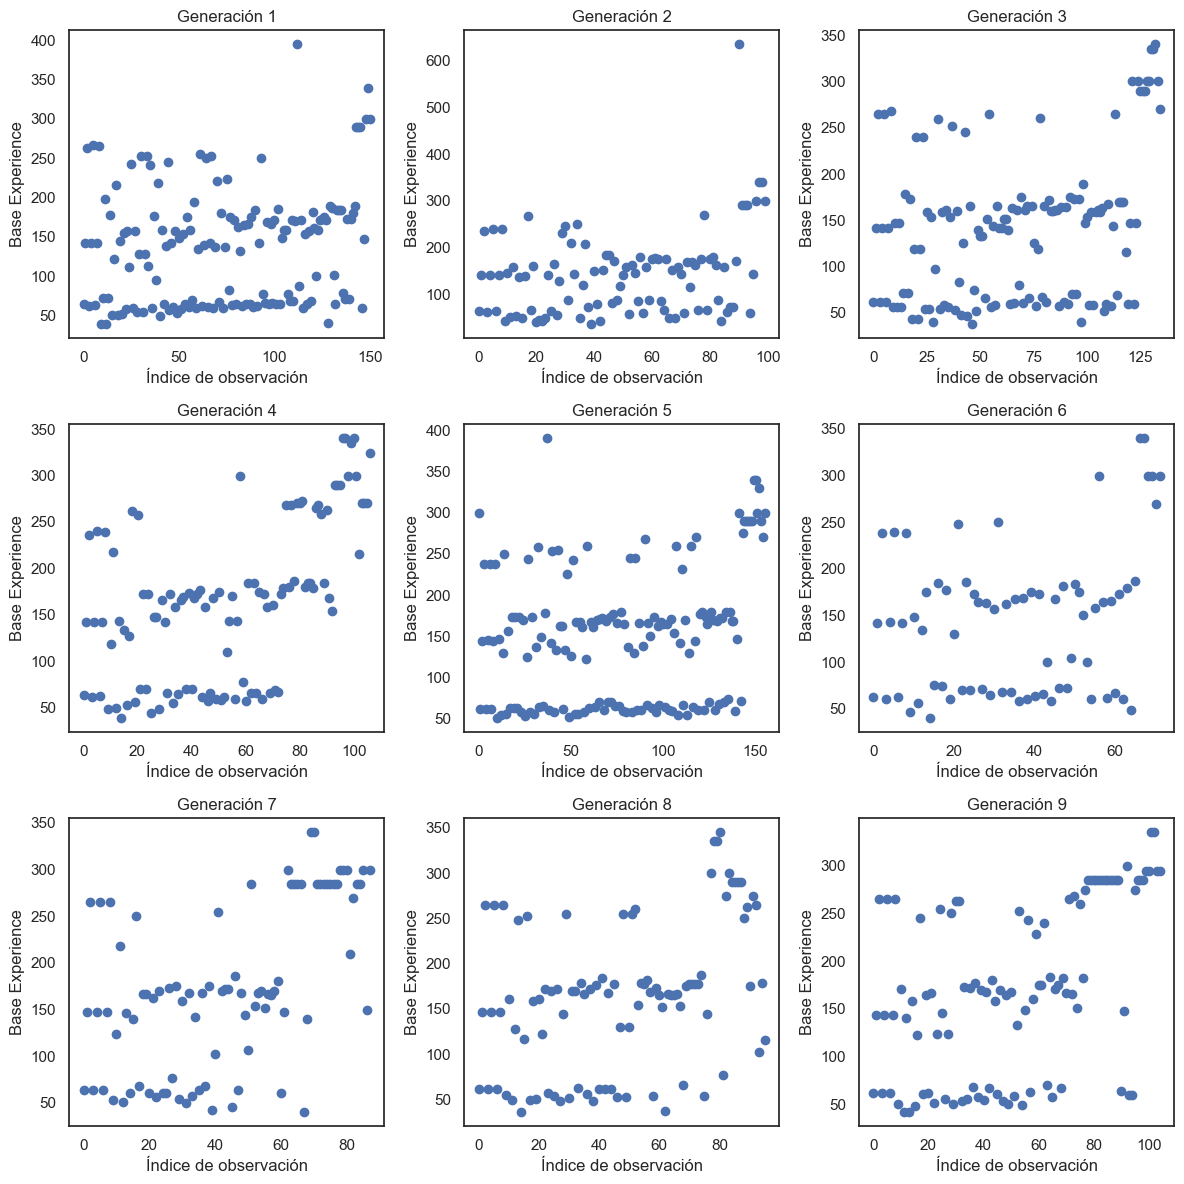

In [85]:
# No podemos rechazar Ho, por lo que podemos asumir que las varianzas son homogéneas. Veamos el tercer paso:

# Creamos un gráfico de dispersión para verificar la independencia de las muestras:
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
axs = axs.ravel()
for i, gen_base_exp in enumerate([gen1_base_exp, gen2_base_exp, gen3_base_exp, gen4_base_exp, gen5_base_exp,
                     gen6_base_exp, gen7_base_exp, gen8_base_exp, gen9_base_exp]):
    axs[i].scatter(range(len(gen_base_exp)), gen_base_exp)
    axs[i].set_title(f"Generación {i+1}")
    axs[i].set_xlabel("Índice de observación")
    axs[i].set_ylabel("Base Experience")
fig.tight_layout()
plt.show()

In [86]:
# Parece que se observan ciertos patrones en el supuesto 3; vamos directamente a ver qué sucede con Kruskal-Wallis:

# Extraemos los datos de weight de cada generación:
gen1_base_exp = pokenova[pokenova["generation"] == 1]["base_exp"]
gen2_base_exp = pokenova[pokenova["generation"] == 2]["base_exp"]
gen3_base_exp = pokenova[pokenova["generation"] == 3]["base_exp"]
gen4_base_exp = pokenova[pokenova["generation"] == 4]["base_exp"]
gen5_base_exp = pokenova[pokenova["generation"] == 5]["base_exp"]
gen6_base_exp = pokenova[pokenova["generation"] == 6]["base_exp"]
gen7_base_exp = pokenova[pokenova["generation"] == 7]["base_exp"]
gen8_base_exp = pokenova[pokenova["generation"] == 8]["base_exp"]
gen9_base_exp = pokenova[pokenova["generation"] == 9]["base_exp"]

# Realizamos la prueba de Kruskal-Wallis:
h_value, p_value = kruskal(gen1_base_exp, gen2_base_exp, gen3_base_exp, gen4_base_exp, gen5_base_exp,
                     gen6_base_exp, gen7_base_exp, gen8_base_exp, gen9_base_exp)

# Imprimimos el resultado
if p_value < 0.05:
    print("Hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional")
else:
    print("No hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional")

Hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional


In [87]:
# Creamos una lista con los datos de cada generación
datos = [gen1_base_exp, gen2_base_exp, gen3_base_exp, gen4_base_exp, gen5_base_exp, gen6_base_exp, gen7_base_exp, gen8_base_exp, gen9_base_exp]

# Realizamos la prueba de Kruskal-Wallis
h_value, p_value = kruskal(*datos)

# Realizamos la prueba de Tukey
tukey = pairwise_tukeyhsd(endog=np.concatenate(datos), groups=np.concatenate([[i]*len(gen) for i,gen in enumerate(datos)]))

# Imprimimos los resultados
print("Resultado de la prueba de Kruskal-Wallis:")
print("H-value: ", h_value)
print("p-value: ", p_value)

print("\nResultado de la prueba de Tukey:")
print(tukey.summary())
# A group1 y group2 hay que sumarle 1 para que nos dé la generación.

# Vemos que entre las generaciones 1 y 7 y 1 y 9 hay diferencias significativas en cuanto a la experiencia base.

Resultado de la prueba de Kruskal-Wallis:
H-value:  23.17014144257875
p-value:  0.0031525360499875315

Resultado de la prueba de Tukey:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     0      1   4.4771    1.0 -28.7956 37.7498  False
     0      2    3.163    1.0  -27.405  33.731  False
     0      3  25.8857 0.2492  -6.7257 58.4971  False
     0      4  11.9627 0.9419  -17.499 41.4244  False
     0      5   4.8815    1.0 -32.0789  41.842  False
     0      6  36.6189 0.0287   2.0083 71.2295   True
     0      7  23.1871 0.4467    -10.5 56.8742  False
     0      8  35.7038 0.0211   2.9111 68.4964   True
     1      2  -1.3141    1.0 -35.3632 32.7351  False
     1      3  21.4086 0.6457 -14.4863 57.3035  False
     1      4   7.4856 0.9987 -25.5739 40.5452  False
     1      5   0.4044    1.0 -39.4831  40.292  False
     1      6  32.1418  0.168  -5.5787 69.8623  False


Con exp_lvl100 no vamos a sacar nada, ya que está estrechamente relacionado con growth_rate, así que, con esta última columna, haremos ANOVA pasando un factor de conversión numérico al tratarse de una variable categórica. Ya hemos terminado con las variables numéricas, así que vamos a llevar a cabo un proceso parecido con las categóricas, pero con la misma finalidad: ver si existen diferencias significativas para esas variables entre generaciones.

No es necesario comprobar la normalidad de los datos en un ANOVA con variables categóricas, ya que no se asume una distribución normal. Tampoco es necesario comprobar la igualdad de varianzas, ya que cada categoría se trata como un grupo independiente. Sin embargo, sí es importante comprobar que las muestras sean independientes y que los datos no presenten valores extremos o atípicos que puedan afectar los resultados del análisis.

Sabiendo esto, vamos a hacer el paso 3 de los supuestos (subplots) y, si no se perciben patrones y hay independencia de las muestras, pasaremos la ANOVA de una vía (f_oneway) como hemos venido haciendo hasta ahora. En caso contrario, haremos Kruskal-Wallis.

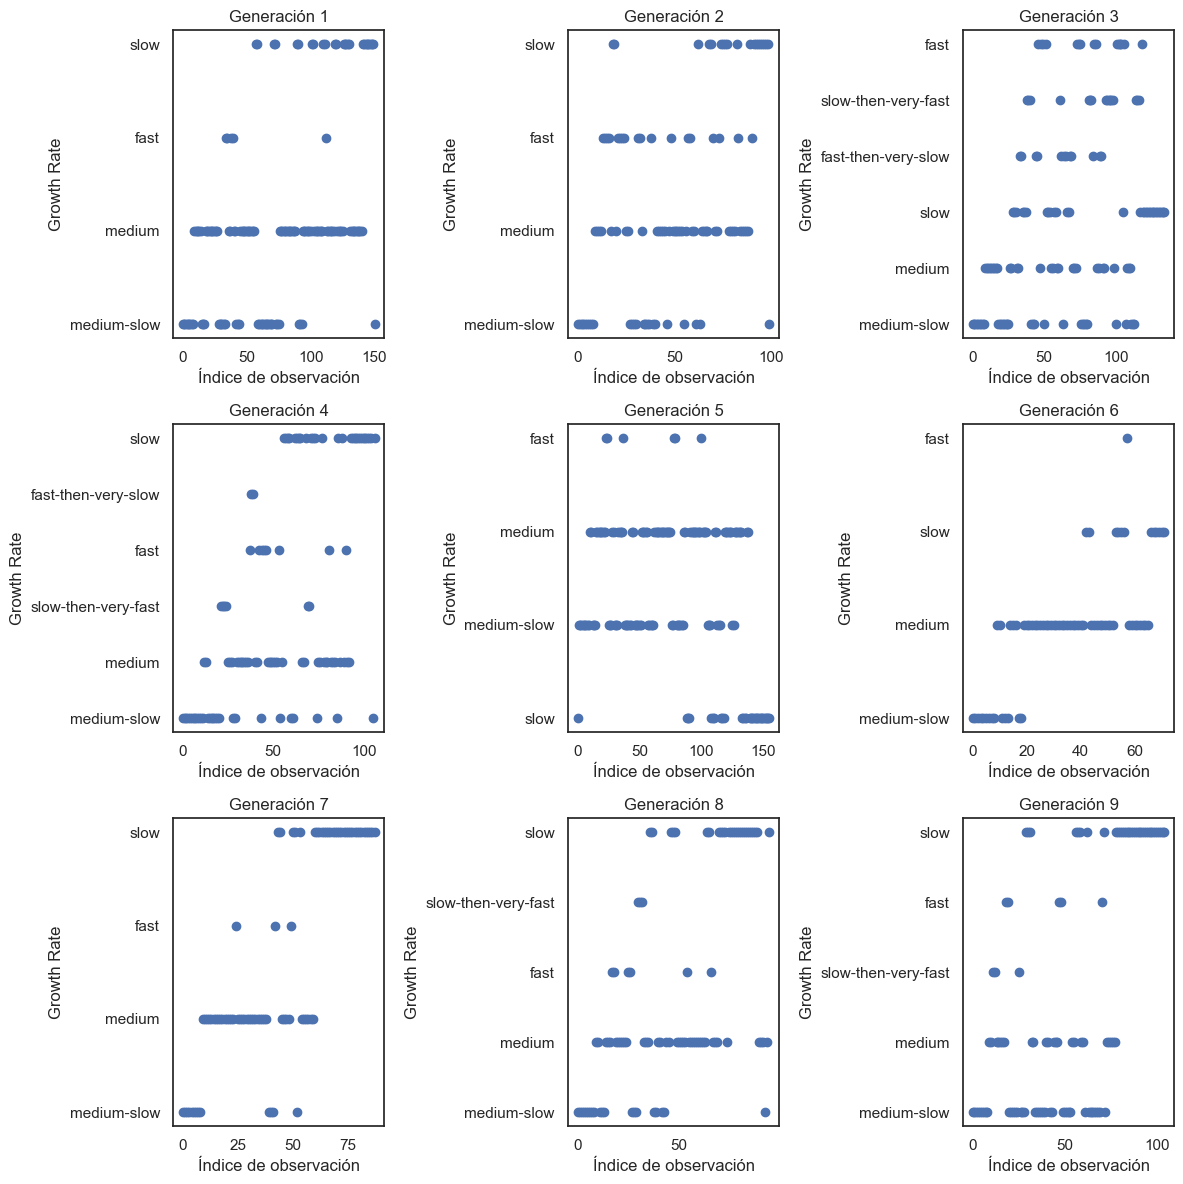

In [102]:
# Creamos un gráfico de dispersión para verificar la independencia de las muestras:
# Extraemos los datos de growth_rate de cada generación:
gen1_growth_rate = pokenova[pokenova["generation"] == 1]["growth_rate"]
gen2_growth_rate = pokenova[pokenova["generation"] == 2]["growth_rate"]
gen3_growth_rate = pokenova[pokenova["generation"] == 3]["growth_rate"]
gen4_growth_rate = pokenova[pokenova["generation"] == 4]["growth_rate"]
gen5_growth_rate = pokenova[pokenova["generation"] == 5]["growth_rate"]
gen6_growth_rate = pokenova[pokenova["generation"] == 6]["growth_rate"]
gen7_growth_rate = pokenova[pokenova["generation"] == 7]["growth_rate"]
gen8_growth_rate = pokenova[pokenova["generation"] == 8]["growth_rate"]
gen9_growth_rate = pokenova[pokenova["generation"] == 9]["growth_rate"]

fig, axs = plt.subplots(3, 3, figsize=(12, 12))
axs = axs.ravel()
for i, gen_growth_rate in enumerate([gen1_growth_rate, gen2_growth_rate, gen3_growth_rate, gen4_growth_rate, gen5_growth_rate,
                     gen6_growth_rate, gen7_growth_rate, gen8_growth_rate, gen9_growth_rate]):
    axs[i].scatter(range(len(gen_growth_rate)), gen_growth_rate)
    axs[i].set_title(f"Generación {i+1}")
    axs[i].set_xlabel("Índice de observación")
    axs[i].set_ylabel("Growth Rate")
fig.tight_layout()
plt.show()

# Se observan patrones, pero vamos a hacer un test chi cuadrado para refrendar lo visual numéricamente. Digamos que
# estamos haciendo un double check.

In [110]:
# Generamos una tabla de contingencia
cont_table = pd.crosstab(pokenova['generation'], pokenova['growth_rate'])

# Realizamos el test de independencia de muestras
stat, p, dof, expected = chi2_contingency(cont_table)
alpha = 0.05

print(f"Estadístico de test: {stat:.4f}")
print(f"p-valor: {p:.4f}")
print(f"Grados de libertad: {dof}")
print("\n")

if p < alpha:
    print("Rechazamos la hipótesis nula, no podemos decir que las muestras son independientes")
else:
    print("No rechazamos la hipótesis nula, asumimos que las muestras son independientes.")

Estadístico de test: 228.9589
p-valor: 0.0000
Grados de libertad: 40


Rechazamos la hipótesis nula, no podemos decir que las muestras son independientes


In [112]:
# Haremos Kruskal-Wallis en lugar de ANOVA

gen1_growth_rate = pokenova[pokenova["generation"] == 1]["growth_rate"]
gen2_growth_rate = pokenova[pokenova["generation"] == 2]["growth_rate"]
gen3_growth_rate = pokenova[pokenova["generation"] == 3]["growth_rate"]
gen4_growth_rate = pokenova[pokenova["generation"] == 4]["growth_rate"]
gen5_growth_rate = pokenova[pokenova["generation"] == 5]["growth_rate"]
gen6_growth_rate = pokenova[pokenova["generation"] == 6]["growth_rate"]
gen7_growth_rate = pokenova[pokenova["generation"] == 7]["growth_rate"]
gen8_growth_rate = pokenova[pokenova["generation"] == 8]["growth_rate"]
gen9_growth_rate = pokenova[pokenova["generation"] == 9]["growth_rate"]

# Realizamos la prueba de Kruskal-Wallis:
h_value, p_value = kruskal(gen1_growth_rate, gen2_growth_rate, gen3_growth_rate, gen4_growth_rate, gen5_growth_rate,
                     gen6_growth_rate, gen7_growth_rate, gen8_growth_rate, gen9_growth_rate)

# Imprimimos el resultado
if p_value < 0.05:
    print("Hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional")
else:
    print("No hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional")

Hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional


In [97]:
# Invertimos la codificación que hicimos, ya que finalmente no vamos a predecir nada:
type1_dict = {'Bug': 1, 'Dark': 2, 'Dragon': 3, 'Electric': 4, 'Fairy': 5, 'Fighting': 6, 'Fire': 7, 'Flying': 8,
              'Ghost': 9, 'Grass': 10, 'Ground': 11, 'Ice': 12, 'Normal': 13, 'Poison': 14, 'Psychic': 15, 'Rock': 16,
              'Steel': 17, 'Water': 18}

# Invierte el diccionario type1_dict:
type1_dict_inv = dict((v,k) for k,v in type1_dict.items())

# Aplica la inversión sobre la columna codificada type1:
pokenova['type1'] = pokenova['type1'].apply(lambda x: type1_dict_inv[x])

pokenova.head()

,number,name,type1,type2,type_combo,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,phy_sweeper,sp_sweeper,wall,phy_tank,sp_tank,compet_rol,category,height,weight,color,gender,hatch,steps,capt_rate,base_happ,base_exp,growth_rate,exp_lvl100,egg_gr1,egg_gr2,growth_rate_factor,growth_rate_cat,type_combo_cat
0,1,Bulbasaur,Grass,14,Grass-Poison,318,45,49,49,65,65,45,1,94,110,159,98,130,wall,starter,7,69,green,both,20,5120,45,50,64,medium-slow,1059860,Monster,Grass,3,medium-slow,Grass-Poison
1,2,Ivysaur,Grass,14,Grass-Poison,405,60,62,63,80,80,60,1,122,140,203,125,160,wall,starter,10,130,green,both,20,5120,45,50,142,medium-slow,1059860,Monster,Grass,3,medium-slow,Grass-Poison
2,3,Venusaur,Grass,14,Grass-Poison,525,80,82,83,100,100,80,1,162,180,263,165,200,wall,starter,20,1000,green,both,20,5120,45,50,263,medium-slow,1059860,Monster,Grass,3,medium-slow,Grass-Poison
3,4,Charmander,Fire,19,Fire,309,39,52,43,60,50,65,1,117,125,132,95,110,wall,starter,6,85,red,both,20,5120,45,50,62,medium-slow,1059860,Monster,Dragon,3,medium-slow,Fire
4,5,Charmeleon,Fire,19,Fire,405,58,64,58,80,65,80,1,144,160,181,122,145,wall,starter,11,190,red,both,20,5120,45,50,142,medium-slow,1059860,Monster,Dragon,3,medium-slow,Fire


In [98]:
# Mismo proceso para type2:

type2_dict = {'Bug': 1, 'Dark': 2, 'Dragon': 3, 'Electric': 4, 'Fairy': 5, 'Fighting': 6, 'Fire': 7, 'Flying': 8,
              'Ghost': 9, 'Grass': 10, 'Ground': 11, 'Ice': 12, 'Normal': 13, 'Poison': 14, 'Psychic': 15, 'Rock': 16,
              'Steel': 17, 'Water': 18, 'Mono': 19}

# Invierte el diccionario type1_dict:
type2_dict_inv = dict((v,k) for k,v in type2_dict.items())

# Aplica la inversión sobre la columna codificada type1:
pokenova['type2'] = pokenova['type2'].apply(lambda x: type2_dict_inv[x])

pokenova.head()

,number,name,type1,type2,type_combo,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,phy_sweeper,sp_sweeper,wall,phy_tank,sp_tank,compet_rol,category,height,weight,color,gender,hatch,steps,capt_rate,base_happ,base_exp,growth_rate,exp_lvl100,egg_gr1,egg_gr2,growth_rate_factor,growth_rate_cat,type_combo_cat
0,1,Bulbasaur,Grass,Poison,Grass-Poison,318,45,49,49,65,65,45,1,94,110,159,98,130,wall,starter,7,69,green,both,20,5120,45,50,64,medium-slow,1059860,Monster,Grass,3,medium-slow,Grass-Poison
1,2,Ivysaur,Grass,Poison,Grass-Poison,405,60,62,63,80,80,60,1,122,140,203,125,160,wall,starter,10,130,green,both,20,5120,45,50,142,medium-slow,1059860,Monster,Grass,3,medium-slow,Grass-Poison
2,3,Venusaur,Grass,Poison,Grass-Poison,525,80,82,83,100,100,80,1,162,180,263,165,200,wall,starter,20,1000,green,both,20,5120,45,50,263,medium-slow,1059860,Monster,Grass,3,medium-slow,Grass-Poison
3,4,Charmander,Fire,Mono,Fire,309,39,52,43,60,50,65,1,117,125,132,95,110,wall,starter,6,85,red,both,20,5120,45,50,62,medium-slow,1059860,Monster,Dragon,3,medium-slow,Fire
4,5,Charmeleon,Fire,Mono,Fire,405,58,64,58,80,65,80,1,144,160,181,122,145,wall,starter,11,190,red,both,20,5120,45,50,142,medium-slow,1059860,Monster,Dragon,3,medium-slow,Fire


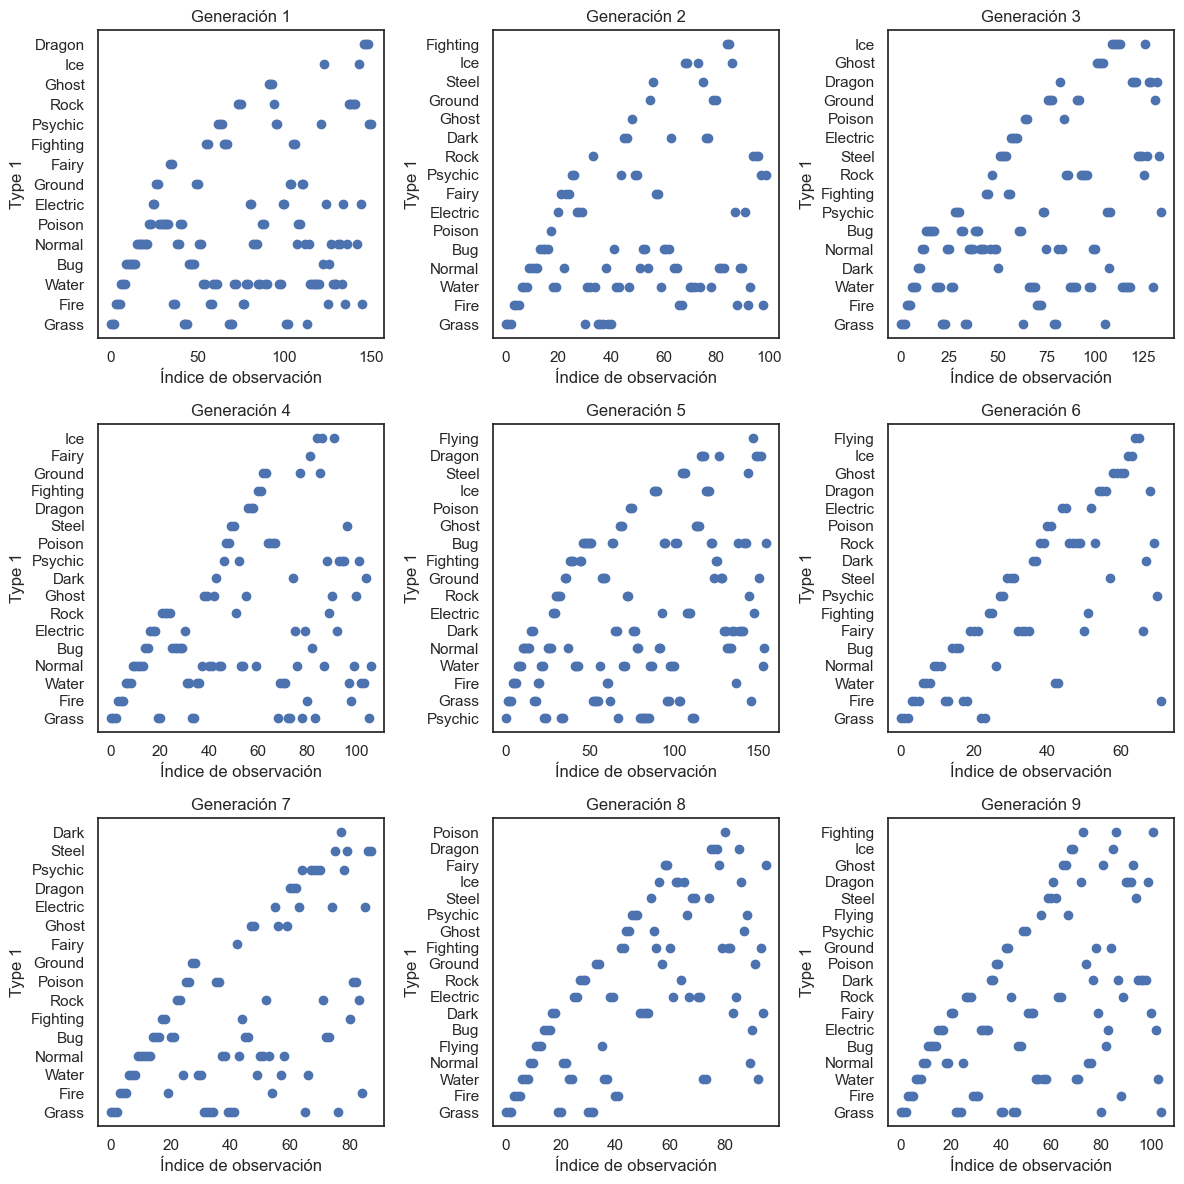

In [113]:
# Creamos un gráfico de dispersión para verificar la independencia de las muestras:
# Extraemos los datos de type1 de cada generación:
gen1_type1 = pokenova[pokenova["generation"] == 1]["type1"]
gen2_type1 = pokenova[pokenova["generation"] == 2]["type1"]
gen3_type1 = pokenova[pokenova["generation"] == 3]["type1"]
gen4_type1 = pokenova[pokenova["generation"] == 4]["type1"]
gen5_type1 = pokenova[pokenova["generation"] == 5]["type1"]
gen6_type1 = pokenova[pokenova["generation"] == 6]["type1"]
gen7_type1 = pokenova[pokenova["generation"] == 7]["type1"]
gen8_type1 = pokenova[pokenova["generation"] == 8]["type1"]
gen9_type1 = pokenova[pokenova["generation"] == 9]["type1"]

fig, axs = plt.subplots(3, 3, figsize=(12, 12))
axs = axs.ravel()
for i, gen_type1 in enumerate([gen1_type1, gen2_type1, gen3_type1, gen4_type1, gen5_type1,
                     gen6_type1, gen7_type1, gen8_type1, gen9_type1]):
    axs[i].scatter(range(len(gen_type1)), gen_type1)
    axs[i].set_title(f"Generación {i+1}")
    axs[i].set_xlabel("Índice de observación")
    axs[i].set_ylabel("Type 1")
fig.tight_layout()
plt.show()

# Se observan patrones, pero vamos a hacer un test chi cuadrado para refrendar lo visual numéricamente.

In [114]:
# Generamos una tabla de contingencia
cont_table = pd.crosstab(pokenova['generation'], pokenova['type1'])

# Realizamos el test de independencia de muestras
stat, p, dof, expected = chi2_contingency(cont_table)
alpha = 0.05

print(f"Estadístico de test: {stat:.4f}")
print(f"p-valor: {p:.4f}")
print(f"Grados de libertad: {dof}")
print("\n")

if p < alpha:
    print("Rechazamos la hipótesis nula, no podemos decir que las muestras son independientes")
else:
    print("No rechazamos la hipótesis nula, asumimos que las muestras son independientes.")

Estadístico de test: 213.4277
p-valor: 0.0000
Grados de libertad: 136


Rechazamos la hipótesis nula, no podemos decir que las muestras son independientes


In [115]:
# Haremos Kruskal-Wallis en lugar de ANOVA

gen1_type1 = pokenova[pokenova["generation"] == 1]["type1"]
gen2_type1 = pokenova[pokenova["generation"] == 2]["type1"]
gen3_type1 = pokenova[pokenova["generation"] == 3]["type1"]
gen4_type1 = pokenova[pokenova["generation"] == 4]["type1"]
gen5_type1 = pokenova[pokenova["generation"] == 5]["type1"]
gen6_type1 = pokenova[pokenova["generation"] == 6]["type1"]
gen7_type1 = pokenova[pokenova["generation"] == 7]["type1"]
gen8_type1 = pokenova[pokenova["generation"] == 8]["type1"]
gen9_type1 = pokenova[pokenova["generation"] == 9]["type1"]

# Realizamos la prueba de Kruskal-Wallis:
h_value, p_value = kruskal(gen1_type1, gen2_type1, gen3_type1, gen4_type1, gen5_type1,
                     gen6_type1, gen7_type1, gen8_type1, gen9_type1)

# Imprimimos el resultado
if p_value < 0.05:
    print("Hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional")
else:
    print("No hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional")

Hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional


In [99]:
# Transformamos la variable categórica convirtiéndola a un factor numérico:
pokenova["type1_cat"] = pd.Categorical(pokenova["type1"])

# Realizamos ANOVA de una vía:
fvalue, pvalue = stats.f_oneway(*[pokenova[pokenova["generation"]==i]["type1_cat"].cat.codes 
                                   for i in range(1,10)])

# Nivel de significancia:
alpha = 0.05

# Imprimimos resultados
if pvalue < alpha:
    print("Se rechaza la hipótesis nula. Existen diferencias significativas entre al menos dos de las medias.")
else:
    print("No se puede rechazar la hipótesis nula. No hay diferencias significativas entre las medias.")

print("F-value:", fvalue)
print("p-value:", pvalue)

Se rechaza la hipótesis nula. Existen diferencias significativas entre al menos dos de las medias.
F-value: 2.8652674031136574
p-value: 0.0037268154678492733


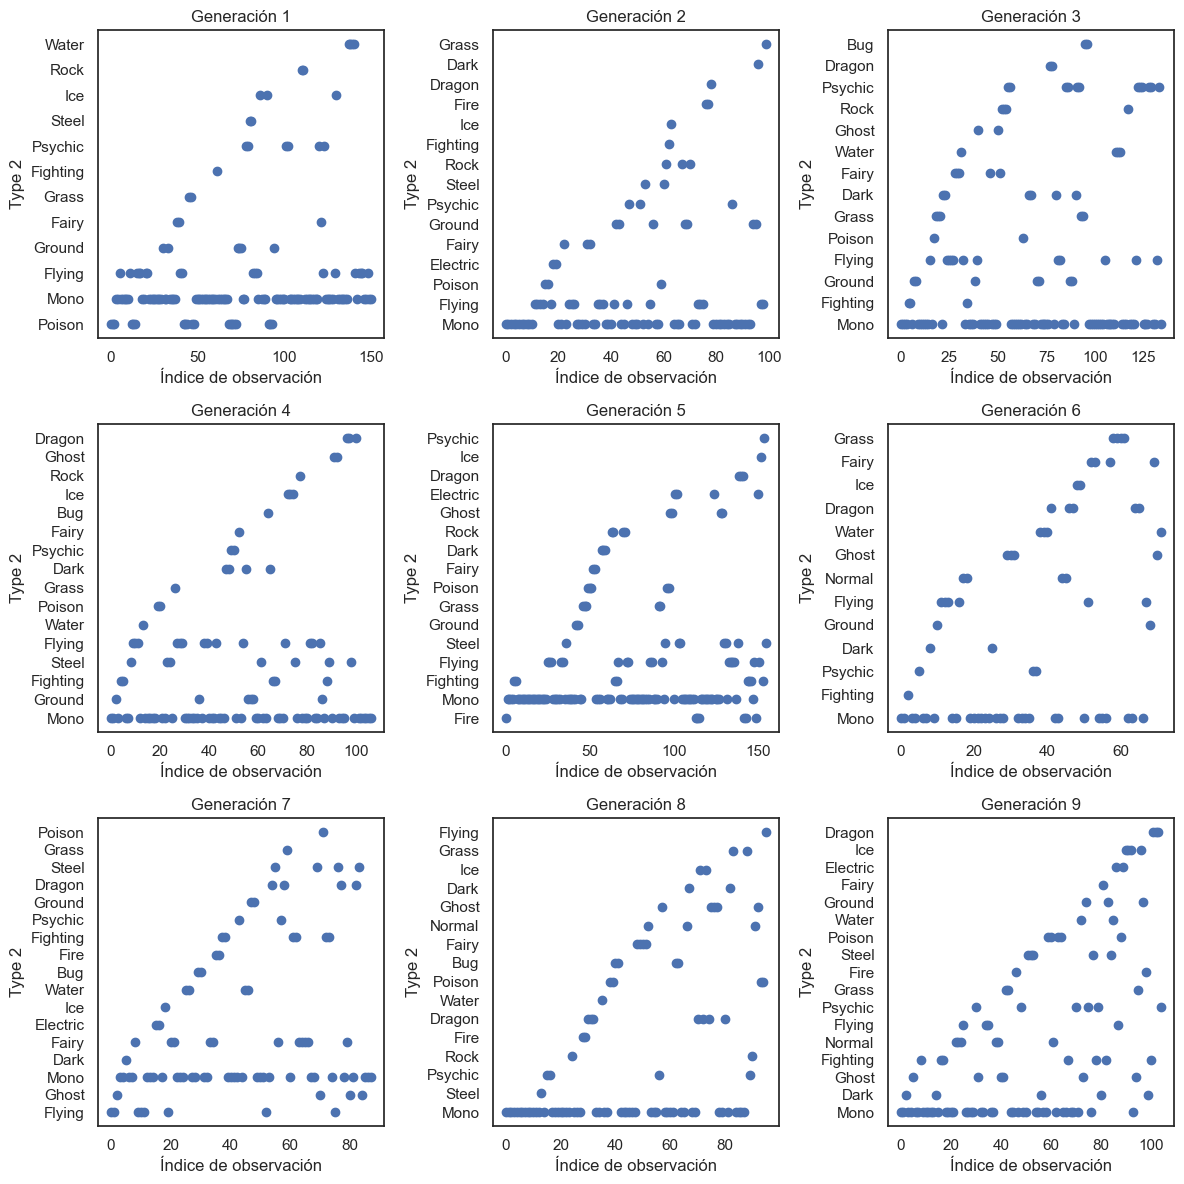

In [117]:
# Creamos un gráfico de dispersión para verificar la independencia de las muestras:
# Extraemos los datos de type1 de cada generación:
gen1_type2 = pokenova[pokenova["generation"] == 1]["type2"]
gen2_type2 = pokenova[pokenova["generation"] == 2]["type2"]
gen3_type2 = pokenova[pokenova["generation"] == 3]["type2"]
gen4_type2 = pokenova[pokenova["generation"] == 4]["type2"]
gen5_type2 = pokenova[pokenova["generation"] == 5]["type2"]
gen6_type2 = pokenova[pokenova["generation"] == 6]["type2"]
gen7_type2 = pokenova[pokenova["generation"] == 7]["type2"]
gen8_type2 = pokenova[pokenova["generation"] == 8]["type2"]
gen9_type2 = pokenova[pokenova["generation"] == 9]["type2"]

fig, axs = plt.subplots(3, 3, figsize=(12, 12))
axs = axs.ravel()
for i, gen_type2 in enumerate([gen1_type2, gen2_type2, gen3_type2, gen4_type2, gen5_type2,
                     gen6_type2, gen7_type2, gen8_type2, gen9_type2]):
    axs[i].scatter(range(len(gen_type2)), gen_type2)
    axs[i].set_title(f"Generación {i+1}")
    axs[i].set_xlabel("Índice de observación")
    axs[i].set_ylabel("Type 2")
fig.tight_layout()
plt.show()

# Se observan patrones, pero vamos a hacer un test chi cuadrado para refrendar lo visual numéricamente.

In [118]:
# Generamos una tabla de contingencia
cont_table = pd.crosstab(pokenova['generation'], pokenova['type2'])

# Realizamos el test de independencia de muestras
stat, p, dof, expected = chi2_contingency(cont_table)
alpha = 0.05

print(f"Estadístico de test: {stat:.4f}")
print(f"p-valor: {p:.4f}")
print(f"Grados de libertad: {dof}")
print("\n")

if p < alpha:
    print("Rechazamos la hipótesis nula, no podemos decir que las muestras son independientes")
else:
    print("No rechazamos la hipótesis nula, asumimos que las muestras son independientes.")

Estadístico de test: 334.9937
p-valor: 0.0000
Grados de libertad: 144


Rechazamos la hipótesis nula, no podemos decir que las muestras son independientes


In [119]:
# Haremos Kruskal-Wallis en lugar de ANOVA

gen1_type2 = pokenova[pokenova["generation"] == 1]["type2"]
gen2_type2 = pokenova[pokenova["generation"] == 2]["type2"]
gen3_type2 = pokenova[pokenova["generation"] == 3]["type2"]
gen4_type2 = pokenova[pokenova["generation"] == 4]["type2"]
gen5_type2 = pokenova[pokenova["generation"] == 5]["type2"]
gen6_type2 = pokenova[pokenova["generation"] == 6]["type2"]
gen7_type2 = pokenova[pokenova["generation"] == 7]["type2"]
gen8_type2 = pokenova[pokenova["generation"] == 8]["type2"]
gen9_type2 = pokenova[pokenova["generation"] == 9]["type2"]

# Realizamos la prueba de Kruskal-Wallis:
h_value, p_value = kruskal(gen1_type2, gen2_type2, gen3_type2, gen4_type2, gen5_type2,
                     gen6_type2, gen7_type2, gen8_type2, gen9_type2)

# Imprimimos el resultado
if p_value < 0.05:
    print("Hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional")
else:
    print("No hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional")

Hay evidencia significativa para rechazar la hipótesis nula de que las muestras tienen la misma media poblacional


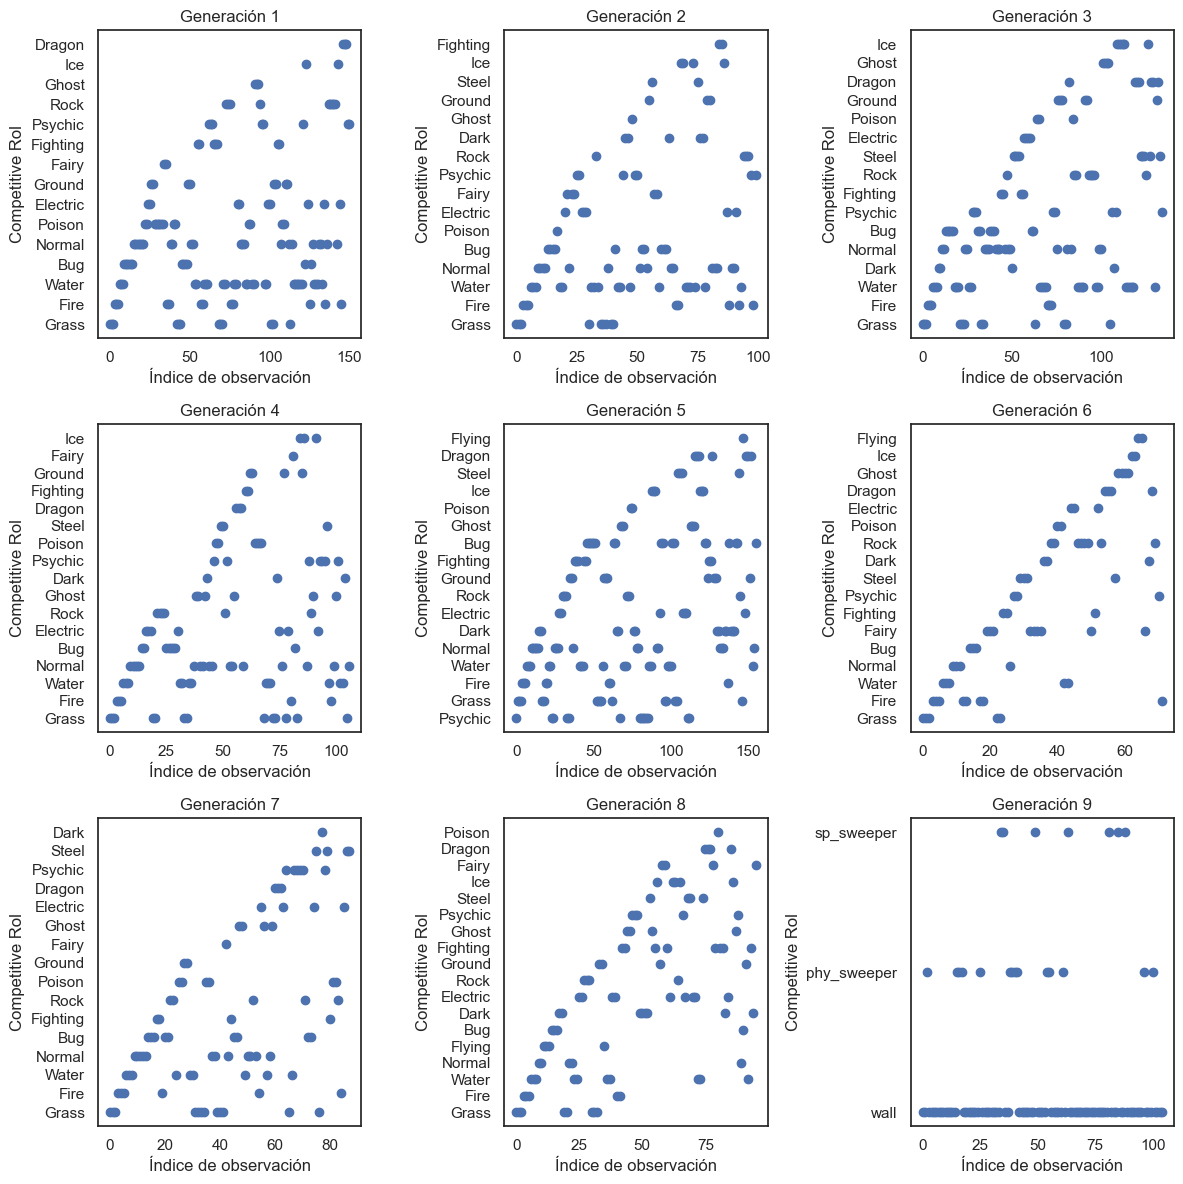

In [121]:
# Creamos un gráfico de dispersión para verificar la independencia de las muestras:
# Extraemos los datos de compet_rol de cada generación:
gen1_compet_rol = pokenova[pokenova["generation"] == 1]["compet_rol"]
gen2_compet_rol = pokenova[pokenova["generation"] == 2]["compet_rol"]
gen3_compet_rol = pokenova[pokenova["generation"] == 3]["compet_rol"]
gen4_compet_rol = pokenova[pokenova["generation"] == 4]["compet_rol"]
gen5_compet_rol = pokenova[pokenova["generation"] == 5]["compet_rol"]
gen6_compet_rol = pokenova[pokenova["generation"] == 6]["compet_rol"]
gen7_compet_rol = pokenova[pokenova["generation"] == 7]["compet_rol"]
gen8_t = pokenova[pokenova["generation"] == 8]["compet_rol"]
gen9_type1 = pokenova[pokenova["generation"] == 9]["compet_rol"]

fig, axs = plt.subplots(3, 3, figsize=(12, 12))
axs = axs.ravel()
for i, gen_compet_rol in enumerate([gen1_type1, gen2_type1, gen3_type1, gen4_type1, gen5_type1,
                     gen6_type1, gen7_type1, gen8_type1, gen9_type1]):
    axs[i].scatter(range(len(gen_compet_rol)), gen_compet_rol)
    axs[i].set_title(f"Generación {i+1}")
    axs[i].set_xlabel("Índice de observación")
    axs[i].set_ylabel("Competitive Rol")
fig.tight_layout()
plt.show()

# Se observan patrones, pero vamos a hacer un test chi cuadrado para refrendar lo visual numéricamente.

In [ ]:
# Generamos una tabla de contingencia
cont_table = pd.crosstab(pokenova['generation'], pokenova['type2'])

# Realizamos el test de independencia de muestras
stat, p, dof, expected = chi2_contingency(cont_table)
alpha = 0.05

print(f"Estadístico de test: {stat:.4f}")
print(f"p-valor: {p:.4f}")
print(f"Grados de libertad: {dof}")
print("\n")

if p < alpha:
    print("Rechazamos la hipótesis nula, no podemos decir que las muestras son independientes")
else:
    print("No rechazamos la hipótesis nula, asumimos que las muestras son independientes.")